In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)
gpu_id = '1'

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.6))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims, gpu_id)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=100
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16947897048158927953
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9232728064
locality {
  bus_id: 1
}
incarnation: 2225038579997624436
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 17.618351 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.3343308 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.0192078 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.6197659 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.69906616 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.6127373 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.6565039 val_loss= 0.22788306 , acc = 0.92 val acc = 0.9442 
Epoch 1 finished, loss= 1.3731823 val loss= 0.22788306 ,  acc = 0.89741814 val acc = 0.9442
val_acc improved. 
Epoch 2 , step 50 , loss= 0.5193057 , acc = 0.96 
Epoch 2 , step 150 , loss= 0.5700667 , acc = 0.95 
Epoch 2 , step 250 , loss= 0.332727 , acc

Epoch 17 , step 400 , loss= 0.25065038 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.18048047 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.22844742 val_loss= 0.06492446 , acc = 0.97 val acc = 0.9816 
Epoch 17 finished, loss= 0.14642905 val loss= 0.06492446 ,  acc = 0.9873454 val acc = 0.9816
val_acc improved. 
Epoch 18 , step 50 , loss= 0.29302457 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.08837792 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.253101 , acc = 0.96 
Epoch 18 , step 350 , loss= 0.08419705 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.12661451 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.081102885 val_loss= 0.06851361 , acc = 1.0 val acc = 0.98 
Epoch 18 finished, loss= 0.1463239 val loss= 0.06851361 ,  acc = 0.9888727 val acc = 0.98

Epoch 19 , step 0 , loss= 0.16414613 , acc = 0.97 
Epoch 19 , step 100 , loss= 0.052594118 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.13101667 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.22821285 , acc = 0.99 
Epoch 19 , step 400 , loss= 0.080723494 

Epoch 34 , step 549 , loss= 0.14982867 val_loss= 0.05459673 , acc = 0.99 val acc = 0.9838 
Epoch 34 finished, loss= 0.10958519 val loss= 0.05459673 ,  acc = 0.99363637 val acc = 0.9838

Epoch 35 , step 0 , loss= 0.0855904 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.15997559 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.33843085 , acc = 0.96 
Epoch 35 , step 300 , loss= 0.035226054 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.20953411 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.076349825 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.12089897 val_loss= 0.055753425 , acc = 0.98 val acc = 0.9826 
Epoch 35 finished, loss= 0.11182581 val loss= 0.055753425 ,  acc = 0.99398184 val acc = 0.9826

Epoch 36 , step 50 , loss= 0.052834176 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.2268541 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.11135303 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.10292058 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.10947065 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.1015589 val_loss= 0.

Plotting loss...


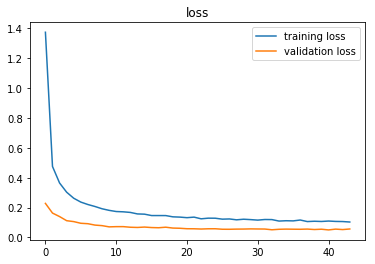

Plotting metrics...


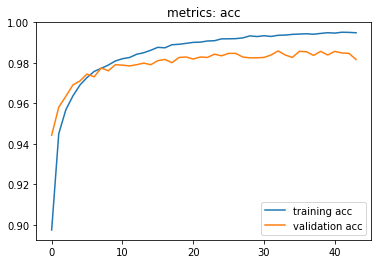

train {'acc': 0.9952}
test {'acc': 0.985}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

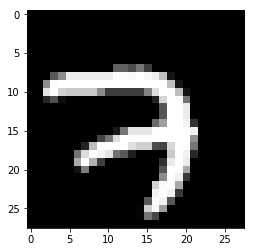

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[9.7266780e-13 5.2051786e-07 5.2434835e-04 1.1704235e-03 1.0758041e-05
 7.9085174e-09 2.7010856e-15 9.9826717e-01 1.4637256e-07 2.6635222e-05]


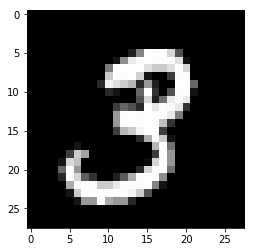

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[7.2981489e-11 3.0645719e-09 4.7663995e-08 9.9937397e-01 4.6727067e-10
 2.4974268e-05 8.8854635e-16 2.2945034e-07 2.5371052e-04 3.4714068e-04]


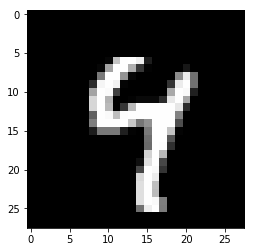

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.7938897e-09 2.2619807e-07 1.9227686e-09 3.6630283e-08 9.9267250e-01
 3.9793909e-07 5.2188398e-08 1.5344560e-06 3.3728575e-06 7.3219547e-03]


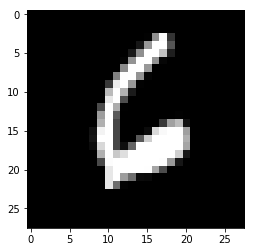

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.39792020e-10 3.73446608e-13 2.98551080e-11 1.26905311e-12
 1.49341261e-07 1.11292614e-07 9.99999762e-01 3.02923783e-14
 7.13654968e-10 4.99655095e-10]


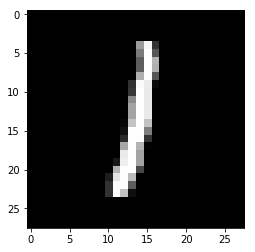

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.1221607e-25 1.0000000e+00 5.1189275e-17 6.7629992e-19 5.6813009e-12
 8.2833511e-20 9.9318351e-16 3.3320352e-14 2.4686640e-11 1.0124430e-17]


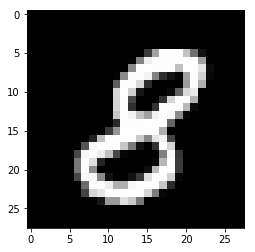

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.7822837e-06 1.0125411e-06 5.4484758e-06 2.5355039e-05 1.6116125e-08
 1.5657758e-07 4.9763906e-07 1.5898161e-07 9.9996352e-01 1.0927525e-06]


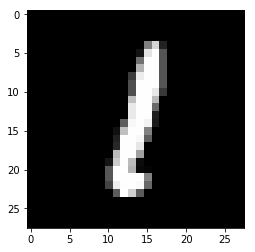

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0847998e-20 1.0000000e+00 7.8791190e-16 1.8114344e-17 3.3782543e-12
 4.4864374e-18 1.1974816e-13 8.5818959e-14 2.2375359e-09 1.6097293e-16]


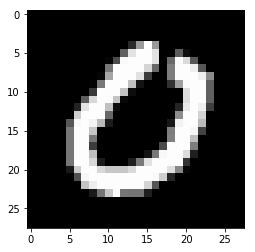

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 2.2405907e-23 1.9262680e-11 3.8352513e-14 3.0342515e-18
 6.7420001e-13 4.0209516e-13 2.4220573e-14 6.2461272e-13 9.4179713e-09]


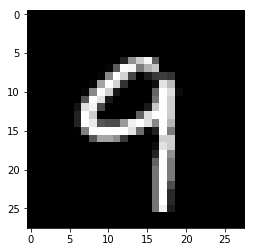

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.11991590e-10 2.35489064e-13 1.15236585e-08 7.09811638e-06
 1.61934549e-05 5.71909595e-08 4.30803313e-16 4.06072922e-06
 8.47523279e-06 9.99964118e-01]


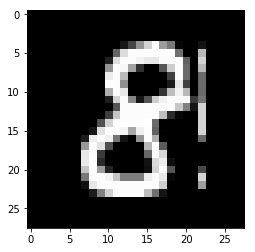

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[5.2986712e-07 1.5627270e-07 3.3017437e-07 1.0406037e-05 6.3693593e-09
 3.2031338e-07 1.5175223e-06 1.1595439e-09 9.9998677e-01 2.4711978e-08]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Small Model and Student Model

In [9]:

def build_small_model(input_dims, output_dims, is_student, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=32,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=32,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

### Training Small Model without Teacher

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False, gpu_id=gpu_id)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 954835647922069596
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8517494375
locality {
  bus_id: 1
}
incarnation: 10879113070978552618
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3053489 , acc = 0.19 
Epoch 1 , step 100 , loss= 0.54645216 , acc = 0.86 
Epoch 1 , step 200 , loss= 0.35129625 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.30020812 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.3690547 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.29463527 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.40895653 val_loss= 0.2677435 , acc = 0.86 val acc = 0.928 
Epoch 1 finished, loss= 0.5599048 val loss= 0.2677435 ,  acc = 0.84974545 val acc = 0.928
val_acc improved. 
Epoch 2 , step 50 , loss= 0.2719883 , acc = 0.91 
Epoch 2 , step 150 , loss= 0.22710246 , acc = 0.94 
Epoch 2 , step 250 , loss= 0.18687014 , acc

Epoch 17 , step 300 , loss= 0.049149938 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.03790991 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.018851442 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.009678741 val_loss= 0.10972527 , acc = 1.0 val acc = 0.9694 
Epoch 17 finished, loss= 0.057324987 val loss= 0.10972527 ,  acc = 0.98463637 val acc = 0.9694

Epoch 18 , step 50 , loss= 0.026032344 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.025745995 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.04590908 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.117742434 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.028896354 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.16364655 val_loss= 0.10382803 , acc = 0.96 val acc = 0.97 
Epoch 18 finished, loss= 0.054583672 val loss= 0.10382803 ,  acc = 0.9852 val acc = 0.97

Epoch 19 , step 0 , loss= 0.0357917 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.04057206 , acc = 0.98 
Epoch 19 , step 200 , loss= 0.02845377 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.041652914 , acc = 0.98

Small model
Plotting loss...


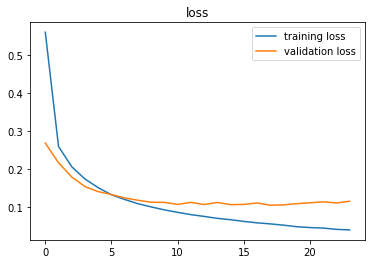

Plotting metrics...


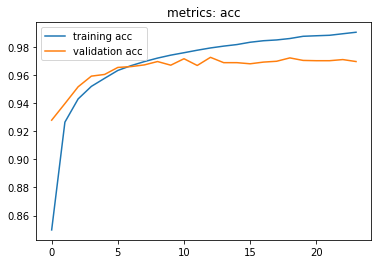

train {'acc': 0.99169093}
test {'acc': 0.9671}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

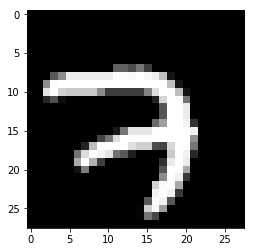

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[5.2150190e-10 3.9269917e-11 3.0474359e-05 2.9362282e-02 2.6954063e-13
 2.0789566e-15 1.3050346e-14 9.7060722e-01 3.6900987e-09 1.8808960e-10]


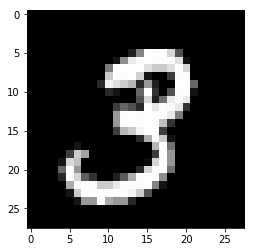

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.7914431e-11 3.3271430e-09 2.5400822e-11 9.9934858e-01 7.3051380e-18
 2.4827812e-06 1.3421561e-16 1.8091839e-10 4.9457280e-04 1.5428370e-04]


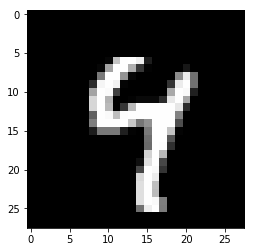

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.2570226e-06 1.0102445e-10 1.1886284e-09 1.8632475e-04 3.8342941e-01
 2.6855835e-07 1.8074915e-09 3.8808586e-05 2.9762159e-05 6.1631417e-01]


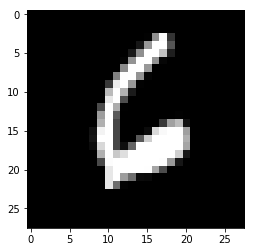

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.4333478e-05 7.6986889e-10 1.3462674e-06 6.9187744e-10 1.1760171e-06
 6.4645310e-06 9.9997663e-01 4.5231202e-12 7.1608458e-10 1.9233898e-10]


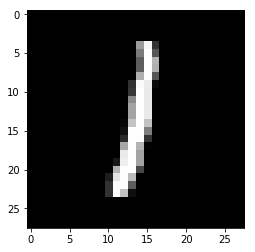

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.9377742e-07 9.9992633e-01 8.6925724e-07 2.1639887e-06 6.3010113e-08
 1.6531997e-08 8.8927436e-06 2.4029534e-05 3.7371319e-05 2.2447885e-08]


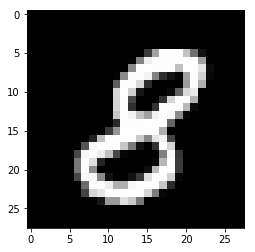

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.2570999e-11 2.4506144e-12 1.7527922e-08 1.7920303e-07 5.6065779e-17
 6.2204233e-09 1.9594131e-12 1.4293415e-11 9.9999976e-01 5.7140109e-12]


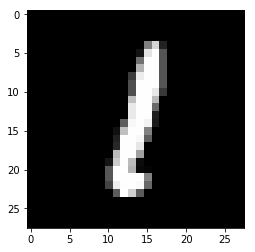

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.7008762e-06 9.9451941e-01 7.9688689e-06 4.8552756e-06 2.5909066e-09
 1.7862291e-10 2.0493474e-07 2.3225062e-04 5.2325088e-03 4.1267057e-08]


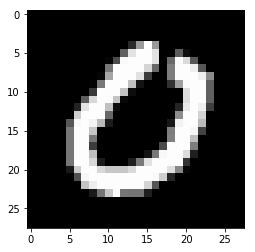

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9999499e-01 1.0205325e-09 5.9700483e-08 3.4378785e-11 1.1180620e-13
 7.0615666e-11 1.0727881e-09 6.9834381e-11 2.2717052e-11 4.9269138e-06]


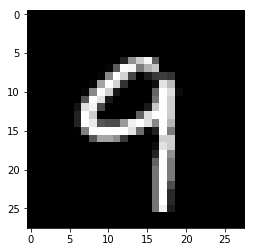

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.0312092e-07 1.1147093e-09 3.7426378e-09 3.6079596e-06 4.0324718e-05
 1.4584134e-08 3.8788638e-12 1.1599393e-05 2.0309137e-08 9.9994421e-01]


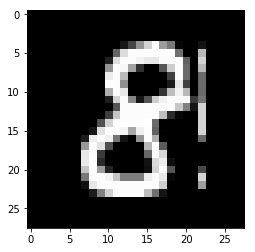

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.2455621e-08 1.5692381e-11 5.6915519e-06 1.7212307e-05 1.2121350e-14
 2.1056983e-09 1.4607726e-11 1.1101256e-11 9.9997711e-01 1.5336436e-08]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Experiments on Students

In [13]:
temperatures = [2,4,6,8,10]#[5,10,15,20,25,30]
coef_soft_losses = [0.0, 0.25, 0.5, 0.75, 1.0]#[1.0, 0.75, 0.5, 0.25, 0.0]

### Experiments on Students without Effect of $T^2$

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4755195161418783969
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3027927192429185792
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3294907 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.6101433 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.39998257 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.32960737 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.2720201 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.290719 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.28022796 val_loss= 0.25579122 , acc = 0.9 val acc = 0.9266 
Epoch 1 finished, loss= 0.57426083 val loss= 0.25579122 ,  acc = 0.8435455 val acc = 0.9266
val_acc improved. 
Epoch 2 , step 50 , loss= 0.2561624 , acc 

Epoch 17 , step 100 , loss= 0.057107806 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.08679604 , acc = 0.98 
Epoch 17 , step 300 , loss= 0.049877334 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.052300498 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.12491697 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.16910334 val_loss= 0.111496374 , acc = 0.97 val acc = 0.9696 
Epoch 17 finished, loss= 0.051969267 val loss= 0.111496374 ,  acc = 0.9859819 val acc = 0.9696

Epoch 18 , step 50 , loss= 0.06937662 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.019811034 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.054072317 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.06765969 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.037576355 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.01999197 val_loss= 0.106062196 , acc = 0.99 val acc = 0.97 
Epoch 18 finished, loss= 0.050339278 val loss= 0.106062196 ,  acc = 0.9867272 val acc = 0.97

Epoch 19 , step 0 , loss= 0.0832407 , acc = 0.97 
Epoch 19 , step 100 , loss= 0.09321905 , acc

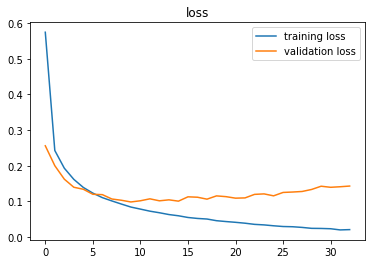

Plotting metrics...


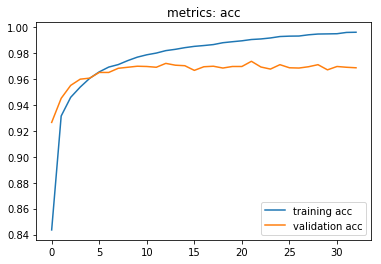

train {'acc': 0.9945091}
test {'acc': 0.9692}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16756023032565840341
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15552585571473294188
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300018 , acc = 0.16 
Epoch 1 , step 100 , loss= 0.60048974 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.45447582 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.48795378 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.20807433 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.26627225 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.38545805 val_loss= 0.3396588 , acc = 0.88 val acc = 0.9158 
Epoch 1 finished, loss= 0.6230076 val loss= 0.3396588 ,  acc = 0.84889096 val acc = 0.9158
val_acc i

Epoch 17 , step 100 , loss= 0.17199998 , acc = 0.97 
Epoch 17 , step 200 , loss= 0.12536392 , acc = 0.97 
Epoch 17 , step 300 , loss= 0.09573566 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.06748732 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.077228904 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.10181622 val_loss= 0.14418721 , acc = 0.99 val acc = 0.9686 
Epoch 17 finished, loss= 0.10682533 val loss= 0.14418721 ,  acc = 0.9818364 val acc = 0.9686

Epoch 18 , step 50 , loss= 0.08515504 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.07661233 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.09105754 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.12215077 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.08688099 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.09454794 val_loss= 0.14895806 , acc = 0.98 val acc = 0.9658 
Epoch 18 finished, loss= 0.10433215 val loss= 0.14895806 ,  acc = 0.98280007 val acc = 0.9658

Epoch 19 , step 0 , loss= 0.09217548 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.073656395 , acc = 0.99

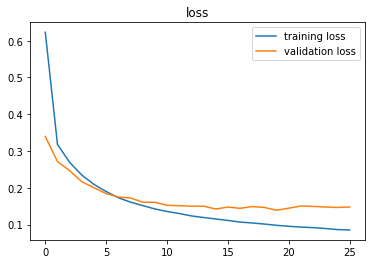

Plotting metrics...


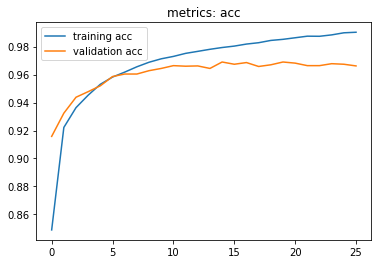

train {'acc': 0.99036366}
test {'acc': 0.9674}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1267872091904497273
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 958438233123669745
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3114681 , acc = 0.1 
Epoch 1 , step 100 , loss= 0.88556695 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.43935016 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.372118 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.3707945 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.31283188 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.3894947 val_loss= 0.35996288 , acc = 0.91 val acc = 0.9148 
Epoch 1 finished, loss= 0.68843776 val loss= 0.35996288 ,  acc = 0.8312727 val acc = 0.9148
val_acc improve

Epoch 17 , step 100 , loss= 0.12709716 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.18395182 , acc = 0.97 
Epoch 17 , step 300 , loss= 0.15588643 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.17153275 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.11528427 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.12083384 val_loss= 0.17027265 , acc = 0.99 val acc = 0.9696 
Epoch 17 finished, loss= 0.1429026 val loss= 0.17027265 ,  acc = 0.98205453 val acc = 0.9696

Epoch 18 , step 50 , loss= 0.0969039 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.18064922 , acc = 0.97 
Epoch 18 , step 250 , loss= 0.14217171 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.11479926 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.15167466 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.13781615 val_loss= 0.16931623 , acc = 0.99 val acc = 0.9694 
Epoch 18 finished, loss= 0.14024101 val loss= 0.16931623 ,  acc = 0.98359996 val acc = 0.9694

Epoch 19 , step 0 , loss= 0.1462081 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.18907543 , acc = 0.97 

Epoch 34 , step 350 , loss= 0.113583885 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.093900554 , acc = 0.99 
Epoch 34 , step 549 , loss= 0.08751758 val_loss= 0.1656475 , acc = 1.0 val acc = 0.969 
Epoch 34 finished, loss= 0.11615689 val loss= 0.1656475 ,  acc = 0.9928183 val acc = 0.969

Epoch 35 , step 0 , loss= 0.122468375 , acc = 0.99 
Epoch 35 , step 100 , loss= 0.14299506 , acc = 0.97 
Epoch 35 , step 200 , loss= 0.11713642 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.0891107 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.094529875 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.10260812 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.15002859 val_loss= 0.16679257 , acc = 0.96 val acc = 0.9708 
Epoch 35 finished, loss= 0.114689 val loss= 0.16679257 ,  acc = 0.9933272 val acc = 0.9708

Epoch 36 , step 50 , loss= 0.13981113 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.09116857 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.100843444 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.082748696 , acc = 1.0 
Epoch 3

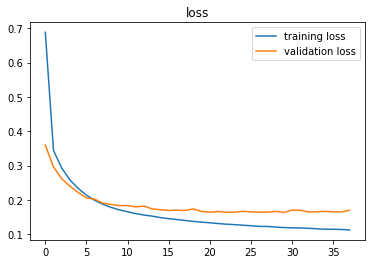

Plotting metrics...


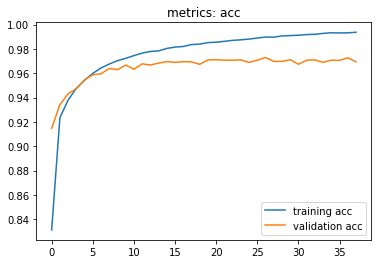

train {'acc': 0.9932182}
test {'acc': 0.9694}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13796948743432308567
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5721317605665110785
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2933235 , acc = 0.18 
Epoch 1 , step 100 , loss= 0.9109282 , acc = 0.75 
Epoch 1 , step 200 , loss= 0.41203064 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.6133618 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.3869167 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.4178939 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.50916755 val_loss= 0.3784906 , acc = 0.88 val acc = 0.915 
Epoch 1 finished, loss= 0.71105254 val loss= 0.3784906 ,  acc = 0.8334546 val acc = 0.915
val_acc improve

Epoch 17 , step 100 , loss= 0.28142095 , acc = 0.96 
Epoch 17 , step 200 , loss= 0.18257564 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.15342113 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.153585 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.110080265 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.24779503 val_loss= 0.20471917 , acc = 0.96 val acc = 0.9644 
Epoch 17 finished, loss= 0.17919174 val loss= 0.20471917 ,  acc = 0.97980005 val acc = 0.9644

Epoch 18 , step 50 , loss= 0.15081143 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.20889406 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.19451764 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.20776808 , acc = 0.95 
Epoch 18 , step 450 , loss= 0.15155649 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.20950659 val_loss= 0.19848756 , acc = 0.97 val acc = 0.968 
Epoch 18 finished, loss= 0.17687106 val loss= 0.19848756 ,  acc = 0.98143643 val acc = 0.968
val_acc improved. 
Epoch 19 , step 0 , loss= 0.17044301 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.18943396 ,

Epoch 34 , step 350 , loss= 0.19903046 , acc = 0.99 
Epoch 34 , step 450 , loss= 0.14642207 , acc = 0.99 
Epoch 34 , step 549 , loss= 0.18455704 val_loss= 0.1956887 , acc = 1.0 val acc = 0.9684 
Epoch 34 finished, loss= 0.15289007 val loss= 0.1956887 ,  acc = 0.9898727 val acc = 0.9684

Epoch 35 , step 0 , loss= 0.15482202 , acc = 0.99 
Epoch 35 , step 100 , loss= 0.12596796 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.16898519 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.14689003 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.12663178 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.151443 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.094711296 val_loss= 0.1910299 , acc = 1.0 val acc = 0.9676 
Epoch 35 finished, loss= 0.15197998 val loss= 0.1910299 ,  acc = 0.98998183 val acc = 0.9676

Epoch 36 , step 50 , loss= 0.16415289 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.17988393 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.15211505 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.20631088 , acc = 0.97 
Epo

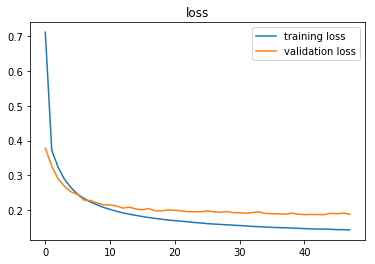

Plotting metrics...


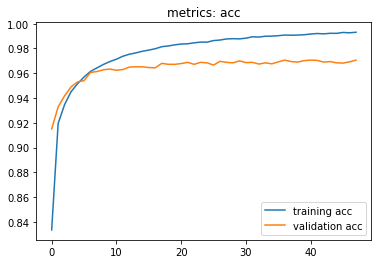

train {'acc': 0.99334544}
test {'acc': 0.9684}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5983586220991810100
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5887623046615666230
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.294945 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.94872504 , acc = 0.76 
Epoch 1 , step 200 , loss= 0.58681864 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.45146203 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.29498824 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.37489963 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.44677296 val_loss= 0.40739876 , acc = 0.87 val acc = 0.9122 
Epoch 1 finished, loss= 0.7295777 val loss= 0.40739876 ,  acc = 0.8170909 val acc = 0.9122
val_acc im

Epoch 17 , step 100 , loss= 0.20380563 , acc = 0.96 
Epoch 17 , step 200 , loss= 0.16996525 , acc = 0.98 
Epoch 17 , step 300 , loss= 0.17735618 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.26334965 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.19944178 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.274069 val_loss= 0.22261465 , acc = 0.96 val acc = 0.9674 
Epoch 17 finished, loss= 0.2121693 val loss= 0.22261465 ,  acc = 0.9753274 val acc = 0.9674

Epoch 18 , step 50 , loss= 0.1931059 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.294723 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.23237161 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.12655024 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.17109047 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.21608004 val_loss= 0.22070569 , acc = 0.98 val acc = 0.9672 
Epoch 18 finished, loss= 0.2095024 val loss= 0.22070569 ,  acc = 0.97647274 val acc = 0.9672

Epoch 19 , step 0 , loss= 0.17369384 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.23094708 , acc = 1.0 
Epoch

Epoch 34 , step 350 , loss= 0.15619156 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.1689631 , acc = 0.99 
Epoch 34 , step 549 , loss= 0.16576745 val_loss= 0.21366572 , acc = 0.98 val acc = 0.9696 
Epoch 34 finished, loss= 0.18752757 val loss= 0.21366572 ,  acc = 0.9839454 val acc = 0.9696

Epoch 35 , step 0 , loss= 0.17489845 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.14334893 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.33950618 , acc = 0.97 
Epoch 35 , step 300 , loss= 0.19913495 , acc = 0.98 
Epoch 35 , step 400 , loss= 0.17133442 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.14903401 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.18535033 val_loss= 0.2146343 , acc = 0.99 val acc = 0.9684 
Epoch 35 finished, loss= 0.18690178 val loss= 0.2146343 ,  acc = 0.9840545 val acc = 0.9684

Epoch 36 , step 50 , loss= 0.14464076 , acc = 0.98 
Epoch 36 , step 150 , loss= 0.16810818 , acc = 0.97 
Epoch 36 , step 250 , loss= 0.1984298 , acc = 0.96 
Epoch 36 , step 350 , loss= 0.17815156 , acc = 1.0 
Epoch 3

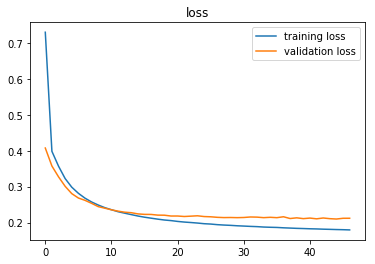

Plotting metrics...


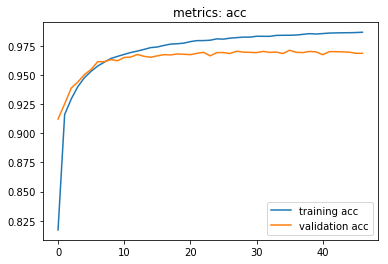

train {'acc': 0.9870727}
test {'acc': 0.9663}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14959500928208799847
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3252470852294127617
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2964122 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.6328684 , acc = 0.82 
Epoch 1 , step 200 , loss= 0.38142627 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.32317486 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.3067408 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.3201182 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.25048554 val_loss= 0.2696521 , acc = 0.91 val acc = 0.9228 
Epoch 1 finished, loss= 0.5860888 val loss= 0.2696521 ,  acc = 0.83550906 val acc = 0.9228
val_acc impro

Epoch 17 , step 100 , loss= 0.07541376 , acc = 0.97 
Epoch 17 , step 200 , loss= 0.059183434 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.062068034 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.031214364 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.11696915 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.19491413 val_loss= 0.102606125 , acc = 0.96 val acc = 0.9698 
Epoch 17 finished, loss= 0.062441114 val loss= 0.102606125 ,  acc = 0.9826001 val acc = 0.9698

Epoch 18 , step 50 , loss= 0.04731124 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.04124202 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.12851927 , acc = 0.95 
Epoch 18 , step 350 , loss= 0.089054115 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.045896526 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.033950303 val_loss= 0.102962635 , acc = 0.99 val acc = 0.968 
Epoch 18 finished, loss= 0.060144175 val loss= 0.102962635 ,  acc = 0.9834 val acc = 0.968

Epoch 19 , step 0 , loss= 0.08506077 , acc = 0.96 
Epoch 19 , step 100 , loss= 0.09713847 , acc

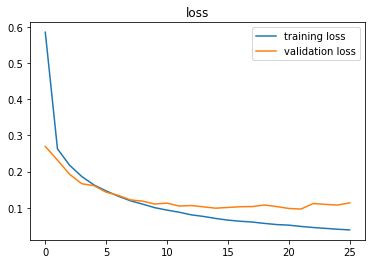

Plotting metrics...


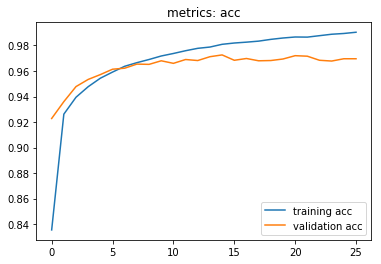

train {'acc': 0.98890907}
test {'acc': 0.9652}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16577180606654006210
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 8147032852506478392
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3094814 , acc = 0.21 
Epoch 1 , step 100 , loss= 0.87436426 , acc = 0.8 
Epoch 1 , step 200 , loss= 0.68275905 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.6451701 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.46815968 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.46928722 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.30897975 val_loss= 0.44888377 , acc = 0.97 val acc = 0.9206 
Epoch 1 finished, loss= 0.7594731 val loss= 0.44888377 ,  acc = 0.8321818 val acc = 0.9206
val_acc 

Epoch 17 , step 100 , loss= 0.3152753 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.31068212 , acc = 0.95 
Epoch 17 , step 300 , loss= 0.16579351 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.22821689 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.21476512 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.26163152 val_loss= 0.2614413 , acc = 0.98 val acc = 0.9624 
Epoch 17 finished, loss= 0.21489477 val loss= 0.2614413 ,  acc = 0.98123646 val acc = 0.9624

Epoch 18 , step 50 , loss= 0.21921635 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.17415723 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.25699872 , acc = 0.96 
Epoch 18 , step 350 , loss= 0.2542215 , acc = 0.96 
Epoch 18 , step 450 , loss= 0.18901944 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.19829142 val_loss= 0.25560755 , acc = 0.97 val acc = 0.963 
Epoch 18 finished, loss= 0.21109025 val loss= 0.25560755 ,  acc = 0.9819456 val acc = 0.963

Epoch 19 , step 0 , loss= 0.19306855 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.17821811 , acc = 0.99 
Epo

Epoch 34 , step 450 , loss= 0.18777986 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.15676318 val_loss= 0.25828364 , acc = 1.0 val acc = 0.9654 
Epoch 34 finished, loss= 0.17992577 val loss= 0.25828364 ,  acc = 0.9934182 val acc = 0.9654

Epoch 35 , step 0 , loss= 0.13835709 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.21576902 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.17408758 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.13494377 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.14434552 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.16521151 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.14446606 val_loss= 0.25869262 , acc = 1.0 val acc = 0.9656 
Epoch 35 finished, loss= 0.17853679 val loss= 0.25869262 ,  acc = 0.9934182 val acc = 0.9656

Epoch 36 , step 50 , loss= 0.21506621 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.14877625 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.18379435 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.17206077 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.17043585 , acc = 1.0 
Epoch 36

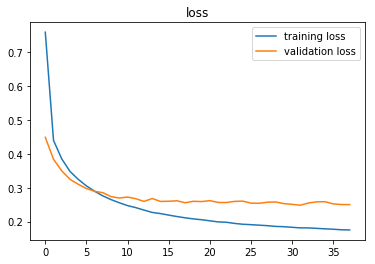

Plotting metrics...


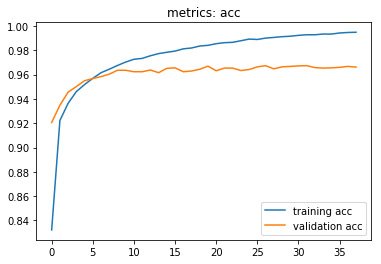

train {'acc': 0.99578184}
test {'acc': 0.9693}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16682357448029073025
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15744175939214398834
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3142693 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.1435689 , acc = 0.86 
Epoch 1 , step 200 , loss= 0.73585665 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.7412193 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.63856477 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.5608914 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.54193 val_loss= 0.5733859 , acc = 0.93 val acc = 0.9164 
Epoch 1 finished, loss= 0.8958772 val loss= 0.5733859 ,  acc = 0.82978183 val acc = 0.9164
val_acc improve

Epoch 17 , step 100 , loss= 0.36204875 , acc = 0.97 
Epoch 17 , step 200 , loss= 0.3134308 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.36690477 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.27988866 , acc = 0.96 
Epoch 17 , step 500 , loss= 0.37441117 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.3491398 val_loss= 0.3677145 , acc = 0.98 val acc = 0.9658 
Epoch 17 finished, loss= 0.34607694 val loss= 0.3677145 ,  acc = 0.9802546 val acc = 0.9658

Epoch 18 , step 50 , loss= 0.38444674 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.39488238 , acc = 0.95 
Epoch 18 , step 250 , loss= 0.36035755 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.32755393 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.29217815 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.27944502 val_loss= 0.36497423 , acc = 1.0 val acc = 0.9682 
Epoch 18 finished, loss= 0.34370995 val loss= 0.36497423 ,  acc = 0.98125464 val acc = 0.9682
val_acc improved. 
Epoch 19 , step 0 , loss= 0.3367363 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.32979155

Epoch 34 , step 350 , loss= 0.32633486 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.3244055 , acc = 0.99 
Epoch 34 , step 549 , loss= 0.36478567 val_loss= 0.35911414 , acc = 0.97 val acc = 0.968 
Epoch 34 finished, loss= 0.31819627 val loss= 0.35911414 ,  acc = 0.9915636 val acc = 0.968

Epoch 35 , step 0 , loss= 0.29134542 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.3377022 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.34969422 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.33438405 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.22589174 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.22356553 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.2591989 val_loss= 0.35821724 , acc = 1.0 val acc = 0.9692 
Epoch 35 finished, loss= 0.317131 val loss= 0.35821724 ,  acc = 0.9918 val acc = 0.9692

Epoch 36 , step 50 , loss= 0.28846198 , acc = 0.98 
Epoch 36 , step 150 , loss= 0.269616 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.2863197 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.32685578 , acc = 0.99 
Epoch 36 , step 

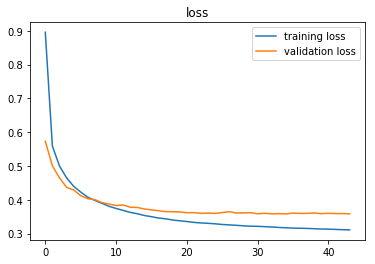

Plotting metrics...


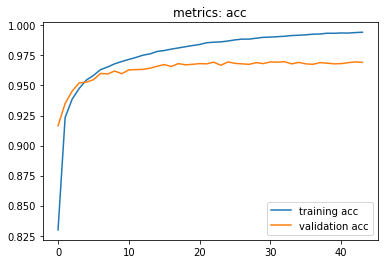

train {'acc': 0.9938909}
test {'acc': 0.9686}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10704232783611219917
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 18301196584139017774
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.311914 , acc = 0.16 
Epoch 1 , step 100 , loss= 1.1331811 , acc = 0.78 
Epoch 1 , step 200 , loss= 0.7697799 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.8687707 , acc = 0.82 
Epoch 1 , step 400 , loss= 0.84005743 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.66504323 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.701912 val_loss= 0.67600083 , acc = 0.92 val acc = 0.9144 
Epoch 1 finished, loss= 0.98710716 val loss= 0.67600083 ,  acc = 0.82872725 val acc = 0.9144
val_acc im

Epoch 17 , step 100 , loss= 0.40872324 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.5181686 , acc = 0.96 
Epoch 17 , step 300 , loss= 0.40579396 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.48888317 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.41152692 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.39763352 val_loss= 0.47022653 , acc = 0.98 val acc = 0.966 
Epoch 17 finished, loss= 0.4712008 val loss= 0.47022653 ,  acc = 0.9782 val acc = 0.966
val_acc improved. 
Epoch 18 , step 50 , loss= 0.5167316 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.37303203 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.57860225 , acc = 0.95 
Epoch 18 , step 350 , loss= 0.5910722 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.49258542 , acc = 0.96 
Epoch 18 , step 549 , loss= 0.41985247 val_loss= 0.46790466 , acc = 0.98 val acc = 0.9664 
Epoch 18 finished, loss= 0.4682655 val loss= 0.46790466 ,  acc = 0.97889096 val acc = 0.9664
val_acc improved. 
Epoch 19 , step 0 , loss= 0.45428422 , acc = 0.97 
Epoch 19 , step 100 , l

Epoch 34 , step 250 , loss= 0.4812338 , acc = 0.99 
Epoch 34 , step 350 , loss= 0.37597993 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.5202087 , acc = 0.98 
Epoch 34 , step 549 , loss= 0.4191876 val_loss= 0.45957133 , acc = 1.0 val acc = 0.972 
Epoch 34 finished, loss= 0.44673344 val loss= 0.45957133 ,  acc = 0.98789084 val acc = 0.972
val_acc improved. 
Epoch 35 , step 0 , loss= 0.47313142 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.40593106 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.38918388 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.40960297 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.43029952 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.38458502 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.4406164 val_loss= 0.45730114 , acc = 1.0 val acc = 0.971 
Epoch 35 finished, loss= 0.4454934 val loss= 0.45730114 ,  acc = 0.98865455 val acc = 0.971

Epoch 36 , step 50 , loss= 0.44642493 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.43477985 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.39493337 , acc = 

Epoch 51 , step 549 , loss= 0.4787233 val_loss= 0.4568277 , acc = 0.99 val acc = 0.9714 
Epoch 51 finished, loss= 0.43756205 val loss= 0.4568277 ,  acc = 0.99227273 val acc = 0.9714

Epoch 52 , step 50 , loss= 0.41525218 , acc = 1.0 
Epoch 52 , step 150 , loss= 0.44685078 , acc = 0.98 
Epoch 52 , step 250 , loss= 0.4183263 , acc = 1.0 
Epoch 52 , step 350 , loss= 0.41090274 , acc = 1.0 
Epoch 52 , step 450 , loss= 0.45155343 , acc = 1.0 
Epoch 52 , step 549 , loss= 0.5076859 val_loss= 0.45865402 , acc = 0.99 val acc = 0.9694 
Epoch 52 finished, loss= 0.43714425 val loss= 0.45865402 ,  acc = 0.9925091 val acc = 0.9694

Epoch 53 , step 0 , loss= 0.45404908 , acc = 0.99 
Epoch 53 , step 100 , loss= 0.4172942 , acc = 1.0 
Epoch 53 , step 200 , loss= 0.43284804 , acc = 1.0 
Epoch 53 , step 300 , loss= 0.43315455 , acc = 0.99 
Epoch 53 , step 400 , loss= 0.4488039 , acc = 1.0 
Epoch 53 , step 500 , loss= 0.39116195 , acc = 0.98 
Epoch 53 , step 549 , loss= 0.3927276 val_loss= 0.45615146 , ac

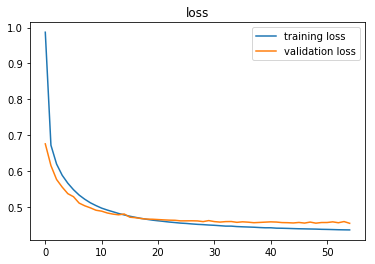

Plotting metrics...


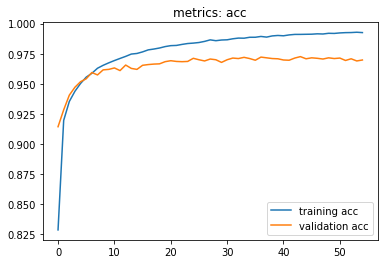

train {'acc': 0.9927091}
test {'acc': 0.9683}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6850432974486257737
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11785477523045329661
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2971723 , acc = 0.18 
Epoch 1 , step 100 , loss= 1.2791376 , acc = 0.73 
Epoch 1 , step 200 , loss= 0.9926314 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.83000505 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.90256804 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.6730218 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.8333764 val_loss= 0.74841905 , acc = 0.91 val acc = 0.91 
Epoch 1 finished, loss= 1.063781 val loss= 0.74841905 ,  acc = 0.80047274 val acc = 0.91
val_acc improved.

Epoch 17 , step 100 , loss= 0.5110071 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.71094966 , acc = 0.96 
Epoch 17 , step 300 , loss= 0.5475851 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.58332366 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.5337539 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.61866164 val_loss= 0.56826985 , acc = 0.98 val acc = 0.9626 
Epoch 17 finished, loss= 0.58418125 val loss= 0.56826985 ,  acc = 0.9684364 val acc = 0.9626

Epoch 18 , step 50 , loss= 0.5261848 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.55543494 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.57059497 , acc = 0.95 
Epoch 18 , step 350 , loss= 0.62901455 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.62340814 , acc = 0.95 
Epoch 18 , step 549 , loss= 0.5558272 val_loss= 0.56863433 , acc = 0.98 val acc = 0.9648 
Epoch 18 finished, loss= 0.5825099 val loss= 0.56863433 ,  acc = 0.96947265 val acc = 0.9648
val_acc improved. 
Epoch 19 , step 0 , loss= 0.58873093 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.64200556 

Epoch 34 , step 450 , loss= 0.51129884 , acc = 0.98 
Epoch 34 , step 549 , loss= 0.5595393 val_loss= 0.5580978 , acc = 0.98 val acc = 0.9678 
Epoch 34 finished, loss= 0.56813 val loss= 0.5580978 ,  acc = 0.9759455 val acc = 0.9678
val_acc improved. 
Epoch 35 , step 0 , loss= 0.5687243 , acc = 0.95 
Epoch 35 , step 100 , loss= 0.6217866 , acc = 0.96 
Epoch 35 , step 200 , loss= 0.5509748 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.5170499 , acc = 0.96 
Epoch 35 , step 400 , loss= 0.6647206 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.5628142 , acc = 0.96 
Epoch 35 , step 549 , loss= 0.6575706 val_loss= 0.5584519 , acc = 0.97 val acc = 0.967 
Epoch 35 finished, loss= 0.56768036 val loss= 0.5584519 ,  acc = 0.9762908 val acc = 0.967

Epoch 36 , step 50 , loss= 0.47496825 , acc = 0.98 
Epoch 36 , step 150 , loss= 0.58918744 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.58688307 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.6706605 , acc = 0.98 
Epoch 36 , step 450 , loss= 0.6383722 , acc = 0.99

Epoch 52 , step 50 , loss= 0.49131024 , acc = 1.0 
Epoch 52 , step 150 , loss= 0.6395826 , acc = 0.97 
Epoch 52 , step 250 , loss= 0.5711588 , acc = 0.99 
Epoch 52 , step 350 , loss= 0.46388623 , acc = 0.99 
Epoch 52 , step 450 , loss= 0.67744917 , acc = 0.96 
Epoch 52 , step 549 , loss= 0.42228404 val_loss= 0.55603325 , acc = 0.99 val acc = 0.967 
Epoch 52 finished, loss= 0.5625689 val loss= 0.55603325 ,  acc = 0.9788727 val acc = 0.967

Epoch 53 , step 0 , loss= 0.5654496 , acc = 0.98 
Epoch 53 , step 100 , loss= 0.55563664 , acc = 0.99 
Epoch 53 , step 200 , loss= 0.55738825 , acc = 0.98 
Epoch 53 , step 300 , loss= 0.5993101 , acc = 0.96 
Epoch 53 , step 400 , loss= 0.5171574 , acc = 1.0 
Epoch 53 , step 500 , loss= 0.43843266 , acc = 0.99 
Epoch 53 , step 549 , loss= 0.61689883 val_loss= 0.5557811 , acc = 0.98 val acc = 0.968 
Epoch 53 finished, loss= 0.5622798 val loss= 0.5557811 ,  acc = 0.9794909 val acc = 0.968

Epoch 54 , step 50 , loss= 0.6126849 , acc = 0.98 
Epoch 54 , ste

Epoch 69 , step 500 , loss= 0.6019093 , acc = 1.0 
Epoch 69 , step 549 , loss= 0.44825053 val_loss= 0.55615735 , acc = 0.99 val acc = 0.9678 
Epoch 69 finished, loss= 0.55965024 val loss= 0.55615735 ,  acc = 0.98080003 val acc = 0.9678

Epoch 70 , step 50 , loss= 0.607905 , acc = 0.95 
Epoch 70 , step 150 , loss= 0.539841 , acc = 1.0 
Epoch 70 , step 250 , loss= 0.5696342 , acc = 1.0 
Epoch 70 , step 350 , loss= 0.46029118 , acc = 0.99 
Epoch 70 , step 450 , loss= 0.6151113 , acc = 0.99 
Epoch 70 , step 549 , loss= 0.5396815 val_loss= 0.5552067 , acc = 0.99 val acc = 0.9688 
Epoch 70 finished, loss= 0.55963564 val loss= 0.5552067 ,  acc = 0.98065454 val acc = 0.9688

Epoch 71 , step 0 , loss= 0.6611976 , acc = 0.95 
Epoch 71 , step 100 , loss= 0.52088594 , acc = 0.99 
Epoch 71 , step 200 , loss= 0.5635591 , acc = 0.97 
Epoch 71 , step 300 , loss= 0.5276778 , acc = 0.98 
Epoch 71 , step 400 , loss= 0.5867655 , acc = 0.97 
Epoch 71 , step 500 , loss= 0.59140813 , acc = 0.98 
Epoch 71 , s

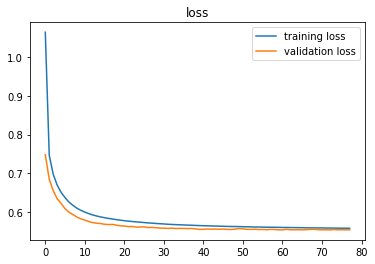

Plotting metrics...


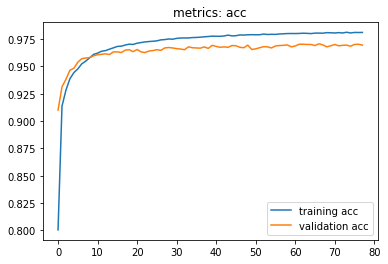

train {'acc': 0.9816909}
test {'acc': 0.9644}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11139526848927233597
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2251070038962895983
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.319388 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.5778787 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.33086085 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.3167256 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.2636112 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.31631202 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.27004403 val_loss= 0.27499962 , acc = 0.9 val acc = 0.9188 
Epoch 1 finished, loss= 0.5699347 val loss= 0.27499962 ,  acc = 0.84534544 val acc = 0.9188
val_acc impro

Epoch 17 , step 100 , loss= 0.0273481 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.07054764 , acc = 0.97 
Epoch 17 , step 300 , loss= 0.05269367 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.04242032 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.06759171 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.17478909 val_loss= 0.10409819 , acc = 0.97 val acc = 0.9674 
Epoch 17 finished, loss= 0.05589277 val loss= 0.10409819 ,  acc = 0.9850909 val acc = 0.9674

Epoch 18 , step 50 , loss= 0.03121634 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.02969138 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.082712285 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.079023495 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.040943585 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.016092755 val_loss= 0.10262398 , acc = 1.0 val acc = 0.97 
Epoch 18 finished, loss= 0.05332387 val loss= 0.10262398 ,  acc = 0.985891 val acc = 0.97

Epoch 19 , step 0 , loss= 0.08982109 , acc = 0.97 
Epoch 19 , step 100 , loss= 0.07442069 , acc = 0.98 


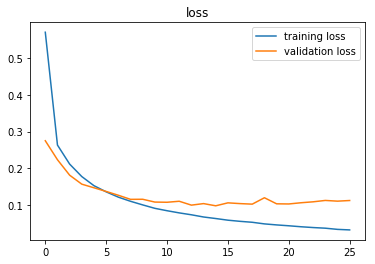

Plotting metrics...


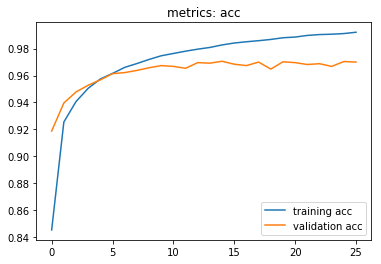

train {'acc': 0.99112725}
test {'acc': 0.9697}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14336781831084186181
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6204132509370964199
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.304801 , acc = 0.16 
Epoch 1 , step 100 , loss= 0.9306716 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.7377455 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.7570242 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.6034672 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.5904292 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.42260438 val_loss= 0.56215 , acc = 0.97 val acc = 0.9206 
Epoch 1 finished, loss= 0.83664334 val loss= 0.56215 ,  acc = 0.8471091 val acc = 0.9206
val_acc improved. 

Epoch 17 , step 100 , loss= 0.42425662 , acc = 0.97 
Epoch 17 , step 200 , loss= 0.36416355 , acc = 0.96 
Epoch 17 , step 300 , loss= 0.3188482 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.28898555 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.31059292 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.366136 val_loss= 0.36475405 , acc = 0.97 val acc = 0.963 
Epoch 17 finished, loss= 0.32766473 val loss= 0.36475405 ,  acc = 0.98027277 val acc = 0.963

Epoch 18 , step 50 , loss= 0.3787118 , acc = 0.95 
Epoch 18 , step 150 , loss= 0.28799245 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.33565944 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.36091268 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.29746872 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.2969897 val_loss= 0.36141378 , acc = 0.99 val acc = 0.9648 
Epoch 18 finished, loss= 0.32249188 val loss= 0.36141378 ,  acc = 0.98185456 val acc = 0.9648

Epoch 19 , step 0 , loss= 0.32584837 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.321352 , acc = 0.97 
Epoch

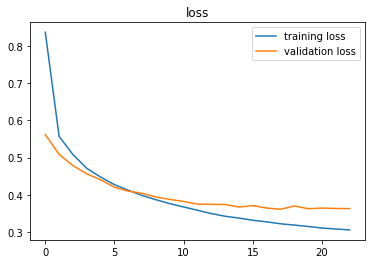

Plotting metrics...


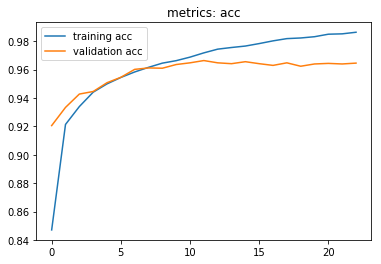

train {'acc': 0.98687273}
test {'acc': 0.9657}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18202577640462023507
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5011176363831760676
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3117943 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.1790133 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.95959604 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.88112015 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.8430444 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.80855876 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.8700478 val_loss= 0.79407334 , acc = 0.88 val acc = 0.9132 
Epoch 1 finished, loss= 1.0648335 val loss= 0.79407334 ,  acc = 0.83105457 val acc = 0.9132
val_acc imp

Epoch 17 , step 100 , loss= 0.5178106 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.5053251 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.46948412 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.575114 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.5822981 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.52090216 val_loss= 0.5792979 , acc = 0.98 val acc = 0.9662 
Epoch 17 finished, loss= 0.56333643 val loss= 0.5792979 ,  acc = 0.9777819 val acc = 0.9662
val_acc improved. 
Epoch 18 , step 50 , loss= 0.5698968 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.5699297 , acc = 0.97 
Epoch 18 , step 250 , loss= 0.5878638 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.67078066 , acc = 0.92 
Epoch 18 , step 450 , loss= 0.6096764 , acc = 0.97 
Epoch 18 , step 549 , loss= 0.61490697 val_loss= 0.5841268 , acc = 0.97 val acc = 0.9616 
Epoch 18 finished, loss= 0.5591626 val loss= 0.5841268 ,  acc = 0.9797818 val acc = 0.9616

Epoch 19 , step 0 , loss= 0.61131227 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.54837966 , acc = 0

Epoch 34 , step 450 , loss= 0.5272212 , acc = 0.97 
Epoch 34 , step 549 , loss= 0.47259465 val_loss= 0.5614358 , acc = 1.0 val acc = 0.9668 
Epoch 34 finished, loss= 0.5259244 val loss= 0.5614358 ,  acc = 0.9909455 val acc = 0.9668

Epoch 35 , step 0 , loss= 0.5044082 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.49317685 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.5125469 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.53370416 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.5555238 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.49109265 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.47443435 val_loss= 0.56481624 , acc = 0.99 val acc = 0.9652 
Epoch 35 finished, loss= 0.5249119 val loss= 0.56481624 ,  acc = 0.9915272 val acc = 0.9652

Epoch 36 , step 50 , loss= 0.5529634 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.58223325 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.5856338 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.47539812 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.5713224 , acc = 0.98 
Epoch 36 , ste

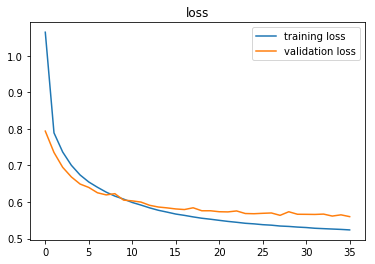

Plotting metrics...


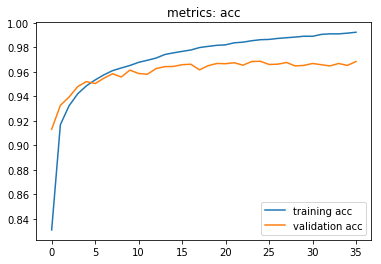

train {'acc': 0.9928}
test {'acc': 0.9669}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 23597460363816842
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11992880849696541121
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2911253 , acc = 0.2 
Epoch 1 , step 100 , loss= 1.4652065 , acc = 0.78 
Epoch 1 , step 200 , loss= 1.0808544 , acc = 0.92 
Epoch 1 , step 300 , loss= 1.0447519 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.1481848 , acc = 0.85 
Epoch 1 , step 500 , loss= 1.0030411 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.9803214 val_loss= 0.97901237 , acc = 0.88 val acc = 0.912 
Epoch 1 finished, loss= 1.2440767 val loss= 0.97901237 ,  acc = 0.8250545 val acc = 0.912
val_acc improved. 
Epo

Epoch 17 , step 100 , loss= 0.765818 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.80787444 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.7319277 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.86717373 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.7751146 , acc = 0.96 
Epoch 17 , step 549 , loss= 0.80905837 val_loss= 0.78475916 , acc = 0.95 val acc = 0.9588 
Epoch 17 finished, loss= 0.7902943 val loss= 0.78475916 ,  acc = 0.97279996 val acc = 0.9588

Epoch 18 , step 50 , loss= 0.75412637 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.8811046 , acc = 0.96 
Epoch 18 , step 250 , loss= 0.8352022 , acc = 0.93 
Epoch 18 , step 350 , loss= 0.77016693 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.7452595 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.75478345 val_loss= 0.7831036 , acc = 0.98 val acc = 0.9598 
Epoch 18 finished, loss= 0.7877539 val loss= 0.7831036 ,  acc = 0.9744909 val acc = 0.9598

Epoch 19 , step 0 , loss= 0.8733751 , acc = 0.95 
Epoch 19 , step 100 , loss= 0.76788217 , acc = 0.96 
Epoch 19 

Epoch 34 , step 350 , loss= 0.83482724 , acc = 0.96 
Epoch 34 , step 450 , loss= 0.6804287 , acc = 0.99 
Epoch 34 , step 549 , loss= 0.7742412 val_loss= 0.76477176 , acc = 0.98 val acc = 0.9674 
Epoch 34 finished, loss= 0.7605396 val loss= 0.76477176 ,  acc = 0.9864909 val acc = 0.9674

Epoch 35 , step 0 , loss= 0.68284684 , acc = 0.99 
Epoch 35 , step 100 , loss= 0.6783042 , acc = 0.97 
Epoch 35 , step 200 , loss= 0.69310325 , acc = 0.98 
Epoch 35 , step 300 , loss= 0.7706118 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.7895218 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.73423564 , acc = 0.98 
Epoch 35 , step 549 , loss= 0.7059283 val_loss= 0.7635293 , acc = 0.99 val acc = 0.9672 
Epoch 35 finished, loss= 0.75999653 val loss= 0.7635293 ,  acc = 0.9861091 val acc = 0.9672

Epoch 36 , step 50 , loss= 0.6472496 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.78732157 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.7161224 , acc = 0.97 
Epoch 36 , step 350 , loss= 0.81773025 , acc = 0.98 
Epoch 36

Epoch 52 , step 50 , loss= 0.7847247 , acc = 1.0 
Epoch 52 , step 150 , loss= 0.8341835 , acc = 0.98 
Epoch 52 , step 250 , loss= 0.71607584 , acc = 1.0 
Epoch 52 , step 350 , loss= 0.888152 , acc = 0.97 
Epoch 52 , step 450 , loss= 0.7989451 , acc = 0.97 
Epoch 52 , step 549 , loss= 0.77490336 val_loss= 0.75637203 , acc = 0.98 val acc = 0.9712 
Epoch 52 finished, loss= 0.75079757 val loss= 0.75637203 ,  acc = 0.9909636 val acc = 0.9712
val_acc improved. 
Epoch 53 , step 0 , loss= 0.69665354 , acc = 1.0 
Epoch 53 , step 100 , loss= 0.81865424 , acc = 1.0 
Epoch 53 , step 200 , loss= 0.759839 , acc = 0.98 
Epoch 53 , step 300 , loss= 0.66610366 , acc = 1.0 
Epoch 53 , step 400 , loss= 0.68549776 , acc = 0.99 
Epoch 53 , step 500 , loss= 0.81980443 , acc = 0.99 
Epoch 53 , step 549 , loss= 0.72754043 val_loss= 0.7557929 , acc = 0.98 val acc = 0.97 
Epoch 53 finished, loss= 0.7502933 val loss= 0.7557929 ,  acc = 0.9911455 val acc = 0.97

Epoch 54 , step 50 , loss= 0.6627143 , acc = 1.0 
E

Epoch 70 , step 50 , loss= 0.82452315 , acc = 1.0 
Epoch 70 , step 150 , loss= 0.8034508 , acc = 1.0 
Epoch 70 , step 250 , loss= 0.7281038 , acc = 1.0 
Epoch 70 , step 350 , loss= 0.6260874 , acc = 0.97 
Epoch 70 , step 450 , loss= 0.7148301 , acc = 1.0 
Epoch 70 , step 549 , loss= 0.71036303 val_loss= 0.7528222 , acc = 1.0 val acc = 0.9706 
Epoch 70 finished, loss= 0.7454702 val loss= 0.7528222 ,  acc = 0.9932908 val acc = 0.9706

Epoch 71 , step 0 , loss= 0.67614096 , acc = 0.98 
Epoch 71 , step 100 , loss= 0.7270996 , acc = 0.99 
Epoch 71 , step 200 , loss= 0.69581705 , acc = 1.0 
Epoch 71 , step 300 , loss= 0.77209306 , acc = 0.98 
Epoch 71 , step 400 , loss= 0.72196645 , acc = 0.99 
Epoch 71 , step 500 , loss= 0.829174 , acc = 0.99 
Epoch 71 , step 549 , loss= 0.67648154 val_loss= 0.75292915 , acc = 1.0 val acc = 0.9712 
Epoch 71 finished, loss= 0.7453545 val loss= 0.75292915 ,  acc = 0.9936182 val acc = 0.9712

Epoch 72 , step 50 , loss= 0.695834 , acc = 1.0 
Epoch 72 , step 150

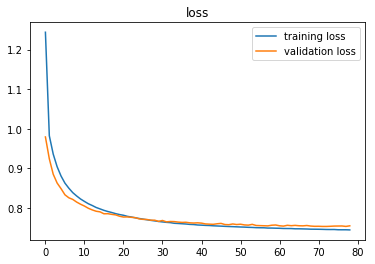

Plotting metrics...


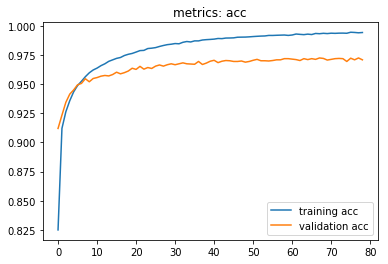

train {'acc': 0.99381816}
test {'acc': 0.9684}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12070918157202320208
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 570644161478285635
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3030703 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.6367738 , acc = 0.69 
Epoch 1 , step 200 , loss= 1.1998706 , acc = 0.87 
Epoch 1 , step 300 , loss= 1.1904924 , acc = 0.83 
Epoch 1 , step 400 , loss= 1.1099311 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.1644017 , acc = 0.86 
Epoch 1 , step 549 , loss= 1.1709281 val_loss= 1.1293235 , acc = 0.88 val acc = 0.8964 
Epoch 1 finished, loss= 1.3991609 val loss= 1.1293235 ,  acc = 0.77812725 val acc = 0.8964
val_acc improved.

Epoch 17 , step 300 , loss= 1.1254892 , acc = 0.96 
Epoch 17 , step 400 , loss= 1.1130699 , acc = 0.93 
Epoch 17 , step 500 , loss= 0.94406265 , acc = 0.93 
Epoch 17 , step 549 , loss= 0.9866887 val_loss= 0.9718559 , acc = 0.96 val acc = 0.9564 
Epoch 17 finished, loss= 0.9991232 val loss= 0.9718559 ,  acc = 0.9566 val acc = 0.9564
val_acc improved. 
Epoch 18 , step 50 , loss= 0.9205561 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.9649699 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.9082353 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.9071317 , acc = 0.95 
Epoch 18 , step 450 , loss= 1.0622606 , acc = 0.94 
Epoch 18 , step 549 , loss= 0.9332215 val_loss= 0.9723166 , acc = 0.97 val acc = 0.9556 
Epoch 18 finished, loss= 0.99727595 val loss= 0.9723166 ,  acc = 0.9587817 val acc = 0.9556

Epoch 19 , step 0 , loss= 0.99118197 , acc = 0.95 
Epoch 19 , step 100 , loss= 1.0633593 , acc = 0.96 
Epoch 19 , step 200 , loss= 1.1790842 , acc = 0.96 
Epoch 19 , step 300 , loss= 1.1024125 , acc = 0.9 


Epoch 35 , step 100 , loss= 0.99399775 , acc = 0.97 
Epoch 35 , step 200 , loss= 0.9699099 , acc = 0.95 
Epoch 35 , step 300 , loss= 0.99265295 , acc = 0.97 
Epoch 35 , step 400 , loss= 0.98082757 , acc = 0.95 
Epoch 35 , step 500 , loss= 0.96591836 , acc = 0.95 
Epoch 35 , step 549 , loss= 0.99963164 val_loss= 0.9641752 , acc = 0.91 val acc = 0.9604 
Epoch 35 finished, loss= 0.9850647 val loss= 0.9641752 ,  acc = 0.96519995 val acc = 0.9604

Epoch 36 , step 50 , loss= 0.98753035 , acc = 0.97 
Epoch 36 , step 150 , loss= 0.97381127 , acc = 0.97 
Epoch 36 , step 250 , loss= 0.9244965 , acc = 0.97 
Epoch 36 , step 350 , loss= 0.95552754 , acc = 0.98 
Epoch 36 , step 450 , loss= 1.0520107 , acc = 0.95 
Epoch 36 , step 549 , loss= 0.9403457 val_loss= 0.96404773 , acc = 1.0 val acc = 0.9616 
Epoch 36 finished, loss= 0.9846826 val loss= 0.96404773 ,  acc = 0.96558183 val acc = 0.9616
val_acc improved. 
Epoch 37 , step 0 , loss= 0.9874177 , acc = 0.97 
Epoch 37 , step 100 , loss= 0.9789491 , 

Epoch 52 , step 549 , loss= 1.0326748 val_loss= 0.9609178 , acc = 0.97 val acc = 0.962 
Epoch 52 finished, loss= 0.98040104 val loss= 0.9609178 ,  acc = 0.9690727 val acc = 0.962

Epoch 53 , step 0 , loss= 0.97951263 , acc = 0.96 
Epoch 53 , step 100 , loss= 1.0729823 , acc = 0.96 
Epoch 53 , step 200 , loss= 0.914687 , acc = 0.98 
Epoch 53 , step 300 , loss= 1.0238507 , acc = 0.95 
Epoch 53 , step 400 , loss= 1.0109965 , acc = 0.97 
Epoch 53 , step 500 , loss= 0.8660057 , acc = 0.98 
Epoch 53 , step 549 , loss= 0.9633213 val_loss= 0.96074903 , acc = 0.99 val acc = 0.961 
Epoch 53 finished, loss= 0.98005193 val loss= 0.96074903 ,  acc = 0.9692364 val acc = 0.961

Epoch 54 , step 50 , loss= 1.0485672 , acc = 0.95 
Epoch 54 , step 150 , loss= 0.8440322 , acc = 0.97 
Epoch 54 , step 250 , loss= 0.9506801 , acc = 0.95 
Epoch 54 , step 350 , loss= 0.98693675 , acc = 0.96 
Epoch 54 , step 450 , loss= 1.0010356 , acc = 0.97 
Epoch 54 , step 549 , loss= 1.0282533 val_loss= 0.9608607 , acc = 0.

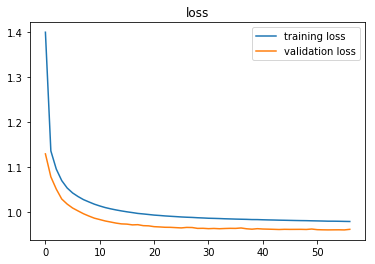

Plotting metrics...


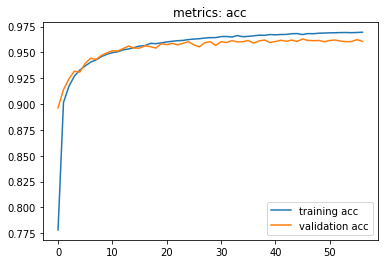

train {'acc': 0.96674544}
test {'acc': 0.9561}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1322905152753233786
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4259245272905282537
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3190622 , acc = 0.12 
Epoch 1 , step 100 , loss= 0.6450042 , acc = 0.82 
Epoch 1 , step 200 , loss= 0.38642442 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.35177812 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.3106811 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.3053666 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.26172963 val_loss= 0.2600057 , acc = 0.92 val acc = 0.9256 
Epoch 1 finished, loss= 0.5901993 val loss= 0.2600057 ,  acc = 0.8292182 val acc = 0.9256
val_acc improv

Epoch 17 , step 100 , loss= 0.027337218 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.091254145 , acc = 0.98 
Epoch 17 , step 300 , loss= 0.054715253 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.04147312 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.12432637 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.19471565 val_loss= 0.09227866 , acc = 0.96 val acc = 0.9742 
Epoch 17 finished, loss= 0.05454118 val loss= 0.09227866 ,  acc = 0.9856364 val acc = 0.9742

Epoch 18 , step 50 , loss= 0.042962007 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.024429165 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.08368351 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.042034116 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.027539277 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.03465452 val_loss= 0.10427895 , acc = 0.99 val acc = 0.9718 
Epoch 18 finished, loss= 0.052690547 val loss= 0.10427895 ,  acc = 0.9858545 val acc = 0.9718

Epoch 19 , step 0 , loss= 0.04354317 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.09140913 , acc 

Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 8, 'temperature_effect': 1, 'train_acc': 0.9952545, 'test_acc': 0.9716}
Plotting loss...


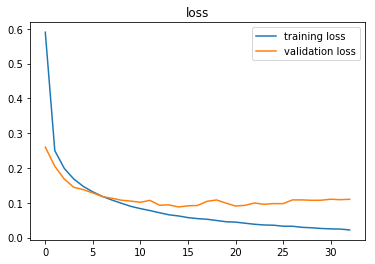

Plotting metrics...


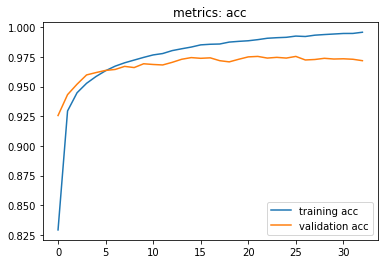

train {'acc': 0.9952545}
test {'acc': 0.9716}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6685083444996759515
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 10519550765102372336
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.322704 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.907974 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.76139283 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.7695856 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.5602862 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.563555 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.6692058 val_loss= 0.6531278 , acc = 0.9 val acc = 0.9124 
Epoch 1 finished, loss= 0.91576993 val loss= 0.6531278 ,  acc = 0.83109087 val acc = 0.9124
val_acc improved.

Epoch 17 , step 100 , loss= 0.3929903 , acc = 0.97 
Epoch 17 , step 200 , loss= 0.4030278 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.40993735 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.36464092 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.34473425 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.3719939 val_loss= 0.43606448 , acc = 1.0 val acc = 0.9718 
Epoch 17 finished, loss= 0.40266246 val loss= 0.43606448 ,  acc = 0.9820728 val acc = 0.9718
val_acc improved. 
Epoch 18 , step 50 , loss= 0.37729844 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.37684673 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.39089558 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.4017014 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.3560071 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.45409873 val_loss= 0.44145703 , acc = 0.97 val acc = 0.9704 
Epoch 18 finished, loss= 0.39853498 val loss= 0.44145703 ,  acc = 0.9835092 val acc = 0.9704

Epoch 19 , step 0 , loss= 0.41794407 , acc = 0.97 
Epoch 19 , step 100 , loss= 0.34661517 ,

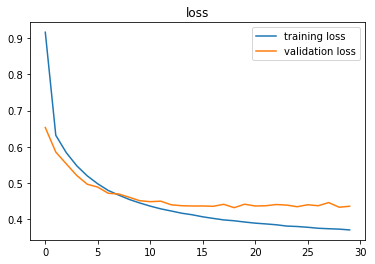

Plotting metrics...


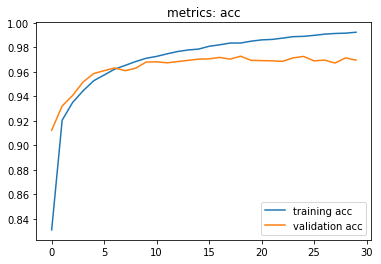

train {'acc': 0.9936182}
test {'acc': 0.9689}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12365530410339921474
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 8671332184279447800
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3076696 , acc = 0.15 
Epoch 1 , step 100 , loss= 1.3385558 , acc = 0.83 
Epoch 1 , step 200 , loss= 1.0959922 , acc = 0.86 
Epoch 1 , step 300 , loss= 1.1137334 , acc = 0.83 
Epoch 1 , step 400 , loss= 0.94094586 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.9376917 , acc = 0.92 
Epoch 1 , step 549 , loss= 1.0136616 val_loss= 0.95373636 , acc = 0.89 val acc = 0.9142 
Epoch 1 finished, loss= 1.1940722 val loss= 0.95373636 ,  acc = 0.83970916 val acc = 0.9142
val_acc impro

Epoch 17 , step 200 , loss= 0.74230766 , acc = 0.95 
Epoch 17 , step 300 , loss= 0.704987 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.74246436 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.702283 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.75982636 val_loss= 0.7505137 , acc = 0.99 val acc = 0.966 
Epoch 17 finished, loss= 0.73451 val loss= 0.7505137 ,  acc = 0.976691 val acc = 0.966
val_acc improved. 
Epoch 18 , step 50 , loss= 0.6676975 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.72538084 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.6762328 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.72446287 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.63558877 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.7405467 val_loss= 0.74705684 , acc = 0.97 val acc = 0.966 
Epoch 18 finished, loss= 0.7306214 val loss= 0.74705684 ,  acc = 0.97761816 val acc = 0.966

Epoch 19 , step 0 , loss= 0.73306143 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.7731666 , acc = 0.98 
Epoch 19 , step 200 , loss= 0.72688645 , acc = 0.97 

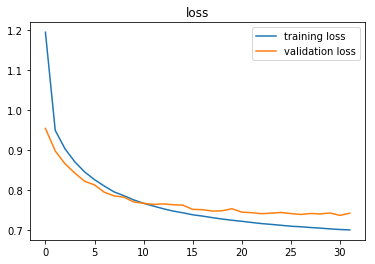

Plotting metrics...


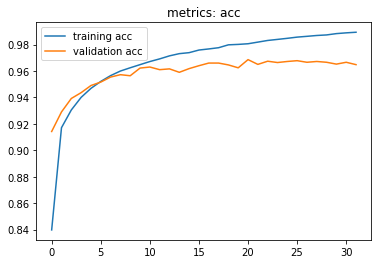

train {'acc': 0.98865455}
test {'acc': 0.9685}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11256257562361485289
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 16715054420925248896
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.304442 , acc = 0.11 
Epoch 1 , step 100 , loss= 1.5144577 , acc = 0.88 
Epoch 1 , step 200 , loss= 1.438529 , acc = 0.84 
Epoch 1 , step 300 , loss= 1.4686577 , acc = 0.83 
Epoch 1 , step 400 , loss= 1.2755489 , acc = 0.89 
Epoch 1 , step 500 , loss= 1.3178959 , acc = 0.89 
Epoch 1 , step 549 , loss= 1.2069964 val_loss= 1.2196939 , acc = 0.9 val acc = 0.9132 
Epoch 1 finished, loss= 1.4405428 val loss= 1.2196939 ,  acc = 0.8309273 val acc = 0.9132
val_acc improved

Epoch 17 , step 200 , loss= 0.93643105 , acc = 0.97 
Epoch 17 , step 300 , loss= 1.0635384 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.96663296 , acc = 0.99 
Epoch 17 , step 500 , loss= 1.1019849 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.97659934 val_loss= 1.0296191 , acc = 1.0 val acc = 0.9662 
Epoch 17 finished, loss= 1.0381308 val loss= 1.0296191 ,  acc = 0.9742545 val acc = 0.9662
val_acc improved. 
Epoch 18 , step 50 , loss= 0.9576127 , acc = 0.99 
Epoch 18 , step 150 , loss= 1.0723228 , acc = 0.98 
Epoch 18 , step 250 , loss= 1.0216109 , acc = 0.98 
Epoch 18 , step 350 , loss= 1.0476075 , acc = 0.98 
Epoch 18 , step 450 , loss= 1.0136588 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.93385124 val_loss= 1.0276637 , acc = 1.0 val acc = 0.9644 
Epoch 18 finished, loss= 1.0348579 val loss= 1.0276637 ,  acc = 0.9757455 val acc = 0.9644

Epoch 19 , step 0 , loss= 0.9646732 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.1430299 , acc = 0.96 
Epoch 19 , step 200 , loss= 1.0938721 , acc = 0.99

Epoch 35 , step 100 , loss= 0.98606414 , acc = 1.0 
Epoch 35 , step 200 , loss= 1.0198653 , acc = 0.99 
Epoch 35 , step 300 , loss= 1.0271837 , acc = 1.0 
Epoch 35 , step 400 , loss= 1.047273 , acc = 0.97 
Epoch 35 , step 500 , loss= 1.0972731 , acc = 0.98 
Epoch 35 , step 549 , loss= 0.9783357 val_loss= 1.0121279 , acc = 1.0 val acc = 0.9704 
Epoch 35 finished, loss= 1.0084383 val loss= 1.0121279 ,  acc = 0.9887999 val acc = 0.9704

Epoch 36 , step 50 , loss= 1.0129806 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.999295 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.9769485 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.0779766 , acc = 0.98 
Epoch 36 , step 450 , loss= 1.0441294 , acc = 0.99 
Epoch 36 , step 549 , loss= 0.9960149 val_loss= 1.0098364 , acc = 0.99 val acc = 0.97 
Epoch 36 finished, loss= 1.007836 val loss= 1.0098364 ,  acc = 0.9890182 val acc = 0.97

Epoch 37 , step 0 , loss= 1.0532485 , acc = 0.98 
Epoch 37 , step 100 , loss= 0.984541 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.

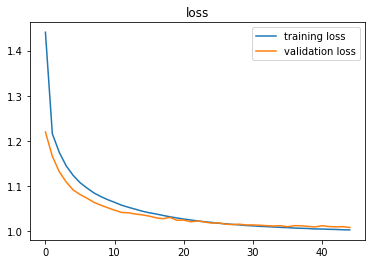

Plotting metrics...


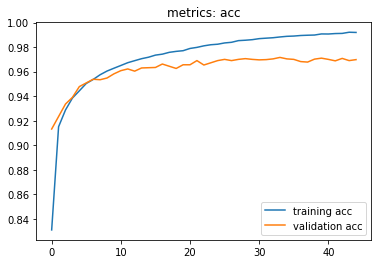

train {'acc': 0.9920909}
test {'acc': 0.965}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 379132854157685188
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11404063666652136088
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3029015 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.7967582 , acc = 0.61 
Epoch 1 , step 200 , loss= 1.5501174 , acc = 0.79 
Epoch 1 , step 300 , loss= 1.5513922 , acc = 0.8 
Epoch 1 , step 400 , loss= 1.5918046 , acc = 0.81 
Epoch 1 , step 500 , loss= 1.4987555 , acc = 0.85 
Epoch 1 , step 549 , loss= 1.6413056 val_loss= 1.43396 , acc = 0.77 val acc = 0.8752 
Epoch 1 finished, loss= 1.6435629 val loss= 1.43396 ,  acc = 0.7288181 val acc = 0.8752
val_acc improved. 
Epoch

Epoch 17 , step 200 , loss= 1.2997121 , acc = 0.95 
Epoch 17 , step 300 , loss= 1.2671891 , acc = 0.96 
Epoch 17 , step 400 , loss= 1.4101292 , acc = 0.91 
Epoch 17 , step 500 , loss= 1.4070487 , acc = 0.95 
Epoch 17 , step 549 , loss= 1.3789445 val_loss= 1.3053879 , acc = 0.94 val acc = 0.9524 
Epoch 17 finished, loss= 1.3306499 val loss= 1.3053879 ,  acc = 0.9540727 val acc = 0.9524

Epoch 18 , step 50 , loss= 1.2878624 , acc = 0.95 
Epoch 18 , step 150 , loss= 1.3049301 , acc = 0.95 
Epoch 18 , step 250 , loss= 1.4448317 , acc = 0.96 
Epoch 18 , step 350 , loss= 1.2882018 , acc = 0.94 
Epoch 18 , step 450 , loss= 1.3276346 , acc = 0.96 
Epoch 18 , step 549 , loss= 1.4625057 val_loss= 1.3045139 , acc = 0.94 val acc = 0.9542 
Epoch 18 finished, loss= 1.3296037 val loss= 1.3045139 ,  acc = 0.95561814 val acc = 0.9542

Epoch 19 , step 0 , loss= 1.2897966 , acc = 0.96 
Epoch 19 , step 100 , loss= 1.3748155 , acc = 0.95 
Epoch 19 , step 200 , loss= 1.2539585 , acc = 0.97 
Epoch 19 , step 

Epoch 35 , step 100 , loss= 1.4081557 , acc = 0.97 
Epoch 35 , step 200 , loss= 1.3598212 , acc = 0.98 
Epoch 35 , step 300 , loss= 1.1312474 , acc = 0.96 
Epoch 35 , step 400 , loss= 1.3910795 , acc = 0.99 
Epoch 35 , step 500 , loss= 1.3733797 , acc = 0.98 
Epoch 35 , step 549 , loss= 1.4856999 val_loss= 1.296784 , acc = 0.93 val acc = 0.9584 
Epoch 35 finished, loss= 1.3195648 val loss= 1.296784 ,  acc = 0.96192735 val acc = 0.9584
val_acc improved. 
Epoch 36 , step 50 , loss= 1.3971183 , acc = 0.94 
Epoch 36 , step 150 , loss= 1.292273 , acc = 0.96 
Epoch 36 , step 250 , loss= 1.3511424 , acc = 0.96 
Epoch 36 , step 350 , loss= 1.3411783 , acc = 0.97 
Epoch 36 , step 450 , loss= 1.3201329 , acc = 0.96 
Epoch 36 , step 549 , loss= 1.268184 val_loss= 1.2961318 , acc = 0.98 val acc = 0.9588 
Epoch 36 finished, loss= 1.3193191 val loss= 1.2961318 ,  acc = 0.96234554 val acc = 0.9588
val_acc improved. 
Epoch 37 , step 0 , loss= 1.39057 , acc = 0.97 
Epoch 37 , step 100 , loss= 1.3059337

Epoch 52 , step 549 , loss= 1.4065486 val_loss= 1.2942519 , acc = 0.94 val acc = 0.9624 
Epoch 52 finished, loss= 1.3154643 val loss= 1.2942519 ,  acc = 0.96558183 val acc = 0.9624

Epoch 53 , step 0 , loss= 1.2567239 , acc = 0.97 
Epoch 53 , step 100 , loss= 1.3340793 , acc = 0.96 
Epoch 53 , step 200 , loss= 1.2453437 , acc = 0.97 
Epoch 53 , step 300 , loss= 1.3056706 , acc = 0.98 
Epoch 53 , step 400 , loss= 1.3592519 , acc = 0.98 
Epoch 53 , step 500 , loss= 1.3594142 , acc = 0.97 
Epoch 53 , step 549 , loss= 1.4070958 val_loss= 1.2938291 , acc = 0.95 val acc = 0.9628 
Epoch 53 finished, loss= 1.3152713 val loss= 1.2938291 ,  acc = 0.9659455 val acc = 0.9628

Epoch 54 , step 50 , loss= 1.3370693 , acc = 0.94 
Epoch 54 , step 150 , loss= 1.3655008 , acc = 0.96 
Epoch 54 , step 250 , loss= 1.234254 , acc = 0.99 
Epoch 54 , step 350 , loss= 1.3279283 , acc = 0.95 
Epoch 54 , step 450 , loss= 1.3399069 , acc = 0.95 
Epoch 54 , step 549 , loss= 1.3428072 val_loss= 1.293768 , acc = 0.92

Epoch 70 , step 250 , loss= 1.4090015 , acc = 0.95 
Epoch 70 , step 350 , loss= 1.3987793 , acc = 0.95 
Epoch 70 , step 450 , loss= 1.2521224 , acc = 0.97 
Epoch 70 , step 549 , loss= 1.401099 val_loss= 1.2934322 , acc = 0.98 val acc = 0.962 
Epoch 70 finished, loss= 1.3132541 val loss= 1.2934322 ,  acc = 0.9674909 val acc = 0.962

Epoch 71 , step 0 , loss= 1.2869908 , acc = 0.97 
Epoch 71 , step 100 , loss= 1.2699959 , acc = 0.96 
Epoch 71 , step 200 , loss= 1.307451 , acc = 0.99 
Epoch 71 , step 300 , loss= 1.2895206 , acc = 0.99 
Epoch 71 , step 400 , loss= 1.3605608 , acc = 0.95 
Epoch 71 , step 500 , loss= 1.4506129 , acc = 0.94 
Epoch 71 , step 549 , loss= 1.3241533 val_loss= 1.2926123 , acc = 0.96 val acc = 0.9634 
Epoch 71 finished, loss= 1.3131027 val loss= 1.2926123 ,  acc = 0.96810913 val acc = 0.9634

Epoch 72 , step 50 , loss= 1.2591281 , acc = 0.93 
Epoch 72 , step 150 , loss= 1.3636863 , acc = 0.97 
Epoch 72 , step 250 , loss= 1.3947307 , acc = 0.96 
Epoch 72 , step 350 

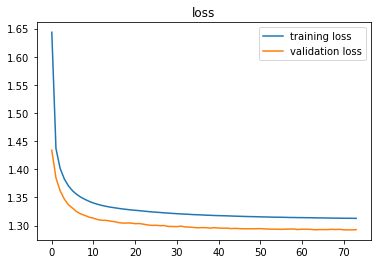

Plotting metrics...


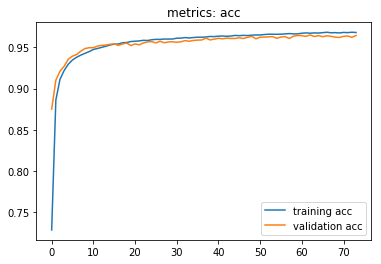

train {'acc': 0.9686}
test {'acc': 0.9605}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14640644018381844066
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7075116261378025555
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2906272 , acc = 0.09 
Epoch 1 , step 100 , loss= 0.59716654 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.41786388 , acc = 0.89 
Epoch 1 , step 300 , loss= 0.34153336 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.31268278 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.32653037 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.25942212 val_loss= 0.27646166 , acc = 0.9 val acc = 0.9208 
Epoch 1 finished, loss= 0.57424283 val loss= 0.27646166 ,  acc = 0.8402 val acc = 0.9208
val_acc improv

Epoch 17 , step 100 , loss= 0.048118196 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.07860816 , acc = 0.97 
Epoch 17 , step 300 , loss= 0.059953712 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.03200161 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.12612556 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.1578686 val_loss= 0.107795656 , acc = 0.96 val acc = 0.97 
Epoch 17 finished, loss= 0.058795653 val loss= 0.107795656 ,  acc = 0.9839273 val acc = 0.97

Epoch 18 , step 50 , loss= 0.0535044 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.057520226 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.097904444 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.06823985 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.041943055 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.031965546 val_loss= 0.10423375 , acc = 0.99 val acc = 0.9696 
Epoch 18 finished, loss= 0.056687266 val loss= 0.10423375 ,  acc = 0.9849091 val acc = 0.9696

Epoch 19 , step 0 , loss= 0.049109507 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.05574891 , acc 

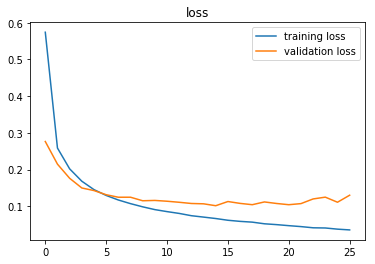

Plotting metrics...


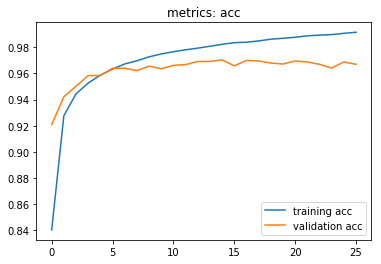

train {'acc': 0.98663634}
test {'acc': 0.9637}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10120038451478505117
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11635343593384723188
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3102584 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.008538 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.84091926 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.85198045 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.69424623 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.7027045 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.57126355 val_loss= 0.6813113 , acc = 0.95 val acc = 0.9226 
Epoch 1 finished, loss= 0.9467807 val loss= 0.6813113 ,  acc = 0.8322545 val acc = 0.9226
val_acc im

Epoch 17 , step 200 , loss= 0.53203374 , acc = 0.93 
Epoch 17 , step 300 , loss= 0.4307566 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.448386 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.47024482 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.5189146 val_loss= 0.51117986 , acc = 0.96 val acc = 0.9652 
Epoch 17 finished, loss= 0.47199872 val loss= 0.51117986 ,  acc = 0.9788181 val acc = 0.9652

Epoch 18 , step 50 , loss= 0.48053133 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.45301294 , acc = 0.97 
Epoch 18 , step 250 , loss= 0.46894848 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.5147523 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.44517523 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.45460513 val_loss= 0.50435436 , acc = 0.99 val acc = 0.9668 
Epoch 18 finished, loss= 0.46733558 val loss= 0.50435436 ,  acc = 0.9813454 val acc = 0.9668
val_acc improved. 
Epoch 19 , step 0 , loss= 0.4253934 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.4591155 , acc = 0.97 
Epoch 19 , step 200 , loss= 0.40581328 ,

Epoch 34 , step 549 , loss= 0.41280895 val_loss= 0.5158552 , acc = 1.0 val acc = 0.9652 
Epoch 34 finished, loss= 0.43309593 val loss= 0.5158552 ,  acc = 0.9920546 val acc = 0.9652

Epoch 35 , step 0 , loss= 0.40091202 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.49318308 , acc = 0.96 
Epoch 35 , step 200 , loss= 0.4232012 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.39055827 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.43015543 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.41723868 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.40949905 val_loss= 0.518667 , acc = 1.0 val acc = 0.9658 
Epoch 35 finished, loss= 0.43188754 val loss= 0.518667 ,  acc = 0.9925637 val acc = 0.9658

Epoch 36 , step 50 , loss= 0.4562297 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.41807765 , acc = 0.99 
Epoch 36 , step 250 , loss= 0.4193674 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.4276344 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.43650028 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.5082026 val_loss= 0.51146454 , acc = 0.

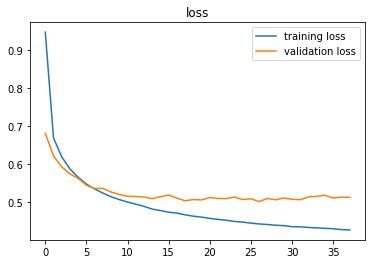

Plotting metrics...


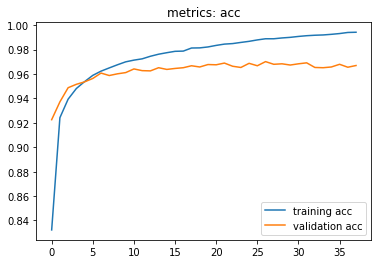

train {'acc': 0.9937091}
test {'acc': 0.9663}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12993523869138795224
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2275739431965875950
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3150835 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.393749 , acc = 0.77 
Epoch 1 , step 200 , loss= 1.1744308 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.1467286 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.1159378 , acc = 0.91 
Epoch 1 , step 500 , loss= 1.0274566 , acc = 0.92 
Epoch 1 , step 549 , loss= 1.0382757 val_loss= 1.0540006 , acc = 0.9 val acc = 0.9162 
Epoch 1 finished, loss= 1.2686293 val loss= 1.0540006 ,  acc = 0.8334182 val acc = 0.9162
val_acc improved. 

Epoch 17 , step 200 , loss= 0.8188175 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.93016595 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.78588533 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.9192374 , acc = 0.96 
Epoch 17 , step 549 , loss= 0.8448178 val_loss= 0.87162125 , acc = 0.97 val acc = 0.9652 
Epoch 17 finished, loss= 0.85537845 val loss= 0.87162125 ,  acc = 0.9782 val acc = 0.9652

Epoch 18 , step 50 , loss= 0.91317374 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.94546205 , acc = 0.93 
Epoch 18 , step 250 , loss= 0.884885 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.84725076 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.8361454 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.81348455 val_loss= 0.869916 , acc = 0.99 val acc = 0.9652 
Epoch 18 finished, loss= 0.8519155 val loss= 0.869916 ,  acc = 0.9792 val acc = 0.9652

Epoch 19 , step 0 , loss= 0.82616717 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.83772236 , acc = 0.98 
Epoch 19 , step 200 , loss= 0.84903276 , acc = 0.99 
Epoch 19 , ste

Epoch 35 , step 100 , loss= 0.8478379 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.8169929 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.82511026 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.7551315 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.75580126 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.74409854 val_loss= 0.85900146 , acc = 1.0 val acc = 0.969 
Epoch 35 finished, loss= 0.819401 val loss= 0.85900146 ,  acc = 0.99232733 val acc = 0.969
val_acc improved. 
Epoch 36 , step 50 , loss= 0.8025905 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.78813225 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.77351207 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.8417844 , acc = 0.98 
Epoch 36 , step 450 , loss= 0.8015525 , acc = 0.98 
Epoch 36 , step 549 , loss= 0.8495956 val_loss= 0.85784197 , acc = 0.99 val acc = 0.9682 
Epoch 36 finished, loss= 0.8182682 val loss= 0.85784197 ,  acc = 0.992491 val acc = 0.9682

Epoch 37 , step 0 , loss= 0.83040637 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.8143056 , acc = 1.0 
E

Epoch 52 , step 549 , loss= 0.8770924 val_loss= 0.8495929 , acc = 0.98 val acc = 0.9692 
Epoch 52 finished, loss= 0.807834 val loss= 0.8495929 ,  acc = 0.9968182 val acc = 0.9692

Epoch 53 , step 0 , loss= 0.8426183 , acc = 1.0 
Epoch 53 , step 100 , loss= 0.7980661 , acc = 1.0 
Epoch 53 , step 200 , loss= 0.79680306 , acc = 1.0 
Epoch 53 , step 300 , loss= 0.7575281 , acc = 1.0 
Epoch 53 , step 400 , loss= 0.836642 , acc = 1.0 
Epoch 53 , step 500 , loss= 0.7734955 , acc = 1.0 
Epoch 53 , step 549 , loss= 0.82772744 val_loss= 0.8497722 , acc = 1.0 val acc = 0.9694 
Epoch 53 finished, loss= 0.80731887 val loss= 0.8497722 ,  acc = 0.9968 val acc = 0.9694

Epoch 54 , step 50 , loss= 0.82433456 , acc = 0.99 
Epoch 54 , step 150 , loss= 0.82756543 , acc = 1.0 
Epoch 54 , step 250 , loss= 0.7758694 , acc = 1.0 
Epoch 54 , step 350 , loss= 0.8223784 , acc = 0.99 
Epoch 54 , step 450 , loss= 0.78379273 , acc = 1.0 
Epoch 54 , step 549 , loss= 0.8628044 val_loss= 0.8512797 , acc = 1.0 val acc 

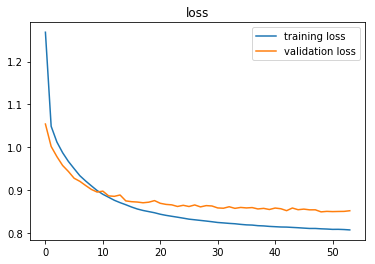

Plotting metrics...


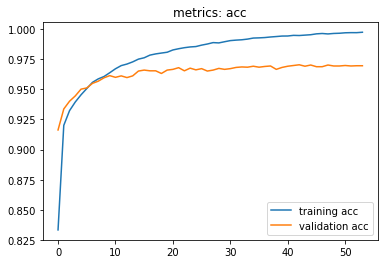

train {'acc': 0.99527276}
test {'acc': 0.9672}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1881546176127048345
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 16718026614990118047
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2967482 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.6982832 , acc = 0.85 
Epoch 1 , step 200 , loss= 1.4933847 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.3759437 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.4877567 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.4962609 , acc = 0.89 
Epoch 1 , step 549 , loss= 1.4474874 val_loss= 1.3828164 , acc = 0.86 val acc = 0.9112 
Epoch 1 finished, loss= 1.5774132 val loss= 1.3828164 ,  acc = 0.8168546 val acc = 0.9112
val_acc improv

Epoch 17 , step 200 , loss= 1.2168115 , acc = 0.96 
Epoch 17 , step 300 , loss= 1.2245936 , acc = 0.98 
Epoch 17 , step 400 , loss= 1.1900209 , acc = 1.0 
Epoch 17 , step 500 , loss= 1.2448081 , acc = 0.99 
Epoch 17 , step 549 , loss= 1.1880109 val_loss= 1.2178873 , acc = 0.97 val acc = 0.9662 
Epoch 17 finished, loss= 1.2210556 val loss= 1.2178873 ,  acc = 0.97565454 val acc = 0.9662
val_acc improved. 
Epoch 18 , step 50 , loss= 1.2489 , acc = 0.96 
Epoch 18 , step 150 , loss= 1.2088437 , acc = 0.99 
Epoch 18 , step 250 , loss= 1.2918015 , acc = 0.97 
Epoch 18 , step 350 , loss= 1.2461933 , acc = 0.97 
Epoch 18 , step 450 , loss= 1.1667635 , acc = 0.97 
Epoch 18 , step 549 , loss= 1.2418725 val_loss= 1.2171935 , acc = 0.99 val acc = 0.9644 
Epoch 18 finished, loss= 1.2189264 val loss= 1.2171935 ,  acc = 0.97694546 val acc = 0.9644

Epoch 19 , step 0 , loss= 1.210729 , acc = 0.97 
Epoch 19 , step 100 , loss= 1.263503 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.2003359 , acc = 0.99 
Epoc

Epoch 35 , step 100 , loss= 1.1735778 , acc = 1.0 
Epoch 35 , step 200 , loss= 1.1770586 , acc = 1.0 
Epoch 35 , step 300 , loss= 1.1926293 , acc = 1.0 
Epoch 35 , step 400 , loss= 1.152092 , acc = 0.99 
Epoch 35 , step 500 , loss= 1.2565961 , acc = 1.0 
Epoch 35 , step 549 , loss= 1.16481 val_loss= 1.2027386 , acc = 0.98 val acc = 0.9712 
Epoch 35 finished, loss= 1.1971765 val loss= 1.2027386 ,  acc = 0.9881636 val acc = 0.9712
val_acc improved. 
Epoch 36 , step 50 , loss= 1.2647593 , acc = 0.98 
Epoch 36 , step 150 , loss= 1.233319 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.1956189 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.1878603 , acc = 0.99 
Epoch 36 , step 450 , loss= 1.2190281 , acc = 0.99 
Epoch 36 , step 549 , loss= 1.1430563 val_loss= 1.2004998 , acc = 1.0 val acc = 0.97 
Epoch 36 finished, loss= 1.1963105 val loss= 1.2004998 ,  acc = 0.9891636 val acc = 0.97

Epoch 37 , step 0 , loss= 1.1405033 , acc = 0.98 
Epoch 37 , step 100 , loss= 1.2217879 , acc = 1.0 
Epoch 37 , step

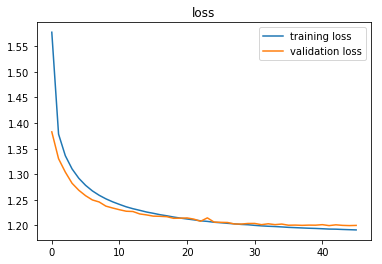

Plotting metrics...


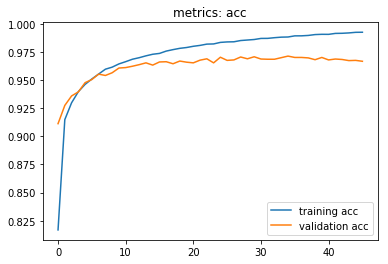

train {'acc': 0.9929818}
test {'acc': 0.9682}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16286363658506945029
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11966512754286231595
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3014228 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.9084725 , acc = 0.7 
Epoch 1 , step 200 , loss= 1.6988491 , acc = 0.84 
Epoch 1 , step 300 , loss= 1.6732712 , acc = 0.81 
Epoch 1 , step 400 , loss= 1.6574225 , acc = 0.86 
Epoch 1 , step 500 , loss= 1.6376251 , acc = 0.85 
Epoch 1 , step 549 , loss= 1.681951 val_loss= 1.6528186 , acc = 0.89 val acc = 0.8672 
Epoch 1 finished, loss= 1.8104823 val loss= 1.6528186 ,  acc = 0.7417818 val acc = 0.8672
val_acc improved.

Epoch 17 , step 200 , loss= 1.7152559 , acc = 0.92 
Epoch 17 , step 300 , loss= 1.6731519 , acc = 0.94 
Epoch 17 , step 400 , loss= 1.6582855 , acc = 0.94 
Epoch 17 , step 500 , loss= 1.5255938 , acc = 0.95 
Epoch 17 , step 549 , loss= 1.5826402 val_loss= 1.5597035 , acc = 0.97 val acc = 0.9504 
Epoch 17 finished, loss= 1.5798479 val loss= 1.5597035 ,  acc = 0.9496545 val acc = 0.9504

Epoch 18 , step 50 , loss= 1.508614 , acc = 0.97 
Epoch 18 , step 150 , loss= 1.5583781 , acc = 0.96 
Epoch 18 , step 250 , loss= 1.5259073 , acc = 0.94 
Epoch 18 , step 350 , loss= 1.4919134 , acc = 0.94 
Epoch 18 , step 450 , loss= 1.6205182 , acc = 0.91 
Epoch 18 , step 549 , loss= 1.546788 val_loss= 1.5583906 , acc = 0.96 val acc = 0.9506 
Epoch 18 finished, loss= 1.5788624 val loss= 1.5583906 ,  acc = 0.9507091 val acc = 0.9506

Epoch 19 , step 0 , loss= 1.5645756 , acc = 0.95 
Epoch 19 , step 100 , loss= 1.587356 , acc = 0.97 
Epoch 19 , step 200 , loss= 1.7077332 , acc = 0.94 
Epoch 19 , step 300 

Epoch 35 , step 100 , loss= 1.5906738 , acc = 0.96 
Epoch 35 , step 200 , loss= 1.558752 , acc = 0.94 
Epoch 35 , step 300 , loss= 1.5807626 , acc = 0.97 
Epoch 35 , step 400 , loss= 1.5487258 , acc = 0.94 
Epoch 35 , step 500 , loss= 1.5412459 , acc = 0.94 
Epoch 35 , step 549 , loss= 1.5504694 val_loss= 1.5517659 , acc = 0.94 val acc = 0.9574 
Epoch 35 finished, loss= 1.5701036 val loss= 1.5517659 ,  acc = 0.959891 val acc = 0.9574

Epoch 36 , step 50 , loss= 1.569253 , acc = 0.98 
Epoch 36 , step 150 , loss= 1.595546 , acc = 0.96 
Epoch 36 , step 250 , loss= 1.5380106 , acc = 0.97 
Epoch 36 , step 350 , loss= 1.5744694 , acc = 0.97 
Epoch 36 , step 450 , loss= 1.6471118 , acc = 0.92 
Epoch 36 , step 549 , loss= 1.5489414 val_loss= 1.5512867 , acc = 1.0 val acc = 0.9584 
Epoch 36 finished, loss= 1.5697942 val loss= 1.5512867 ,  acc = 0.9605999 val acc = 0.9584
val_acc improved. 
Epoch 37 , step 0 , loss= 1.5591563 , acc = 0.96 
Epoch 37 , step 100 , loss= 1.5785147 , acc = 0.93 
Epoc

Epoch 52 , step 450 , loss= 1.5969316 , acc = 0.96 
Epoch 52 , step 549 , loss= 1.5989093 val_loss= 1.5482045 , acc = 0.95 val acc = 0.9618 
Epoch 52 finished, loss= 1.5661907 val loss= 1.5482045 ,  acc = 0.9661273 val acc = 0.9618

Epoch 53 , step 0 , loss= 1.5346717 , acc = 0.97 
Epoch 53 , step 100 , loss= 1.627131 , acc = 0.95 
Epoch 53 , step 200 , loss= 1.513797 , acc = 0.97 
Epoch 53 , step 300 , loss= 1.6221325 , acc = 0.96 
Epoch 53 , step 400 , loss= 1.5922333 , acc = 0.93 
Epoch 53 , step 500 , loss= 1.4585156 , acc = 0.99 
Epoch 53 , step 549 , loss= 1.583463 val_loss= 1.5477732 , acc = 0.99 val acc = 0.963 
Epoch 53 finished, loss= 1.5660704 val loss= 1.5477732 ,  acc = 0.96623623 val acc = 0.963
val_acc improved. 
Epoch 54 , step 50 , loss= 1.6019559 , acc = 0.93 
Epoch 54 , step 150 , loss= 1.4290407 , acc = 0.95 
Epoch 54 , step 250 , loss= 1.551889 , acc = 0.95 
Epoch 54 , step 350 , loss= 1.5535816 , acc = 0.97 
Epoch 54 , step 450 , loss= 1.6114402 , acc = 0.96 
Epoc

Epoch 70 , step 50 , loss= 1.5728804 , acc = 0.99 
Epoch 70 , step 150 , loss= 1.6503261 , acc = 0.95 
Epoch 70 , step 250 , loss= 1.6606799 , acc = 0.97 
Epoch 70 , step 350 , loss= 1.5852404 , acc = 0.96 
Epoch 70 , step 450 , loss= 1.5289994 , acc = 0.97 
Epoch 70 , step 549 , loss= 1.5732132 val_loss= 1.5467958 , acc = 0.97 val acc = 0.965 
Epoch 70 finished, loss= 1.5642339 val loss= 1.5467958 ,  acc = 0.9674727 val acc = 0.965

Epoch 71 , step 0 , loss= 1.545598 , acc = 0.97 
Epoch 71 , step 100 , loss= 1.6277359 , acc = 0.98 
Epoch 71 , step 200 , loss= 1.5499762 , acc = 0.96 
Epoch 71 , step 300 , loss= 1.6972138 , acc = 0.95 
Epoch 71 , step 400 , loss= 1.4969257 , acc = 0.97 
Epoch 71 , step 500 , loss= 1.597451 , acc = 0.96 
Epoch 71 , step 549 , loss= 1.6119901 val_loss= 1.5470977 , acc = 0.97 val acc = 0.9644 
Epoch 71 finished, loss= 1.5641118 val loss= 1.5470977 ,  acc = 0.9684182 val acc = 0.9644

Epoch 72 , step 50 , loss= 1.4928416 , acc = 0.99 
Epoch 72 , step 150 , 

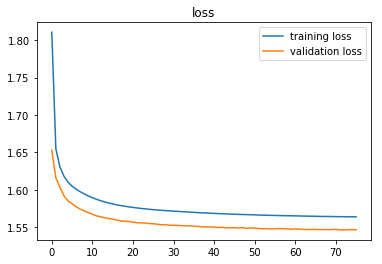

Plotting metrics...


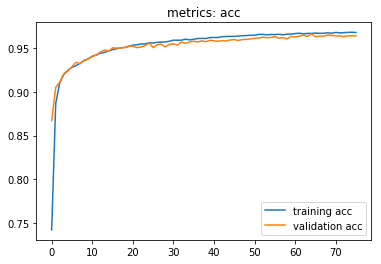

train {'acc': 0.9687818}
test {'acc': 0.9595}

{2: [{'acc': 0.9692}, {'acc': 0.9674}, {'acc': 0.9694}, {'acc': 0.9684}, {'acc': 0.9663}], 4: [{'acc': 0.9652}, {'acc': 0.9693}, {'acc': 0.9686}, {'acc': 0.9683}, {'acc': 0.9644}], 6: [{'acc': 0.9697}, {'acc': 0.9657}, {'acc': 0.9669}, {'acc': 0.9684}, {'acc': 0.9561}], 8: [{'acc': 0.9716}, {'acc': 0.9689}, {'acc': 0.9685}, {'acc': 0.965}, {'acc': 0.9605}], 10: [{'acc': 0.9637}, {'acc': 0.9663}, {'acc': 0.9672}, {'acc': 0.9682}, {'acc': 0.9595}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9692   
1            0.75           0.25            2                   1    0.9674   
2            0.50           0.50            2                   1    0.9694   
3            0.25           0.75            2                   1    0.9684   
4            0.00           1.00            2                   1    0.9663   
5            1.00           

In [14]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    set_rand_seed(0)
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [15]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9692}, {'acc': 0.9674}, {'acc': 0.9694}, {'acc': 0.9684}, {'acc': 0.9663}], 4: [{'acc': 0.9652}, {'acc': 0.9693}, {'acc': 0.9686}, {'acc': 0.9683}, {'acc': 0.9644}], 6: [{'acc': 0.9697}, {'acc': 0.9657}, {'acc': 0.9669}, {'acc': 0.9684}, {'acc': 0.9561}], 8: [{'acc': 0.9716}, {'acc': 0.9689}, {'acc': 0.9685}, {'acc': 0.965}, {'acc': 0.9605}], 10: [{'acc': 0.9637}, {'acc': 0.9663}, {'acc': 0.9672}, {'acc': 0.9682}, {'acc': 0.9595}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9692   
1            0.75           0.25            2                   1    0.9674   
2            0.50           0.50            2                   1    0.9694   
3            0.25           0.75            2                   1    0.9684   
4            0.00           1.00            2                   1    0.9663   
5            1.00           0.00            4                   1    0.9652

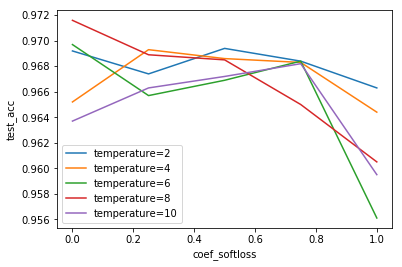

In [16]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

## Experiments on Students with $T^2$ Effect

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6600876434190628561
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 617509395932325857
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3158078 , acc = 0.15 
Epoch 1 , step 100 , loss= 0.67713416 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.3938364 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.41862184 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.17383836 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.31214616 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.19133191 val_loss= 0.2673263 , acc = 0.95 val acc = 0.9228 
Epoch 1 finished, loss= 0.57083476 val loss= 0.2673263 ,  acc = 0.84261817 val acc = 0.9228
val_acc improved. 
Epoch 2 , step 50 , loss= 0.30086908 , a

Epoch 17 , step 100 , loss= 0.053788643 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.07974507 , acc = 0.97 
Epoch 17 , step 300 , loss= 0.047757607 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.054887563 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.059386306 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.026467636 val_loss= 0.10155437 , acc = 1.0 val acc = 0.9712 
Epoch 17 finished, loss= 0.058951672 val loss= 0.10155437 ,  acc = 0.98421806 val acc = 0.9712
val_acc improved. 
Epoch 18 , step 50 , loss= 0.07330689 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.086029485 , acc = 0.97 
Epoch 18 , step 250 , loss= 0.028224403 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.12746984 , acc = 0.96 
Epoch 18 , step 450 , loss= 0.047167048 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.009310114 val_loss= 0.10093977 , acc = 1.0 val acc = 0.9728 
Epoch 18 finished, loss= 0.055551622 val loss= 0.10093977 ,  acc = 0.9849091 val acc = 0.9728
val_acc improved. 
Epoch 19 , step 0 , loss= 0.029782565 , acc = 1.0 
Epoch

Epoch 34 , step 150 , loss= 0.040301755 , acc = 0.99 
Epoch 34 , step 250 , loss= 0.004517794 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.005159382 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0056780935 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.017640322 val_loss= 0.12630364 , acc = 0.99 val acc = 0.9712 
Epoch 34 finished, loss= 0.022845615 val loss= 0.12630364 ,  acc = 0.99510896 val acc = 0.9712

Epoch 35 , step 0 , loss= 0.018127915 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.04985936 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.018631393 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.027430877 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.016925659 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.06793918 , acc = 0.98 
Epoch 35 , step 549 , loss= 0.027160212 val_loss= 0.13130681 , acc = 0.98 val acc = 0.9692 
Epoch 35 finished, loss= 0.01958951 val loss= 0.13130681 ,  acc = 0.99625444 val acc = 0.9692

Epoch 36 , step 50 , loss= 0.009929549 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.009580826 , a

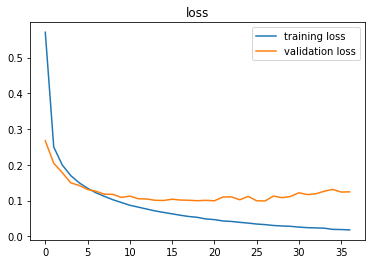

Plotting metrics...


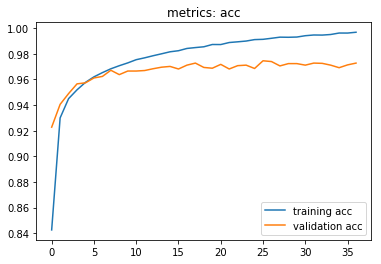

train {'acc': 0.99612725}
test {'acc': 0.9701}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17934937400281922365
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 501432793138264625
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.0182633 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.336449 , acc = 0.79 
Epoch 1 , step 200 , loss= 0.90159553 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.77480525 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.6082512 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.6530173 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.5796617 val_loss= 0.57498133 , acc = 0.95 val acc = 0.9314 
Epoch 1 finished, loss= 1.1549195 val loss= 0.57498133 ,  acc = 0.8440727 val acc = 0.9314
val_acc impr

Epoch 17 , step 200 , loss= 0.2582751 , acc = 0.98 
Epoch 17 , step 300 , loss= 0.18733896 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.3538347 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.19108866 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.45125404 val_loss= 0.33051726 , acc = 0.97 val acc = 0.9644 
Epoch 17 finished, loss= 0.2689677 val loss= 0.33051726 ,  acc = 0.98203635 val acc = 0.9644

Epoch 18 , step 50 , loss= 0.278542 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.27044147 , acc = 0.97 
Epoch 18 , step 250 , loss= 0.42673022 , acc = 0.96 
Epoch 18 , step 350 , loss= 0.25568765 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.4202695 , acc = 0.96 
Epoch 18 , step 549 , loss= 0.121536 val_loss= 0.33120874 , acc = 1.0 val acc = 0.9652 
Epoch 18 finished, loss= 0.2651498 val loss= 0.33120874 ,  acc = 0.9824181 val acc = 0.9652

Epoch 19 , step 0 , loss= 0.19346787 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.27723414 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.2931391 , acc = 0.99 
Epoch 1

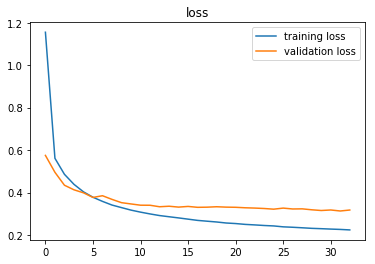

Plotting metrics...


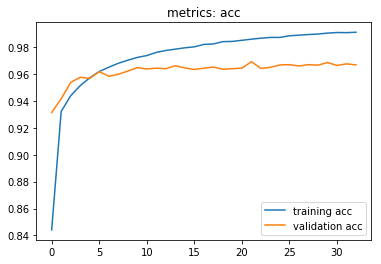

train {'acc': 0.99085456}
test {'acc': 0.9685}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 899883989800703480
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 10511883497178689105
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.7688026 , acc = 0.15 
Epoch 1 , step 100 , loss= 2.5249684 , acc = 0.67 
Epoch 1 , step 200 , loss= 1.2448474 , acc = 0.89 
Epoch 1 , step 300 , loss= 1.5370343 , acc = 0.84 
Epoch 1 , step 400 , loss= 1.2581843 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.82571685 , acc = 0.93 
Epoch 1 , step 549 , loss= 1.3013806 val_loss= 0.98263097 , acc = 0.9 val acc = 0.916 
Epoch 1 finished, loss= 1.805539 val loss= 0.98263097 ,  acc = 0.8213818 val acc = 0.916
val_acc improved. 

Epoch 17 , step 200 , loss= 0.38299662 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.5070584 , acc = 0.97 
Epoch 17 , step 400 , loss= 0.42496282 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.3841401 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.29821068 val_loss= 0.50311416 , acc = 0.99 val acc = 0.9686 
Epoch 17 finished, loss= 0.45007494 val loss= 0.50311416 ,  acc = 0.98114544 val acc = 0.9686
val_acc improved. 
Epoch 18 , step 50 , loss= 0.35032386 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.32024032 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.32751623 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.43299642 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.37908918 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.4188777 val_loss= 0.5027031 , acc = 0.99 val acc = 0.9672 
Epoch 18 finished, loss= 0.44550097 val loss= 0.5027031 ,  acc = 0.9817273 val acc = 0.9672

Epoch 19 , step 0 , loss= 0.49013117 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.38560015 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.36777362 

Epoch 34 , step 450 , loss= 0.3988071 , acc = 0.98 
Epoch 34 , step 549 , loss= 0.45741886 val_loss= 0.47996312 , acc = 1.0 val acc = 0.971 
Epoch 34 finished, loss= 0.3924714 val loss= 0.47996312 ,  acc = 0.9900728 val acc = 0.971

Epoch 35 , step 0 , loss= 0.3996318 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.35259643 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.35434994 , acc = 0.98 
Epoch 35 , step 300 , loss= 0.41093987 , acc = 0.98 
Epoch 35 , step 400 , loss= 0.4136504 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.3212367 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.3658001 val_loss= 0.484924 , acc = 1.0 val acc = 0.9708 
Epoch 35 finished, loss= 0.3920506 val loss= 0.484924 ,  acc = 0.9902 val acc = 0.9708

Epoch 36 , step 50 , loss= 0.3875552 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.35135138 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.3009923 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.3791678 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.34486485 , acc = 1.0 
Epoch 36 , step 549 , los

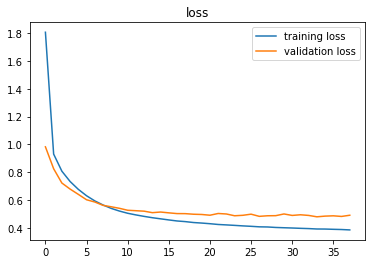

Plotting metrics...


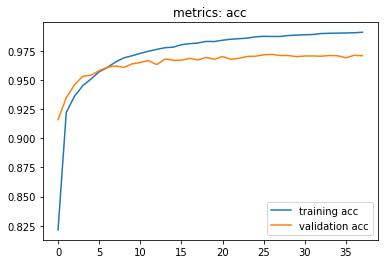

train {'acc': 0.9897091}
test {'acc': 0.9681}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6924403939523259547
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5736821986301493190
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7.4905777 , acc = 0.14 
Epoch 1 , step 100 , loss= 2.4749417 , acc = 0.83 
Epoch 1 , step 200 , loss= 1.70416 , acc = 0.87 
Epoch 1 , step 300 , loss= 1.3848852 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.6930412 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.3154562 , acc = 0.93 
Epoch 1 , step 549 , loss= 1.3402097 val_loss= 1.3090917 , acc = 0.91 val acc = 0.9142 
Epoch 1 finished, loss= 2.325854 val loss= 1.3090917 ,  acc = 0.8358546 val acc = 0.9142
val_acc improved. 
E

Epoch 17 , step 100 , loss= 0.49018502 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.58610004 , acc = 0.98 
Epoch 17 , step 300 , loss= 0.6563098 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.68281305 , acc = 0.96 
Epoch 17 , step 500 , loss= 0.5548354 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.76347756 val_loss= 0.7019814 , acc = 0.97 val acc = 0.9666 
Epoch 17 finished, loss= 0.6521612 val loss= 0.7019814 ,  acc = 0.9774545 val acc = 0.9666

Epoch 18 , step 50 , loss= 0.77750915 , acc = 0.95 
Epoch 18 , step 150 , loss= 0.51765144 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.6797898 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.5106854 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.6221751 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.73300713 val_loss= 0.6953451 , acc = 0.97 val acc = 0.9682 
Epoch 18 finished, loss= 0.6431056 val loss= 0.6953451 ,  acc = 0.97889096 val acc = 0.9682
val_acc improved. 
Epoch 19 , step 0 , loss= 0.83518416 , acc = 0.95 
Epoch 19 , step 100 , loss= 0.5799751 , acc

Epoch 34 , step 450 , loss= 0.38341886 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.45248622 val_loss= 0.669297 , acc = 1.0 val acc = 0.9694 
Epoch 34 finished, loss= 0.5770495 val loss= 0.669297 ,  acc = 0.98641825 val acc = 0.9694

Epoch 35 , step 0 , loss= 0.60380423 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.48761666 , acc = 0.97 
Epoch 35 , step 200 , loss= 0.47010064 , acc = 0.98 
Epoch 35 , step 300 , loss= 0.37158188 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.75345933 , acc = 0.96 
Epoch 35 , step 500 , loss= 0.72806966 , acc = 0.98 
Epoch 35 , step 549 , loss= 0.5023529 val_loss= 0.6683434 , acc = 0.99 val acc = 0.9696 
Epoch 35 finished, loss= 0.5743857 val loss= 0.6683434 ,  acc = 0.9866182 val acc = 0.9696

Epoch 36 , step 50 , loss= 0.4053327 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.8197834 , acc = 0.96 
Epoch 36 , step 250 , loss= 0.6702114 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.6154668 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.6873473 , acc = 0.99 
Epoch 36 , step

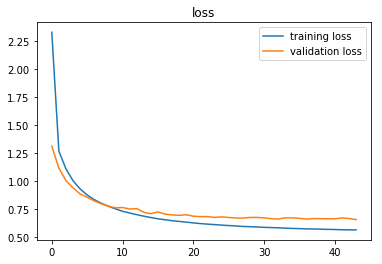

Plotting metrics...


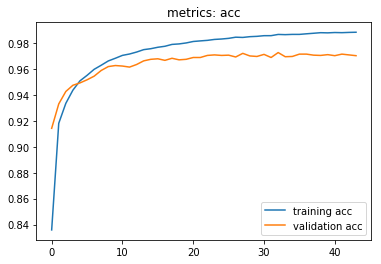

train {'acc': 0.9890182}
test {'acc': 0.9692}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14461758492259475957
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7097713434426107812
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9.227391 , acc = 0.15 
Epoch 1 , step 100 , loss= 3.4731336 , acc = 0.79 
Epoch 1 , step 200 , loss= 2.0712976 , acc = 0.88 
Epoch 1 , step 300 , loss= 1.6407878 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.5880344 , acc = 0.91 
Epoch 1 , step 500 , loss= 1.703997 , acc = 0.9 
Epoch 1 , step 549 , loss= 2.26144 val_loss= 1.5648369 , acc = 0.9 val acc = 0.9162 
Epoch 1 finished, loss= 2.9123518 val loss= 1.5648369 ,  acc = 0.8226363 val acc = 0.9162
val_acc improved. 
Epoch

Epoch 17 , step 200 , loss= 0.9068844 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.99731123 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.9120641 , acc = 0.95 
Epoch 17 , step 500 , loss= 0.5552042 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.7172843 val_loss= 0.89834905 , acc = 0.97 val acc = 0.97 
Epoch 17 finished, loss= 0.84872943 val loss= 0.89834905 ,  acc = 0.9758001 val acc = 0.97
val_acc improved. 
Epoch 18 , step 50 , loss= 0.40198246 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.94167405 , acc = 0.96 
Epoch 18 , step 250 , loss= 0.46027222 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.7328794 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.9640678 , acc = 0.95 
Epoch 18 , step 549 , loss= 0.6507479 val_loss= 0.8854084 , acc = 1.0 val acc = 0.9694 
Epoch 18 finished, loss= 0.8384885 val loss= 0.8854084 ,  acc = 0.97634554 val acc = 0.9694

Epoch 19 , step 0 , loss= 0.76664686 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.87541056 , acc = 0.97 
Epoch 19 , step 200 , loss= 0.66706085 , acc = 0

Epoch 35 , step 100 , loss= 0.99076235 , acc = 1.0 
Epoch 35 , step 200 , loss= 1.0589764 , acc = 0.96 
Epoch 35 , step 300 , loss= 0.7057159 , acc = 0.98 
Epoch 35 , step 400 , loss= 0.54257435 , acc = 0.98 
Epoch 35 , step 500 , loss= 0.6664604 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.80329376 val_loss= 0.85708076 , acc = 1.0 val acc = 0.9702 
Epoch 35 finished, loss= 0.75269353 val loss= 0.85708076 ,  acc = 0.98379993 val acc = 0.9702

Epoch 36 , step 50 , loss= 0.8230277 , acc = 0.97 
Epoch 36 , step 150 , loss= 0.53283256 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.812019 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.9421897 , acc = 0.99 
Epoch 36 , step 450 , loss= 0.42826363 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.90341914 val_loss= 0.86369246 , acc = 0.96 val acc = 0.9676 
Epoch 36 finished, loss= 0.749398 val loss= 0.86369246 ,  acc = 0.98432726 val acc = 0.9676

Epoch 37 , step 0 , loss= 0.53123873 , acc = 0.99 
Epoch 37 , step 100 , loss= 0.8641212 , acc = 0.96 
Epoch 37

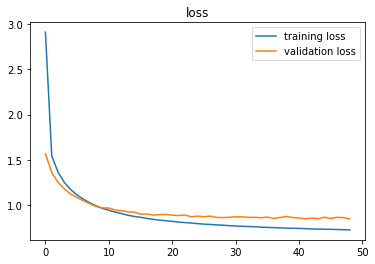

Plotting metrics...


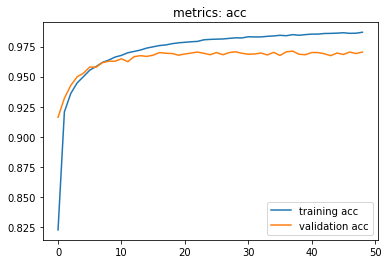

train {'acc': 0.9867455}
test {'acc': 0.9686}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9983830530334777478
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6958439151481706490
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.312703 , acc = 0.18 
Epoch 1 , step 100 , loss= 0.69188356 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.45501888 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.2947602 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.37623185 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.31986853 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.15566808 val_loss= 0.27715248 , acc = 0.95 val acc = 0.9198 
Epoch 1 finished, loss= 0.5741414 val loss= 0.27715248 ,  acc = 0.8426545 val acc = 0.9198
val_acc impro

Epoch 17 , step 100 , loss= 0.022678105 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.014195681 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.051351137 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.013523116 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.067683645 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.03046367 val_loss= 0.101174645 , acc = 1.0 val acc = 0.9706 
Epoch 17 finished, loss= 0.059854273 val loss= 0.101174645 ,  acc = 0.9841637 val acc = 0.9706

Epoch 18 , step 50 , loss= 0.047005825 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.033822406 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.016788706 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.046627793 , acc = 0.98 
Epoch 18 , step 450 , loss= 0.048196107 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.057896614 val_loss= 0.106486715 , acc = 0.99 val acc = 0.9688 
Epoch 18 finished, loss= 0.057557825 val loss= 0.106486715 ,  acc = 0.9842364 val acc = 0.9688

Epoch 19 , step 0 , loss= 0.037628204 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.07180878 

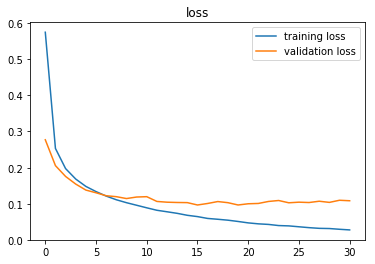

Plotting metrics...


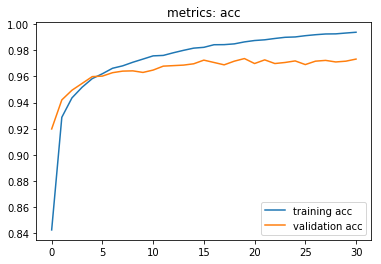

train {'acc': 0.9937636}
test {'acc': 0.9694}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12914902941286964750
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 12831286193676396101
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 10.953426 , acc = 0.1 
Epoch 1 , step 100 , loss= 5.7712393 , acc = 0.77 
Epoch 1 , step 200 , loss= 4.530484 , acc = 0.88 
Epoch 1 , step 300 , loss= 4.3694935 , acc = 0.83 
Epoch 1 , step 400 , loss= 3.6268442 , acc = 0.93 
Epoch 1 , step 500 , loss= 3.3758323 , acc = 0.87 
Epoch 1 , step 549 , loss= 3.6716347 val_loss= 3.3616147 , acc = 0.84 val acc = 0.9124 
Epoch 1 finished, loss= 4.889473 val loss= 3.3616147 ,  acc = 0.8134182 val acc = 0.9124
val_acc improved

Epoch 17 , step 300 , loss= 2.3978791 , acc = 0.99 
Epoch 17 , step 400 , loss= 2.2946835 , acc = 0.98 
Epoch 17 , step 500 , loss= 3.0853724 , acc = 0.93 
Epoch 17 , step 549 , loss= 3.1979039 val_loss= 2.4941618 , acc = 0.98 val acc = 0.9648 
Epoch 17 finished, loss= 2.5208976 val loss= 2.4941618 ,  acc = 0.9709819 val acc = 0.9648
val_acc improved. 
Epoch 18 , step 50 , loss= 2.6469028 , acc = 0.96 
Epoch 18 , step 150 , loss= 2.5586042 , acc = 0.99 
Epoch 18 , step 250 , loss= 2.664713 , acc = 0.97 
Epoch 18 , step 350 , loss= 2.3208938 , acc = 0.97 
Epoch 18 , step 450 , loss= 2.245273 , acc = 0.98 
Epoch 18 , step 549 , loss= 2.3611891 val_loss= 2.4867535 , acc = 0.97 val acc = 0.9634 
Epoch 18 finished, loss= 2.5061796 val loss= 2.4867535 ,  acc = 0.9724363 val acc = 0.9634

Epoch 19 , step 0 , loss= 2.2622085 , acc = 0.99 
Epoch 19 , step 100 , loss= 2.484694 , acc = 0.96 
Epoch 19 , step 200 , loss= 2.4406478 , acc = 0.98 
Epoch 19 , step 300 , loss= 2.9360173 , acc = 0.94 
Ep

Epoch 35 , step 100 , loss= 2.3810303 , acc = 0.98 
Epoch 35 , step 200 , loss= 2.5028102 , acc = 0.99 
Epoch 35 , step 300 , loss= 2.274224 , acc = 1.0 
Epoch 35 , step 400 , loss= 2.7858384 , acc = 0.93 
Epoch 35 , step 500 , loss= 2.4882386 , acc = 0.97 
Epoch 35 , step 549 , loss= 3.1017082 val_loss= 2.4089327 , acc = 1.0 val acc = 0.9668 
Epoch 35 finished, loss= 2.379175 val loss= 2.4089327 ,  acc = 0.9827273 val acc = 0.9668

Epoch 36 , step 50 , loss= 2.7577443 , acc = 0.98 
Epoch 36 , step 150 , loss= 1.9149374 , acc = 0.99 
Epoch 36 , step 250 , loss= 2.3005471 , acc = 0.96 
Epoch 36 , step 350 , loss= 2.6854339 , acc = 0.98 
Epoch 36 , step 450 , loss= 2.3044033 , acc = 1.0 
Epoch 36 , step 549 , loss= 2.4074564 val_loss= 2.4094257 , acc = 0.98 val acc = 0.9686 
Epoch 36 finished, loss= 2.375142 val loss= 2.4094257 ,  acc = 0.9835455 val acc = 0.9686
val_acc improved. 
Epoch 37 , step 0 , loss= 2.4426959 , acc = 0.97 
Epoch 37 , step 100 , loss= 3.0329916 , acc = 1.0 
Epoch 

Epoch 53 , step 100 , loss= 2.521985 , acc = 1.0 
Epoch 53 , step 200 , loss= 2.0845222 , acc = 0.98 
Epoch 53 , step 300 , loss= 2.0753498 , acc = 0.96 
Epoch 53 , step 400 , loss= 2.6459367 , acc = 0.99 
Epoch 53 , step 500 , loss= 2.6399448 , acc = 0.98 
Epoch 53 , step 549 , loss= 2.4890258 val_loss= 2.3848517 , acc = 0.97 val acc = 0.9662 
Epoch 53 finished, loss= 2.3249958 val loss= 2.3848517 ,  acc = 0.98756367 val acc = 0.9662

Epoch 54 , step 50 , loss= 2.2317235 , acc = 0.99 
Epoch 54 , step 150 , loss= 2.4508224 , acc = 1.0 
Epoch 54 , step 250 , loss= 2.3617835 , acc = 0.97 
Epoch 54 , step 350 , loss= 2.368938 , acc = 0.98 
Epoch 54 , step 450 , loss= 2.2305245 , acc = 0.98 
Epoch 54 , step 549 , loss= 2.4494789 val_loss= 2.375323 , acc = 1.0 val acc = 0.9674 
Epoch 54 finished, loss= 2.3227534 val loss= 2.375323 ,  acc = 0.98769087 val acc = 0.9674

Epoch 55 , step 0 , loss= 2.4659798 , acc = 0.98 
Epoch 55 , step 100 , loss= 2.8006372 , acc = 0.96 
Epoch 55 , step 200 , 

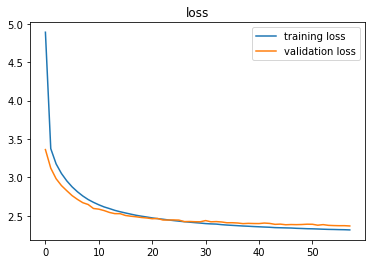

Plotting metrics...


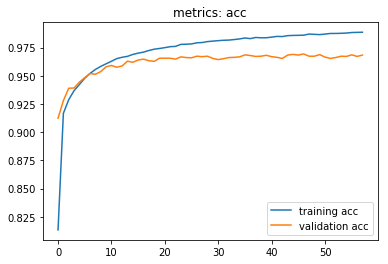

train {'acc': 0.9886182}
test {'acc': 0.9677}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17023641521574232092
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15196483881878884326
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 19.62921 , acc = 0.22 
Epoch 1 , step 100 , loss= 10.532837 , acc = 0.79 
Epoch 1 , step 200 , loss= 8.044345 , acc = 0.8 
Epoch 1 , step 300 , loss= 7.594405 , acc = 0.85 
Epoch 1 , step 400 , loss= 6.14446 , acc = 0.91 
Epoch 1 , step 500 , loss= 6.0671167 , acc = 0.91 
Epoch 1 , step 549 , loss= 5.7248406 val_loss= 6.3396316 , acc = 0.93 val acc = 0.9098 
Epoch 1 finished, loss= 8.935639 val loss= 6.3396316 ,  acc = 0.8091818 val acc = 0.9098
val_acc improved. 
Epo

Epoch 17 , step 300 , loss= 5.83057 , acc = 0.93 
Epoch 17 , step 400 , loss= 5.902571 , acc = 0.97 
Epoch 17 , step 500 , loss= 5.092946 , acc = 0.96 
Epoch 17 , step 549 , loss= 4.9390073 val_loss= 4.7211103 , acc = 0.97 val acc = 0.963 
Epoch 17 finished, loss= 4.798828 val loss= 4.7211103 ,  acc = 0.9705454 val acc = 0.963

Epoch 18 , step 50 , loss= 5.2634106 , acc = 0.93 
Epoch 18 , step 150 , loss= 4.129412 , acc = 0.98 
Epoch 18 , step 250 , loss= 4.508375 , acc = 0.99 
Epoch 18 , step 350 , loss= 4.0322385 , acc = 0.99 
Epoch 18 , step 450 , loss= 4.2230635 , acc = 0.99 
Epoch 18 , step 549 , loss= 4.3127775 val_loss= 4.7064524 , acc = 0.95 val acc = 0.9638 
Epoch 18 finished, loss= 4.7785273 val loss= 4.7064524 ,  acc = 0.9716 val acc = 0.9638

Epoch 19 , step 0 , loss= 4.5902805 , acc = 1.0 
Epoch 19 , step 100 , loss= 4.7396464 , acc = 0.98 
Epoch 19 , step 200 , loss= 4.9735923 , acc = 0.99 
Epoch 19 , step 300 , loss= 4.3964977 , acc = 0.97 
Epoch 19 , step 400 , loss= 4.

Epoch 35 , step 100 , loss= 4.473506 , acc = 0.99 
Epoch 35 , step 200 , loss= 5.124668 , acc = 0.97 
Epoch 35 , step 300 , loss= 4.541368 , acc = 0.99 
Epoch 35 , step 400 , loss= 4.7008843 , acc = 1.0 
Epoch 35 , step 500 , loss= 4.001581 , acc = 0.99 
Epoch 35 , step 549 , loss= 4.9720197 val_loss= 4.60864 , acc = 0.99 val acc = 0.9678 
Epoch 35 finished, loss= 4.6314583 val loss= 4.60864 ,  acc = 0.9802 val acc = 0.9678

Epoch 36 , step 50 , loss= 4.776315 , acc = 1.0 
Epoch 36 , step 150 , loss= 4.807066 , acc = 0.96 
Epoch 36 , step 250 , loss= 5.0758023 , acc = 0.95 
Epoch 36 , step 350 , loss= 4.74182 , acc = 0.98 
Epoch 36 , step 450 , loss= 4.8184094 , acc = 1.0 
Epoch 36 , step 549 , loss= 4.4306564 val_loss= 4.592902 , acc = 0.96 val acc = 0.9688 
Epoch 36 finished, loss= 4.6253257 val loss= 4.592902 ,  acc = 0.98023635 val acc = 0.9688

Epoch 37 , step 0 , loss= 4.501166 , acc = 0.98 
Epoch 37 , step 100 , loss= 4.2244534 , acc = 0.99 
Epoch 37 , step 200 , loss= 4.9487386

Epoch 53 , step 100 , loss= 5.1996417 , acc = 0.96 
Epoch 53 , step 200 , loss= 4.9913874 , acc = 0.99 
Epoch 53 , step 300 , loss= 3.6204863 , acc = 1.0 
Epoch 53 , step 400 , loss= 4.7487183 , acc = 0.98 
Epoch 53 , step 500 , loss= 5.100679 , acc = 0.95 
Epoch 53 , step 549 , loss= 4.446388 val_loss= 4.5725603 , acc = 0.98 val acc = 0.9682 
Epoch 53 finished, loss= 4.570779 val loss= 4.5725603 ,  acc = 0.983491 val acc = 0.9682

Epoch 54 , step 50 , loss= 4.5765696 , acc = 0.99 
Epoch 54 , step 150 , loss= 4.0941024 , acc = 1.0 
Epoch 54 , step 250 , loss= 4.51609 , acc = 0.99 
Epoch 54 , step 350 , loss= 4.6886806 , acc = 0.98 
Epoch 54 , step 450 , loss= 4.161771 , acc = 0.96 
Epoch 54 , step 549 , loss= 4.705545 val_loss= 4.5838103 , acc = 0.99 val acc = 0.9692 
Epoch 54 finished, loss= 4.5693316 val loss= 4.5838103 ,  acc = 0.98370904 val acc = 0.9692

Epoch 55 , step 0 , loss= 4.917345 , acc = 0.98 
Epoch 55 , step 100 , loss= 4.3392344 , acc = 0.99 
Epoch 55 , step 200 , loss=

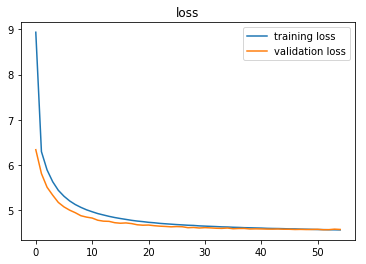

Plotting metrics...


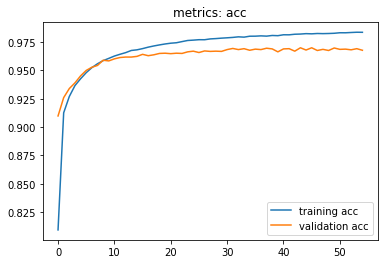

train {'acc': 0.9838727}
test {'acc': 0.9696}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4178242433958389319
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15047121977812995326
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 28.241205 , acc = 0.12 
Epoch 1 , step 100 , loss= 15.538787 , acc = 0.79 
Epoch 1 , step 200 , loss= 12.405114 , acc = 0.83 
Epoch 1 , step 300 , loss= 8.483083 , acc = 0.92 
Epoch 1 , step 400 , loss= 10.038436 , acc = 0.88 
Epoch 1 , step 500 , loss= 8.477887 , acc = 0.93 
Epoch 1 , step 549 , loss= 12.43792 val_loss= 9.536032 , acc = 0.87 val acc = 0.897 
Epoch 1 finished, loss= 13.32603 val loss= 9.536032 ,  acc = 0.7890727 val acc = 0.897
val_acc improved. 
Epo

Epoch 17 , step 400 , loss= 7.854059 , acc = 0.94 
Epoch 17 , step 500 , loss= 6.4534984 , acc = 0.96 
Epoch 17 , step 549 , loss= 7.876147 val_loss= 7.125747 , acc = 0.97 val acc = 0.958 
Epoch 17 finished, loss= 7.3323927 val loss= 7.125747 ,  acc = 0.9630364 val acc = 0.958

Epoch 18 , step 50 , loss= 8.0218 , acc = 0.96 
Epoch 18 , step 150 , loss= 7.8765955 , acc = 0.95 
Epoch 18 , step 250 , loss= 7.358702 , acc = 0.99 
Epoch 18 , step 350 , loss= 7.849375 , acc = 0.96 
Epoch 18 , step 450 , loss= 8.368029 , acc = 0.95 
Epoch 18 , step 549 , loss= 6.8962836 val_loss= 7.098859 , acc = 0.97 val acc = 0.9582 
Epoch 18 finished, loss= 7.2891665 val loss= 7.098859 ,  acc = 0.9639273 val acc = 0.9582
val_acc improved. 
Epoch 19 , step 0 , loss= 6.3411813 , acc = 0.96 
Epoch 19 , step 100 , loss= 7.172669 , acc = 0.97 
Epoch 19 , step 200 , loss= 9.682298 , acc = 0.93 
Epoch 19 , step 300 , loss= 6.99786 , acc = 0.93 
Epoch 19 , step 400 , loss= 6.9291005 , acc = 0.99 
Epoch 19 , step 5

Epoch 35 , step 100 , loss= 7.354541 , acc = 0.97 
Epoch 35 , step 200 , loss= 7.2453666 , acc = 0.99 
Epoch 35 , step 300 , loss= 6.118152 , acc = 0.97 
Epoch 35 , step 400 , loss= 7.593069 , acc = 0.98 
Epoch 35 , step 500 , loss= 7.174657 , acc = 0.97 
Epoch 35 , step 549 , loss= 7.430309 val_loss= 6.8547497 , acc = 0.98 val acc = 0.9654 
Epoch 35 finished, loss= 6.9590263 val loss= 6.8547497 ,  acc = 0.9750182 val acc = 0.9654

Epoch 36 , step 50 , loss= 6.2811065 , acc = 0.99 
Epoch 36 , step 150 , loss= 6.1422 , acc = 0.98 
Epoch 36 , step 250 , loss= 6.8731637 , acc = 0.96 
Epoch 36 , step 350 , loss= 7.1182294 , acc = 0.97 
Epoch 36 , step 450 , loss= 5.8136115 , acc = 0.98 
Epoch 36 , step 549 , loss= 6.929289 val_loss= 6.837745 , acc = 0.99 val acc = 0.9668 
Epoch 36 finished, loss= 6.948645 val loss= 6.837745 ,  acc = 0.9758182 val acc = 0.9668
val_acc improved. 
Epoch 37 , step 0 , loss= 6.2780514 , acc = 0.99 
Epoch 37 , step 100 , loss= 6.955579 , acc = 0.97 
Epoch 37 , s

Epoch 53 , step 100 , loss= 5.795797 , acc = 0.98 
Epoch 53 , step 200 , loss= 6.410841 , acc = 0.99 
Epoch 53 , step 300 , loss= 6.395285 , acc = 1.0 
Epoch 53 , step 400 , loss= 6.439681 , acc = 0.97 
Epoch 53 , step 500 , loss= 6.8623977 , acc = 0.97 
Epoch 53 , step 549 , loss= 6.0925455 val_loss= 6.773718 , acc = 0.99 val acc = 0.9698 
Epoch 53 finished, loss= 6.835604 val loss= 6.773718 ,  acc = 0.97961825 val acc = 0.9698
val_acc improved. 
Epoch 54 , step 50 , loss= 6.782354 , acc = 0.98 
Epoch 54 , step 150 , loss= 7.4261303 , acc = 0.99 
Epoch 54 , step 250 , loss= 6.578425 , acc = 0.99 
Epoch 54 , step 350 , loss= 7.2733574 , acc = 0.99 
Epoch 54 , step 450 , loss= 7.143285 , acc = 0.98 
Epoch 54 , step 549 , loss= 6.489323 val_loss= 6.7917366 , acc = 0.96 val acc = 0.9676 
Epoch 54 finished, loss= 6.832886 val loss= 6.7917366 ,  acc = 0.97980005 val acc = 0.9676

Epoch 55 , step 0 , loss= 6.36909 , acc = 0.98 
Epoch 55 , step 100 , loss= 7.3195696 , acc = 1.0 
Epoch 55 , st

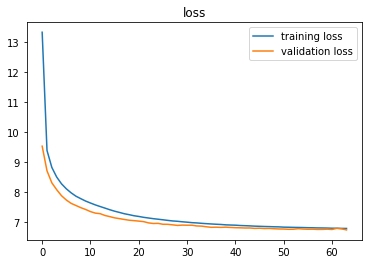

Plotting metrics...


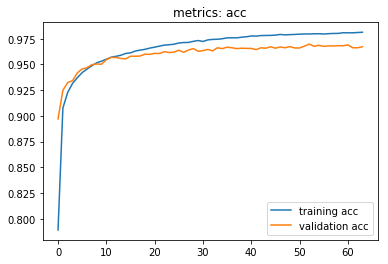

train {'acc': 0.98127276}
test {'acc': 0.9658}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11656296674566617649
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 17905991189239918395
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 36.78686 , acc = 0.15 
Epoch 1 , step 100 , loss= 19.143345 , acc = 0.74 
Epoch 1 , step 200 , loss= 14.892095 , acc = 0.81 
Epoch 1 , step 300 , loss= 13.645367 , acc = 0.88 
Epoch 1 , step 400 , loss= 17.259357 , acc = 0.86 
Epoch 1 , step 500 , loss= 13.586018 , acc = 0.89 
Epoch 1 , step 549 , loss= 11.394212 val_loss= 12.258052 , acc = 0.91 val acc = 0.9058 
Epoch 1 finished, loss= 17.086468 val loss= 12.258052 ,  acc = 0.80054545 val acc = 0.9058
val_acc improv

Epoch 17 , step 400 , loss= 9.168093 , acc = 0.97 
Epoch 17 , step 500 , loss= 8.707629 , acc = 0.97 
Epoch 17 , step 549 , loss= 10.406547 val_loss= 9.231873 , acc = 0.93 val acc = 0.9604 
Epoch 17 finished, loss= 9.460699 val loss= 9.231873 ,  acc = 0.96610904 val acc = 0.9604

Epoch 18 , step 50 , loss= 9.599475 , acc = 0.94 
Epoch 18 , step 150 , loss= 9.791208 , acc = 0.96 
Epoch 18 , step 250 , loss= 8.884122 , acc = 1.0 
Epoch 18 , step 350 , loss= 10.264385 , acc = 0.99 
Epoch 18 , step 450 , loss= 9.347193 , acc = 0.99 
Epoch 18 , step 549 , loss= 8.4331875 val_loss= 9.212068 , acc = 0.97 val acc = 0.9612 
Epoch 18 finished, loss= 9.427937 val loss= 9.212068 ,  acc = 0.96703637 val acc = 0.9612

Epoch 19 , step 0 , loss= 9.228879 , acc = 0.95 
Epoch 19 , step 100 , loss= 8.404255 , acc = 0.98 
Epoch 19 , step 200 , loss= 9.453734 , acc = 0.95 
Epoch 19 , step 300 , loss= 9.000296 , acc = 0.98 
Epoch 19 , step 400 , loss= 9.55866 , acc = 0.99 
Epoch 19 , step 500 , loss= 9.4741

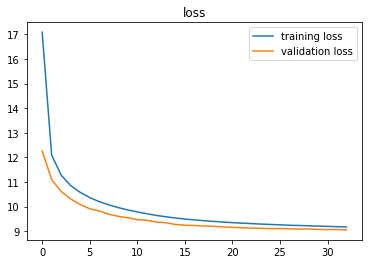

Plotting metrics...


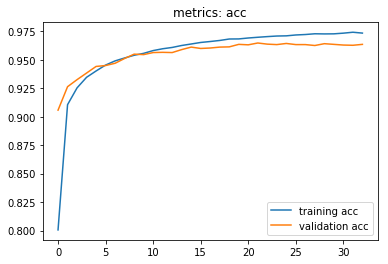

train {'acc': 0.97443634}
test {'acc': 0.9634}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5218219621886704693
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3531769316485365797
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2783935 , acc = 0.18 
Epoch 1 , step 100 , loss= 0.6659948 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.40863335 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.3240716 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.39225724 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.3157966 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.20387396 val_loss= 0.2642234 , acc = 0.94 val acc = 0.9242 
Epoch 1 finished, loss= 0.56529653 val loss= 0.2642234 ,  acc = 0.8404545 val acc = 0.9242
val_acc impro

Epoch 17 , step 100 , loss= 0.049895316 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.046863917 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.031070255 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.100459136 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.080203295 , acc = 0.97 
Epoch 17 , step 549 , loss= 0.11951311 val_loss= 0.11107156 , acc = 0.97 val acc = 0.9664 
Epoch 17 finished, loss= 0.061561752 val loss= 0.11107156 ,  acc = 0.9840181 val acc = 0.9664

Epoch 18 , step 50 , loss= 0.13655263 , acc = 0.95 
Epoch 18 , step 150 , loss= 0.023331985 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.08510215 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.045253873 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.09805035 , acc = 0.96 
Epoch 18 , step 549 , loss= 0.014948725 val_loss= 0.11384315 , acc = 1.0 val acc = 0.9682 
Epoch 18 finished, loss= 0.05635857 val loss= 0.11384315 ,  acc = 0.98527277 val acc = 0.9682

Epoch 19 , step 0 , loss= 0.03086539 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.048594147 , 

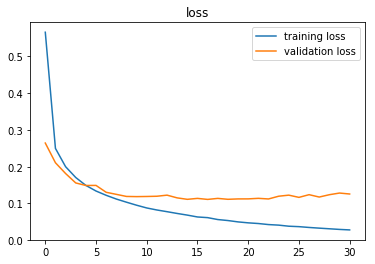

Plotting metrics...


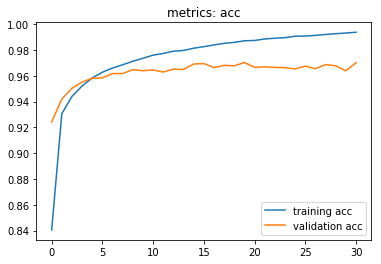

train {'acc': 0.9940364}
test {'acc': 0.9667}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7234278677045647082
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 18383613443636322185
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 22.45007 , acc = 0.11 
Epoch 1 , step 100 , loss= 15.799137 , acc = 0.69 
Epoch 1 , step 200 , loss= 13.276871 , acc = 0.8 
Epoch 1 , step 300 , loss= 10.251027 , acc = 0.9 
Epoch 1 , step 400 , loss= 10.364285 , acc = 0.91 
Epoch 1 , step 500 , loss= 10.864916 , acc = 0.92 
Epoch 1 , step 549 , loss= 11.283571 val_loss= 10.656057 , acc = 0.86 val acc = 0.8992 
Epoch 1 finished, loss= 13.332619 val loss= 10.656057 ,  acc = 0.7957818 val acc = 0.8992
val_acc improved.

Epoch 17 , step 400 , loss= 9.360907 , acc = 0.99 
Epoch 17 , step 500 , loss= 9.619314 , acc = 0.97 
Epoch 17 , step 549 , loss= 8.965422 val_loss= 8.883828 , acc = 0.96 val acc = 0.9622 
Epoch 17 finished, loss= 9.117006 val loss= 8.883828 ,  acc = 0.96876365 val acc = 0.9622

Epoch 18 , step 50 , loss= 9.763596 , acc = 0.96 
Epoch 18 , step 150 , loss= 8.278631 , acc = 0.98 
Epoch 18 , step 250 , loss= 8.2046 , acc = 0.99 
Epoch 18 , step 350 , loss= 9.673445 , acc = 0.96 
Epoch 18 , step 450 , loss= 9.767058 , acc = 0.96 
Epoch 18 , step 549 , loss= 9.5190115 val_loss= 8.902127 , acc = 0.99 val acc = 0.9596 
Epoch 18 finished, loss= 9.097786 val loss= 8.902127 ,  acc = 0.96963644 val acc = 0.9596

Epoch 19 , step 0 , loss= 9.449957 , acc = 0.95 
Epoch 19 , step 100 , loss= 9.085254 , acc = 0.94 
Epoch 19 , step 200 , loss= 9.329089 , acc = 0.97 
Epoch 19 , step 300 , loss= 8.593411 , acc = 0.99 
Epoch 19 , step 400 , loss= 8.724839 , acc = 0.99 
Epoch 19 , step 500 , loss= 7.858398

Epoch 35 , step 300 , loss= 8.827352 , acc = 0.99 
Epoch 35 , step 400 , loss= 8.553655 , acc = 1.0 
Epoch 35 , step 500 , loss= 8.717085 , acc = 0.98 
Epoch 35 , step 549 , loss= 8.819948 val_loss= 8.778233 , acc = 0.99 val acc = 0.9662 
Epoch 35 finished, loss= 8.94279 val loss= 8.778233 ,  acc = 0.9781454 val acc = 0.9662

Epoch 36 , step 50 , loss= 9.911272 , acc = 0.94 
Epoch 36 , step 150 , loss= 7.6746655 , acc = 0.98 
Epoch 36 , step 250 , loss= 8.792375 , acc = 0.99 
Epoch 36 , step 350 , loss= 9.095634 , acc = 0.98 
Epoch 36 , step 450 , loss= 8.479118 , acc = 0.98 
Epoch 36 , step 549 , loss= 8.7966795 val_loss= 8.780566 , acc = 0.98 val acc = 0.9648 
Epoch 36 finished, loss= 8.936861 val loss= 8.780566 ,  acc = 0.9796001 val acc = 0.9648

Epoch 37 , step 0 , loss= 9.825218 , acc = 0.96 
Epoch 37 , step 100 , loss= 9.190093 , acc = 0.98 
Epoch 37 , step 200 , loss= 8.807985 , acc = 0.99 
Epoch 37 , step 300 , loss= 9.335932 , acc = 0.97 
Epoch 37 , step 400 , loss= 9.33861 ,

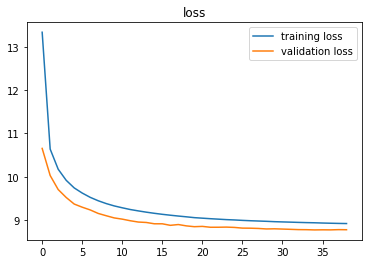

Plotting metrics...


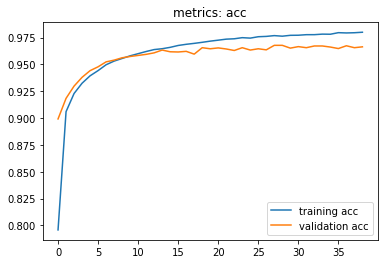

train {'acc': 0.9793818}
test {'acc': 0.9622}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4928430737282508974
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 10596137590079777686
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 42.51529 , acc = 0.16 
Epoch 1 , step 100 , loss= 28.499125 , acc = 0.67 
Epoch 1 , step 200 , loss= 23.441463 , acc = 0.83 
Epoch 1 , step 300 , loss= 22.016447 , acc = 0.88 
Epoch 1 , step 400 , loss= 20.048534 , acc = 0.89 
Epoch 1 , step 500 , loss= 22.230892 , acc = 0.92 
Epoch 1 , step 549 , loss= 21.451075 val_loss= 20.47677 , acc = 0.9 val acc = 0.8944 
Epoch 1 finished, loss= 25.321522 val loss= 20.47677 ,  acc = 0.79783636 val acc = 0.8944
val_acc improved. 


Epoch 17 , step 300 , loss= 18.291508 , acc = 0.95 
Epoch 17 , step 400 , loss= 21.166847 , acc = 0.87 
Epoch 17 , step 500 , loss= 17.670332 , acc = 0.97 
Epoch 17 , step 549 , loss= 17.953238 val_loss= 17.663721 , acc = 0.97 val acc = 0.956 
Epoch 17 finished, loss= 18.137297 val loss= 17.663721 ,  acc = 0.9611273 val acc = 0.956

Epoch 18 , step 50 , loss= 17.288294 , acc = 0.96 
Epoch 18 , step 150 , loss= 19.687172 , acc = 0.98 
Epoch 18 , step 250 , loss= 18.028067 , acc = 0.96 
Epoch 18 , step 350 , loss= 18.616508 , acc = 0.93 
Epoch 18 , step 450 , loss= 16.32706 , acc = 0.97 
Epoch 18 , step 549 , loss= 19.682306 val_loss= 17.647755 , acc = 0.97 val acc = 0.9584 
Epoch 18 finished, loss= 18.10439 val loss= 17.647755 ,  acc = 0.9624182 val acc = 0.9584

Epoch 19 , step 0 , loss= 17.21875 , acc = 0.94 
Epoch 19 , step 100 , loss= 15.75215 , acc = 0.98 
Epoch 19 , step 200 , loss= 18.157257 , acc = 0.93 
Epoch 19 , step 300 , loss= 17.442509 , acc = 0.96 
Epoch 19 , step 400 , l

Epoch 35 , step 100 , loss= 16.948586 , acc = 0.98 
Epoch 35 , step 200 , loss= 19.783072 , acc = 0.96 
Epoch 35 , step 300 , loss= 16.376438 , acc = 0.98 
Epoch 35 , step 400 , loss= 16.773487 , acc = 0.98 
Epoch 35 , step 500 , loss= 17.649382 , acc = 0.96 
Epoch 35 , step 549 , loss= 17.16893 val_loss= 17.454493 , acc = 0.97 val acc = 0.9654 
Epoch 35 finished, loss= 17.826584 val loss= 17.454493 ,  acc = 0.9700546 val acc = 0.9654

Epoch 36 , step 50 , loss= 18.185858 , acc = 0.97 
Epoch 36 , step 150 , loss= 18.028202 , acc = 0.99 
Epoch 36 , step 250 , loss= 18.12191 , acc = 0.94 
Epoch 36 , step 350 , loss= 16.772861 , acc = 1.0 
Epoch 36 , step 450 , loss= 16.100925 , acc = 0.97 
Epoch 36 , step 549 , loss= 17.907892 val_loss= 17.458511 , acc = 0.98 val acc = 0.9636 
Epoch 36 finished, loss= 17.81411 val loss= 17.458511 ,  acc = 0.97067285 val acc = 0.9636

Epoch 37 , step 0 , loss= 16.865763 , acc = 0.95 
Epoch 37 , step 100 , loss= 17.29589 , acc = 0.98 
Epoch 37 , step 200 ,

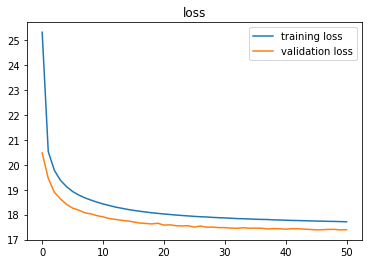

Plotting metrics...


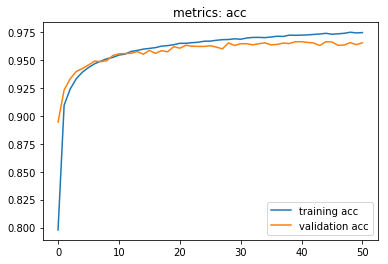

train {'acc': 0.97505456}
test {'acc': 0.9625}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13128559184512604953
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9625382491106509466
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 62.75667 , acc = 0.08 
Epoch 1 , step 100 , loss= 44.071404 , acc = 0.7 
Epoch 1 , step 200 , loss= 36.417175 , acc = 0.81 
Epoch 1 , step 300 , loss= 33.867134 , acc = 0.85 
Epoch 1 , step 400 , loss= 32.038036 , acc = 0.86 
Epoch 1 , step 500 , loss= 32.317806 , acc = 0.88 
Epoch 1 , step 549 , loss= 31.833683 val_loss= 30.634777 , acc = 0.89 val acc = 0.8952 
Epoch 1 finished, loss= 37.77652 val loss= 30.634777 ,  acc = 0.7982 val acc = 0.8952
val_acc improved. 


Epoch 17 , step 300 , loss= 27.17751 , acc = 0.98 
Epoch 17 , step 400 , loss= 28.257835 , acc = 0.93 
Epoch 17 , step 500 , loss= 28.069092 , acc = 0.96 
Epoch 17 , step 549 , loss= 32.015774 val_loss= 26.267984 , acc = 0.97 val acc = 0.9602 
Epoch 17 finished, loss= 26.976349 val loss= 26.267984 ,  acc = 0.96199995 val acc = 0.9602
val_acc improved. 
Epoch 18 , step 50 , loss= 23.643053 , acc = 0.95 
Epoch 18 , step 150 , loss= 28.99424 , acc = 0.95 
Epoch 18 , step 250 , loss= 27.725819 , acc = 0.95 
Epoch 18 , step 350 , loss= 27.420153 , acc = 0.98 
Epoch 18 , step 450 , loss= 25.61855 , acc = 0.99 
Epoch 18 , step 549 , loss= 25.123787 val_loss= 26.234207 , acc = 0.94 val acc = 0.9612 
Epoch 18 finished, loss= 26.931736 val loss= 26.234207 ,  acc = 0.96314543 val acc = 0.9612
val_acc improved. 
Epoch 19 , step 0 , loss= 27.573904 , acc = 0.97 
Epoch 19 , step 100 , loss= 29.320663 , acc = 0.97 
Epoch 19 , step 200 , loss= 27.939539 , acc = 0.96 
Epoch 19 , step 300 , loss= 28.059

Epoch 35 , step 100 , loss= 25.7378 , acc = 0.99 
Epoch 35 , step 200 , loss= 25.156315 , acc = 0.96 
Epoch 35 , step 300 , loss= 24.99145 , acc = 0.98 
Epoch 35 , step 400 , loss= 27.057852 , acc = 0.96 
Epoch 35 , step 500 , loss= 29.323498 , acc = 0.95 
Epoch 35 , step 549 , loss= 25.290817 val_loss= 25.972242 , acc = 0.98 val acc = 0.9656 
Epoch 35 finished, loss= 26.560225 val loss= 25.972242 ,  acc = 0.97114545 val acc = 0.9656

Epoch 36 , step 50 , loss= 26.984097 , acc = 0.99 
Epoch 36 , step 150 , loss= 24.396711 , acc = 0.97 
Epoch 36 , step 250 , loss= 27.225618 , acc = 0.97 
Epoch 36 , step 350 , loss= 26.518105 , acc = 0.99 
Epoch 36 , step 450 , loss= 25.189114 , acc = 0.98 
Epoch 36 , step 549 , loss= 26.465721 val_loss= 25.983599 , acc = 0.93 val acc = 0.9648 
Epoch 36 finished, loss= 26.546839 val loss= 25.983599 ,  acc = 0.97152734 val acc = 0.9648

Epoch 37 , step 0 , loss= 26.932241 , acc = 0.99 
Epoch 37 , step 100 , loss= 26.877907 , acc = 0.98 
Epoch 37 , step 20

Epoch 53 , step 100 , loss= 25.923618 , acc = 0.98 
Epoch 53 , step 200 , loss= 24.496635 , acc = 0.97 
Epoch 53 , step 300 , loss= 27.286383 , acc = 0.95 
Epoch 53 , step 400 , loss= 26.605167 , acc = 0.97 
Epoch 53 , step 500 , loss= 25.163736 , acc = 1.0 
Epoch 53 , step 549 , loss= 27.461653 val_loss= 25.846643 , acc = 0.98 val acc = 0.9662 
Epoch 53 finished, loss= 26.369144 val loss= 25.846643 ,  acc = 0.9755818 val acc = 0.9662

Epoch 54 , step 50 , loss= 29.211267 , acc = 0.99 
Epoch 54 , step 150 , loss= 25.276438 , acc = 0.97 
Epoch 54 , step 250 , loss= 21.823002 , acc = 0.99 
Epoch 54 , step 350 , loss= 26.61043 , acc = 0.97 
Epoch 54 , step 450 , loss= 27.262928 , acc = 0.99 
Epoch 54 , step 549 , loss= 23.995115 val_loss= 25.83069 , acc = 1.0 val acc = 0.9682 
Epoch 54 finished, loss= 26.362825 val loss= 25.83069 ,  acc = 0.97599995 val acc = 0.9682
val_acc improved. 
Epoch 55 , step 0 , loss= 25.643923 , acc = 0.97 
Epoch 55 , step 100 , loss= 25.993946 , acc = 0.94 
Epo

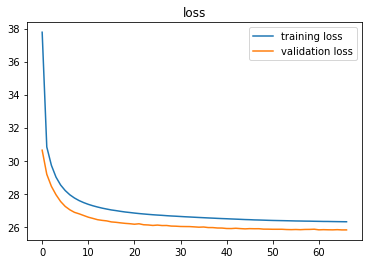

Plotting metrics...


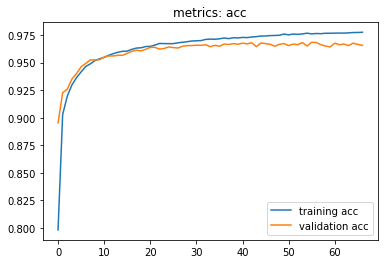

train {'acc': 0.97705454}
test {'acc': 0.9644}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17228456774908795010
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4693352031013780997
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 82.92189 , acc = 0.13 
Epoch 1 , step 100 , loss= 57.500454 , acc = 0.71 
Epoch 1 , step 200 , loss= 41.155827 , acc = 0.87 
Epoch 1 , step 300 , loss= 46.52247 , acc = 0.84 
Epoch 1 , step 400 , loss= 43.3753 , acc = 0.81 
Epoch 1 , step 500 , loss= 41.60446 , acc = 0.86 
Epoch 1 , step 549 , loss= 44.765884 val_loss= 40.334984 , acc = 0.86 val acc = 0.899 
Epoch 1 finished, loss= 49.846264 val loss= 40.334984 ,  acc = 0.7779272 val acc = 0.899
val_acc improved. 
Epo

Epoch 17 , step 400 , loss= 35.258945 , acc = 0.97 
Epoch 17 , step 500 , loss= 37.93931 , acc = 0.96 
Epoch 17 , step 549 , loss= 31.612453 val_loss= 35.14267 , acc = 0.92 val acc = 0.9564 
Epoch 17 finished, loss= 36.086243 val loss= 35.14267 ,  acc = 0.9565636 val acc = 0.9564
val_acc improved. 
Epoch 18 , step 50 , loss= 34.522163 , acc = 0.96 
Epoch 18 , step 150 , loss= 34.451733 , acc = 0.95 
Epoch 18 , step 250 , loss= 33.75021 , acc = 0.96 
Epoch 18 , step 350 , loss= 34.247463 , acc = 0.98 
Epoch 18 , step 450 , loss= 36.318924 , acc = 0.96 
Epoch 18 , step 549 , loss= 32.32378 val_loss= 35.13967 , acc = 0.98 val acc = 0.9548 
Epoch 18 finished, loss= 36.027615 val loss= 35.13967 ,  acc = 0.9573454 val acc = 0.9548

Epoch 19 , step 0 , loss= 38.211052 , acc = 0.96 
Epoch 19 , step 100 , loss= 38.70199 , acc = 0.95 
Epoch 19 , step 200 , loss= 38.797077 , acc = 0.96 
Epoch 19 , step 300 , loss= 31.579994 , acc = 0.99 
Epoch 19 , step 400 , loss= 33.900085 , acc = 0.98 
Epoch 1

Epoch 35 , step 200 , loss= 36.62444 , acc = 0.99 
Epoch 35 , step 300 , loss= 34.595577 , acc = 0.97 
Epoch 35 , step 400 , loss= 34.65275 , acc = 0.97 
Epoch 35 , step 500 , loss= 29.855995 , acc = 0.98 
Epoch 35 , step 549 , loss= 35.65756 val_loss= 34.67649 , acc = 0.97 val acc = 0.9602 
Epoch 35 finished, loss= 35.489025 val loss= 34.67649 ,  acc = 0.9666728 val acc = 0.9602
val_acc improved. 
Epoch 36 , step 50 , loss= 35.613407 , acc = 0.95 
Epoch 36 , step 150 , loss= 36.83371 , acc = 0.96 
Epoch 36 , step 250 , loss= 35.023327 , acc = 0.95 
Epoch 36 , step 350 , loss= 36.203865 , acc = 0.97 
Epoch 36 , step 450 , loss= 38.621212 , acc = 0.97 
Epoch 36 , step 549 , loss= 38.7391 val_loss= 34.715054 , acc = 0.95 val acc = 0.9604 
Epoch 36 finished, loss= 35.475838 val loss= 34.715054 ,  acc = 0.9671999 val acc = 0.9604
val_acc improved. 
Epoch 37 , step 0 , loss= 37.910175 , acc = 0.97 
Epoch 37 , step 100 , loss= 34.6549 , acc = 0.98 
Epoch 37 , step 200 , loss= 37.630276 , acc

Epoch 53 , step 100 , loss= 37.919918 , acc = 0.98 
Epoch 53 , step 200 , loss= 36.72881 , acc = 0.98 
Epoch 53 , step 300 , loss= 37.201637 , acc = 0.95 
Epoch 53 , step 400 , loss= 36.47424 , acc = 0.97 
Epoch 53 , step 500 , loss= 37.90793 , acc = 0.99 
Epoch 53 , step 549 , loss= 33.992413 val_loss= 34.56059 , acc = 0.97 val acc = 0.9628 
Epoch 53 finished, loss= 35.28085 val loss= 34.56059 ,  acc = 0.9701091 val acc = 0.9628

Epoch 54 , step 50 , loss= 38.12694 , acc = 0.98 
Epoch 54 , step 150 , loss= 36.56044 , acc = 1.0 
Epoch 54 , step 250 , loss= 36.110264 , acc = 0.97 
Epoch 54 , step 350 , loss= 29.38801 , acc = 0.98 
Epoch 54 , step 450 , loss= 32.40989 , acc = 0.99 
Epoch 54 , step 549 , loss= 37.93384 val_loss= 34.55229 , acc = 0.96 val acc = 0.9624 
Epoch 54 finished, loss= 35.27503 val loss= 34.55229 ,  acc = 0.9702 val acc = 0.9624

Epoch 55 , step 0 , loss= 38.22392 , acc = 0.97 
Epoch 55 , step 100 , loss= 35.66808 , acc = 0.97 
Epoch 55 , step 200 , loss= 35.648605

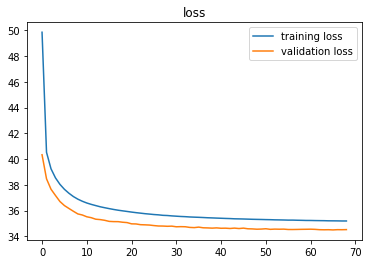

Plotting metrics...


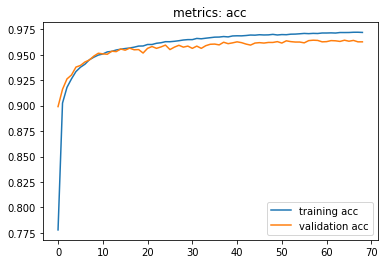

train {'acc': 0.97132725}
test {'acc': 0.9588}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2086664701122666626
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 16580163212790962085
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.304202 , acc = 0.09 
Epoch 1 , step 100 , loss= 0.59655905 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.4996138 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.44327104 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.27036282 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.23803157 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.26720113 val_loss= 0.24897075 , acc = 0.91 val acc = 0.9296 
Epoch 1 finished, loss= 0.55957484 val loss= 0.24897075 ,  acc = 0.8482727 val acc = 0.9296
val_acc 

Epoch 17 , step 100 , loss= 0.0985881 , acc = 0.96 
Epoch 17 , step 200 , loss= 0.047602415 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.033483177 , acc = 0.98 
Epoch 17 , step 400 , loss= 0.028062342 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.12149335 , acc = 0.96 
Epoch 17 , step 549 , loss= 0.014684361 val_loss= 0.09836184 , acc = 1.0 val acc = 0.972 
Epoch 17 finished, loss= 0.049869433 val loss= 0.09836184 ,  acc = 0.9868182 val acc = 0.972

Epoch 18 , step 50 , loss= 0.06484745 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.08314224 , acc = 0.98 
Epoch 18 , step 250 , loss= 0.041150592 , acc = 0.98 
Epoch 18 , step 350 , loss= 0.030226134 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.039883178 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.009383362 val_loss= 0.09741564 , acc = 1.0 val acc = 0.9718 
Epoch 18 finished, loss= 0.046065293 val loss= 0.09741564 ,  acc = 0.988109 val acc = 0.9718

Epoch 19 , step 0 , loss= 0.05398497 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.027521549 , acc 

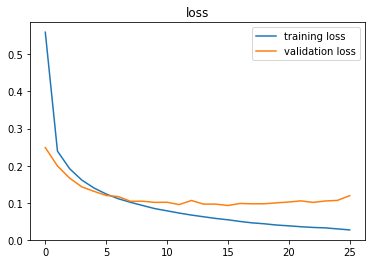

Plotting metrics...


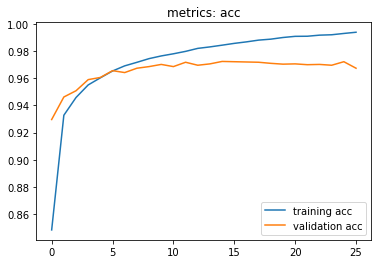

train {'acc': 0.98932725}
test {'acc': 0.9641}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7652164694506582347
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 8463168085060500723
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 38.552383 , acc = 0.08 
Epoch 1 , step 100 , loss= 29.520035 , acc = 0.82 
Epoch 1 , step 200 , loss= 24.951508 , acc = 0.81 
Epoch 1 , step 300 , loss= 25.101112 , acc = 0.85 
Epoch 1 , step 400 , loss= 23.901447 , acc = 0.83 
Epoch 1 , step 500 , loss= 25.44689 , acc = 0.87 
Epoch 1 , step 549 , loss= 23.363726 val_loss= 23.580725 , acc = 0.84 val acc = 0.89 
Epoch 1 finished, loss= 27.08951 val loss= 23.580725 ,  acc = 0.7941818 val acc = 0.89
val_acc improved. 
E

Epoch 17 , step 300 , loss= 21.234589 , acc = 0.99 
Epoch 17 , step 400 , loss= 21.395914 , acc = 0.95 
Epoch 17 , step 500 , loss= 22.604202 , acc = 0.96 
Epoch 17 , step 549 , loss= 22.59774 val_loss= 21.092365 , acc = 0.97 val acc = 0.9554 
Epoch 17 finished, loss= 21.47356 val loss= 21.092365 ,  acc = 0.9639818 val acc = 0.9554

Epoch 18 , step 50 , loss= 20.491837 , acc = 1.0 
Epoch 18 , step 150 , loss= 19.839884 , acc = 0.99 
Epoch 18 , step 250 , loss= 20.770182 , acc = 1.0 
Epoch 18 , step 350 , loss= 21.721992 , acc = 0.98 
Epoch 18 , step 450 , loss= 22.708925 , acc = 0.98 
Epoch 18 , step 549 , loss= 21.420063 val_loss= 21.072418 , acc = 0.95 val acc = 0.9562 
Epoch 18 finished, loss= 21.443764 val loss= 21.072418 ,  acc = 0.9651273 val acc = 0.9562

Epoch 19 , step 0 , loss= 22.924952 , acc = 0.91 
Epoch 19 , step 100 , loss= 22.179905 , acc = 0.96 
Epoch 19 , step 200 , loss= 20.870455 , acc = 0.98 
Epoch 19 , step 300 , loss= 20.552217 , acc = 0.98 
Epoch 19 , step 400 ,

Epoch 35 , step 100 , loss= 21.514109 , acc = 0.95 
Epoch 35 , step 200 , loss= 20.717539 , acc = 0.99 
Epoch 35 , step 300 , loss= 21.291039 , acc = 0.95 
Epoch 35 , step 400 , loss= 19.92483 , acc = 0.98 
Epoch 35 , step 500 , loss= 21.364885 , acc = 0.94 
Epoch 35 , step 549 , loss= 20.914328 val_loss= 20.916069 , acc = 0.99 val acc = 0.9614 
Epoch 35 finished, loss= 21.2154 val loss= 20.916069 ,  acc = 0.97403634 val acc = 0.9614

Epoch 36 , step 50 , loss= 20.676168 , acc = 0.98 
Epoch 36 , step 150 , loss= 21.648752 , acc = 0.97 
Epoch 36 , step 250 , loss= 22.891336 , acc = 0.95 
Epoch 36 , step 350 , loss= 20.705173 , acc = 0.96 
Epoch 36 , step 450 , loss= 20.821764 , acc = 1.0 
Epoch 36 , step 549 , loss= 21.079647 val_loss= 20.90782 , acc = 0.98 val acc = 0.9612 
Epoch 36 finished, loss= 21.208855 val loss= 20.90782 ,  acc = 0.9749636 val acc = 0.9612

Epoch 37 , step 0 , loss= 21.582342 , acc = 0.96 
Epoch 37 , step 100 , loss= 21.816685 , acc = 0.97 
Epoch 37 , step 200 , 

Epoch 53 , step 100 , loss= 19.728975 , acc = 0.99 
Epoch 53 , step 200 , loss= 19.587166 , acc = 0.98 
Epoch 53 , step 300 , loss= 21.661745 , acc = 0.98 
Epoch 53 , step 400 , loss= 20.25003 , acc = 0.96 
Epoch 53 , step 500 , loss= 20.442387 , acc = 0.99 
Epoch 53 , step 549 , loss= 22.202715 val_loss= 20.863457 , acc = 0.98 val acc = 0.9654 
Epoch 53 finished, loss= 21.131355 val loss= 20.863457 ,  acc = 0.9788727 val acc = 0.9654
val_acc improved. 
Epoch 54 , step 50 , loss= 20.785322 , acc = 0.96 
Epoch 54 , step 150 , loss= 19.621107 , acc = 0.98 
Epoch 54 , step 250 , loss= 19.647839 , acc = 0.99 
Epoch 54 , step 350 , loss= 21.68882 , acc = 0.97 
Epoch 54 , step 450 , loss= 19.030777 , acc = 0.98 
Epoch 54 , step 549 , loss= 21.154564 val_loss= 20.872566 , acc = 1.0 val acc = 0.9632 
Epoch 54 finished, loss= 21.127823 val loss= 20.872566 ,  acc = 0.9794 val acc = 0.9632

Epoch 55 , step 0 , loss= 21.410866 , acc = 0.94 
Epoch 55 , step 100 , loss= 18.572504 , acc = 0.98 
Epoch

Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 8, 'temperature_effect': 64, 'train_acc': 0.9818909, 'test_acc': 0.9662}
Plotting loss...


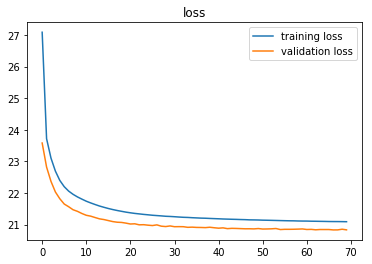

Plotting metrics...


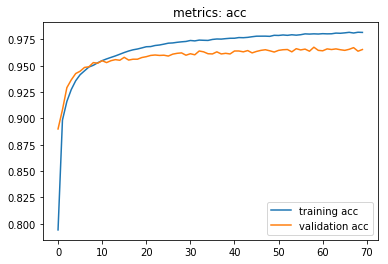

train {'acc': 0.9818909}
test {'acc': 0.9662}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5962147949955834806
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 12207422678453863676
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 74.91962 , acc = 0.08 
Epoch 1 , step 100 , loss= 57.63722 , acc = 0.68 
Epoch 1 , step 200 , loss= 47.917866 , acc = 0.81 
Epoch 1 , step 300 , loss= 47.11316 , acc = 0.8 
Epoch 1 , step 400 , loss= 53.366478 , acc = 0.84 
Epoch 1 , step 500 , loss= 48.742744 , acc = 0.91 
Epoch 1 , step 549 , loss= 49.83083 val_loss= 46.840706 , acc = 0.88 val acc = 0.882 
Epoch 1 finished, loss= 53.452778 val loss= 46.840706 ,  acc = 0.7656 val acc = 0.882
val_acc improved. 
Epoch 2

Epoch 17 , step 400 , loss= 44.743668 , acc = 0.96 
Epoch 17 , step 500 , loss= 42.697605 , acc = 0.96 
Epoch 17 , step 549 , loss= 43.895336 val_loss= 42.022446 , acc = 0.94 val acc = 0.9562 
Epoch 17 finished, loss= 42.821136 val loss= 42.022446 ,  acc = 0.9553636 val acc = 0.9562
val_acc improved. 
Epoch 18 , step 50 , loss= 42.9117 , acc = 0.96 
Epoch 18 , step 150 , loss= 45.48198 , acc = 0.97 
Epoch 18 , step 250 , loss= 47.66078 , acc = 0.89 
Epoch 18 , step 350 , loss= 43.817 , acc = 0.98 
Epoch 18 , step 450 , loss= 42.15536 , acc = 0.94 
Epoch 18 , step 549 , loss= 41.145115 val_loss= 41.95795 , acc = 0.97 val acc = 0.957 
Epoch 18 finished, loss= 42.782482 val loss= 41.95795 ,  acc = 0.9564908 val acc = 0.957
val_acc improved. 
Epoch 19 , step 0 , loss= 41.7844 , acc = 0.93 
Epoch 19 , step 100 , loss= 42.32264 , acc = 0.95 
Epoch 19 , step 200 , loss= 40.555065 , acc = 0.95 
Epoch 19 , step 300 , loss= 42.08221 , acc = 0.95 
Epoch 19 , step 400 , loss= 42.63206 , acc = 0.95

Epoch 35 , step 100 , loss= 43.336597 , acc = 0.95 
Epoch 35 , step 200 , loss= 41.321945 , acc = 0.98 
Epoch 35 , step 300 , loss= 36.74487 , acc = 0.99 
Epoch 35 , step 400 , loss= 39.70795 , acc = 1.0 
Epoch 35 , step 500 , loss= 45.443768 , acc = 0.96 
Epoch 35 , step 549 , loss= 44.091 val_loss= 41.704197 , acc = 0.97 val acc = 0.9616 
Epoch 35 finished, loss= 42.4384 val loss= 41.704197 ,  acc = 0.96567273 val acc = 0.9616

Epoch 36 , step 50 , loss= 43.4755 , acc = 0.97 
Epoch 36 , step 150 , loss= 43.56367 , acc = 0.96 
Epoch 36 , step 250 , loss= 43.70853 , acc = 0.96 
Epoch 36 , step 350 , loss= 42.48578 , acc = 0.96 
Epoch 36 , step 450 , loss= 44.260036 , acc = 0.97 
Epoch 36 , step 549 , loss= 46.059547 val_loss= 41.685963 , acc = 0.94 val acc = 0.9608 
Epoch 36 finished, loss= 42.419376 val loss= 41.685963 ,  acc = 0.96632725 val acc = 0.9608

Epoch 37 , step 0 , loss= 41.498867 , acc = 0.96 
Epoch 37 , step 100 , loss= 38.417606 , acc = 0.95 
Epoch 37 , step 200 , loss= 

Epoch 53 , step 100 , loss= 45.641735 , acc = 0.96 
Epoch 53 , step 200 , loss= 44.12464 , acc = 0.97 
Epoch 53 , step 300 , loss= 42.95415 , acc = 0.97 
Epoch 53 , step 400 , loss= 41.618134 , acc = 0.96 
Epoch 53 , step 500 , loss= 35.93755 , acc = 0.99 
Epoch 53 , step 549 , loss= 43.058678 val_loss= 41.5715 , acc = 0.95 val acc = 0.9656 
Epoch 53 finished, loss= 42.26037 val loss= 41.5715 ,  acc = 0.9709455 val acc = 0.9656
val_acc improved. 
Epoch 54 , step 50 , loss= 42.80613 , acc = 0.96 
Epoch 54 , step 150 , loss= 40.87154 , acc = 0.99 
Epoch 54 , step 250 , loss= 42.55067 , acc = 0.99 
Epoch 54 , step 350 , loss= 45.614147 , acc = 0.97 
Epoch 54 , step 450 , loss= 39.96205 , acc = 0.99 
Epoch 54 , step 549 , loss= 41.989094 val_loss= 41.55088 , acc = 0.97 val acc = 0.9652 
Epoch 54 finished, loss= 42.251587 val loss= 41.55088 ,  acc = 0.97076374 val acc = 0.9652

Epoch 55 , step 0 , loss= 43.94493 , acc = 0.96 
Epoch 55 , step 100 , loss= 38.46006 , acc = 0.97 
Epoch 55 , ste

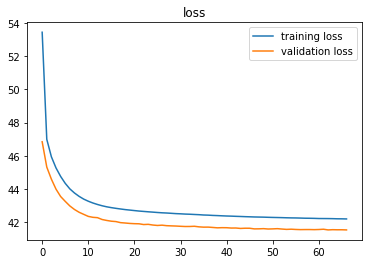

Plotting metrics...


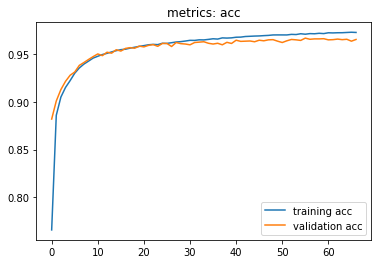

train {'acc': 0.97312725}
test {'acc': 0.9598}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4319805897741189674
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5830368259261897454
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 111.166916 , acc = 0.12 
Epoch 1 , step 100 , loss= 85.521286 , acc = 0.73 
Epoch 1 , step 200 , loss= 75.252945 , acc = 0.77 
Epoch 1 , step 300 , loss= 74.93072 , acc = 0.86 
Epoch 1 , step 400 , loss= 72.5155 , acc = 0.86 
Epoch 1 , step 500 , loss= 70.93997 , acc = 0.78 
Epoch 1 , step 549 , loss= 74.02482 val_loss= 69.33169 , acc = 0.9 val acc = 0.8822 
Epoch 1 finished, loss= 79.15445 val loss= 69.33169 ,  acc = 0.7608546 val acc = 0.8822
val_acc improved. 
Epo

Epoch 17 , step 400 , loss= 66.0587 , acc = 0.94 
Epoch 17 , step 500 , loss= 66.9217 , acc = 0.95 
Epoch 17 , step 549 , loss= 62.112827 val_loss= 62.867386 , acc = 0.97 val acc = 0.9542 
Epoch 17 finished, loss= 64.057655 val loss= 62.867386 ,  acc = 0.95452726 val acc = 0.9542

Epoch 18 , step 50 , loss= 59.97727 , acc = 0.96 
Epoch 18 , step 150 , loss= 64.55891 , acc = 0.9 
Epoch 18 , step 250 , loss= 65.736534 , acc = 0.96 
Epoch 18 , step 350 , loss= 63.754597 , acc = 0.96 
Epoch 18 , step 450 , loss= 63.00952 , acc = 0.93 
Epoch 18 , step 549 , loss= 63.524704 val_loss= 62.827606 , acc = 0.96 val acc = 0.9534 
Epoch 18 finished, loss= 63.995087 val loss= 62.827606 ,  acc = 0.9562544 val acc = 0.9534

Epoch 19 , step 0 , loss= 66.15056 , acc = 0.95 
Epoch 19 , step 100 , loss= 65.897446 , acc = 0.98 
Epoch 19 , step 200 , loss= 64.14615 , acc = 0.98 
Epoch 19 , step 300 , loss= 63.898876 , acc = 0.95 
Epoch 19 , step 400 , loss= 63.605503 , acc = 0.93 
Epoch 19 , step 500 , loss

Epoch 35 , step 100 , loss= 66.93728 , acc = 0.95 
Epoch 35 , step 200 , loss= 64.53717 , acc = 0.95 
Epoch 35 , step 300 , loss= 67.61665 , acc = 0.92 
Epoch 35 , step 400 , loss= 66.22171 , acc = 0.96 
Epoch 35 , step 500 , loss= 61.328873 , acc = 0.98 
Epoch 35 , step 549 , loss= 66.033745 val_loss= 62.394585 , acc = 0.96 val acc = 0.958 
Epoch 35 finished, loss= 63.43436 val loss= 62.394585 ,  acc = 0.96540004 val acc = 0.958

Epoch 36 , step 50 , loss= 60.574406 , acc = 0.96 
Epoch 36 , step 150 , loss= 63.434574 , acc = 0.97 
Epoch 36 , step 250 , loss= 70.90809 , acc = 0.94 
Epoch 36 , step 350 , loss= 64.82324 , acc = 0.93 
Epoch 36 , step 450 , loss= 61.094673 , acc = 0.98 
Epoch 36 , step 549 , loss= 63.621838 val_loss= 62.40527 , acc = 0.95 val acc = 0.958 
Epoch 36 finished, loss= 63.419758 val loss= 62.40527 ,  acc = 0.96609086 val acc = 0.958

Epoch 37 , step 0 , loss= 64.77687 , acc = 0.98 
Epoch 37 , step 100 , loss= 62.007248 , acc = 0.97 
Epoch 37 , step 200 , loss= 6

Epoch 53 , step 100 , loss= 60.379482 , acc = 0.96 
Epoch 53 , step 200 , loss= 64.92022 , acc = 0.99 
Epoch 53 , step 300 , loss= 64.732925 , acc = 0.97 
Epoch 53 , step 400 , loss= 63.04149 , acc = 0.98 
Epoch 53 , step 500 , loss= 65.30232 , acc = 0.98 
Epoch 53 , step 549 , loss= 61.699932 val_loss= 62.258453 , acc = 0.98 val acc = 0.9608 
Epoch 53 finished, loss= 63.25384 val loss= 62.258453 ,  acc = 0.9689636 val acc = 0.9608

Epoch 54 , step 50 , loss= 65.88232 , acc = 0.97 
Epoch 54 , step 150 , loss= 64.11541 , acc = 0.98 
Epoch 54 , step 250 , loss= 68.35089 , acc = 0.97 
Epoch 54 , step 350 , loss= 65.48033 , acc = 0.99 
Epoch 54 , step 450 , loss= 68.3222 , acc = 0.99 
Epoch 54 , step 549 , loss= 59.05881 val_loss= 62.298576 , acc = 0.91 val acc = 0.9616 
Epoch 54 finished, loss= 63.243736 val loss= 62.298576 ,  acc = 0.9691273 val acc = 0.9616

Epoch 55 , step 0 , loss= 66.55662 , acc = 0.97 
Epoch 55 , step 100 , loss= 64.98896 , acc = 0.97 
Epoch 55 , step 200 , loss= 62

Epoch 71 , step 100 , loss= 63.020092 , acc = 0.96 
Epoch 71 , step 200 , loss= 65.181305 , acc = 1.0 
Epoch 71 , step 300 , loss= 62.926914 , acc = 0.95 
Epoch 71 , step 400 , loss= 65.04605 , acc = 0.99 
Epoch 71 , step 500 , loss= 65.30832 , acc = 0.97 
Epoch 71 , step 549 , loss= 63.940784 val_loss= 62.197968 , acc = 0.98 val acc = 0.9658 
Epoch 71 finished, loss= 63.1498 val loss= 62.197968 ,  acc = 0.97120005 val acc = 0.9658
val_acc improved. 
Epoch 72 , step 50 , loss= 60.201313 , acc = 0.97 
Epoch 72 , step 150 , loss= 67.56696 , acc = 0.98 
Epoch 72 , step 250 , loss= 63.00229 , acc = 0.94 
Epoch 72 , step 350 , loss= 65.33669 , acc = 0.97 
Epoch 72 , step 450 , loss= 68.19965 , acc = 0.95 
Epoch 72 , step 549 , loss= 66.41531 val_loss= 62.226124 , acc = 0.97 val acc = 0.9648 
Epoch 72 finished, loss= 63.14955 val loss= 62.226124 ,  acc = 0.9708364 val acc = 0.9648

Epoch 73 , step 0 , loss= 64.516136 , acc = 0.95 
Epoch 73 , step 100 , loss= 63.072826 , acc = 0.98 
Epoch 73 

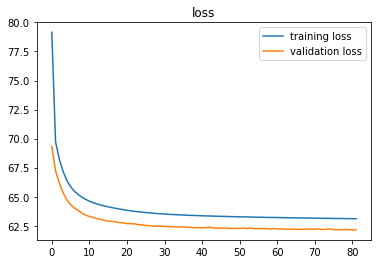

Plotting metrics...


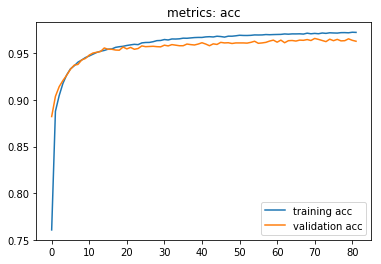

train {'acc': 0.9717091}
test {'acc': 0.9598}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4212907759652903198
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2759437139487458355
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 147.2979 , acc = 0.14 
Epoch 1 , step 100 , loss= 116.72547 , acc = 0.73 
Epoch 1 , step 200 , loss= 96.861916 , acc = 0.84 
Epoch 1 , step 300 , loss= 91.41815 , acc = 0.86 
Epoch 1 , step 400 , loss= 91.22021 , acc = 0.86 
Epoch 1 , step 500 , loss= 103.63645 , acc = 0.8 
Epoch 1 , step 549 , loss= 98.89446 val_loss= 92.164 , acc = 0.91 val acc = 0.8688 
Epoch 1 finished, loss= 104.68801 val loss= 92.164 ,  acc = 0.7620182 val acc = 0.8688
val_acc improved. 
Epoch 2 ,

Epoch 17 , step 400 , loss= 79.49184 , acc = 0.95 
Epoch 17 , step 500 , loss= 89.15011 , acc = 0.95 
Epoch 17 , step 549 , loss= 85.43486 val_loss= 83.52719 , acc = 0.93 val acc = 0.9532 
Epoch 17 finished, loss= 85.172485 val loss= 83.52719 ,  acc = 0.9549818 val acc = 0.9532
val_acc improved. 
Epoch 18 , step 50 , loss= 82.189835 , acc = 0.95 
Epoch 18 , step 150 , loss= 87.761375 , acc = 0.95 
Epoch 18 , step 250 , loss= 83.45831 , acc = 0.98 
Epoch 18 , step 350 , loss= 82.5093 , acc = 0.95 
Epoch 18 , step 450 , loss= 74.36805 , acc = 0.98 
Epoch 18 , step 549 , loss= 86.7904 val_loss= 83.49758 , acc = 0.91 val acc = 0.9546 
Epoch 18 finished, loss= 85.099815 val loss= 83.49758 ,  acc = 0.9559455 val acc = 0.9546
val_acc improved. 
Epoch 19 , step 0 , loss= 83.59419 , acc = 0.95 
Epoch 19 , step 100 , loss= 85.180595 , acc = 0.96 
Epoch 19 , step 200 , loss= 87.19957 , acc = 0.99 
Epoch 19 , step 300 , loss= 85.55197 , acc = 0.96 
Epoch 19 , step 400 , loss= 85.516846 , acc = 0.9

Epoch 35 , step 100 , loss= 80.85519 , acc = 0.97 
Epoch 35 , step 200 , loss= 87.27348 , acc = 0.96 
Epoch 35 , step 300 , loss= 89.18086 , acc = 0.93 
Epoch 35 , step 400 , loss= 80.934166 , acc = 0.98 
Epoch 35 , step 500 , loss= 78.14401 , acc = 0.97 
Epoch 35 , step 549 , loss= 85.08363 val_loss= 83.018166 , acc = 0.96 val acc = 0.9616 
Epoch 35 finished, loss= 84.43503 val loss= 83.018166 ,  acc = 0.9645454 val acc = 0.9616
val_acc improved. 
Epoch 36 , step 50 , loss= 84.95313 , acc = 0.93 
Epoch 36 , step 150 , loss= 86.09735 , acc = 0.98 
Epoch 36 , step 250 , loss= 89.648415 , acc = 0.96 
Epoch 36 , step 350 , loss= 74.45434 , acc = 0.97 
Epoch 36 , step 450 , loss= 89.55772 , acc = 0.92 
Epoch 36 , step 549 , loss= 86.6116 val_loss= 83.00391 , acc = 0.93 val acc = 0.9614 
Epoch 36 finished, loss= 84.41437 val loss= 83.00391 ,  acc = 0.965 val acc = 0.9614

Epoch 37 , step 0 , loss= 89.26787 , acc = 0.92 
Epoch 37 , step 100 , loss= 82.499084 , acc = 0.96 
Epoch 37 , step 200

Epoch 53 , step 100 , loss= 92.625145 , acc = 0.98 
Epoch 53 , step 200 , loss= 86.46736 , acc = 0.97 
Epoch 53 , step 300 , loss= 78.31703 , acc = 0.98 
Epoch 53 , step 400 , loss= 82.51836 , acc = 0.97 
Epoch 53 , step 500 , loss= 84.04387 , acc = 0.97 
Epoch 53 , step 549 , loss= 83.23944 val_loss= 82.795906 , acc = 0.99 val acc = 0.9648 
Epoch 53 finished, loss= 84.16918 val loss= 82.795906 ,  acc = 0.96900016 val acc = 0.9648

Epoch 54 , step 50 , loss= 89.30236 , acc = 0.95 
Epoch 54 , step 150 , loss= 78.41025 , acc = 1.0 
Epoch 54 , step 250 , loss= 82.90982 , acc = 0.95 
Epoch 54 , step 350 , loss= 81.64888 , acc = 0.98 
Epoch 54 , step 450 , loss= 82.71648 , acc = 0.98 
Epoch 54 , step 549 , loss= 82.954475 val_loss= 82.83645 , acc = 0.97 val acc = 0.9658 
Epoch 54 finished, loss= 84.15966 val loss= 82.83645 ,  acc = 0.96961814 val acc = 0.9658
val_acc improved. 
Epoch 55 , step 0 , loss= 85.26063 , acc = 0.97 
Epoch 55 , step 100 , loss= 87.44137 , acc = 0.98 
Epoch 55 , ste

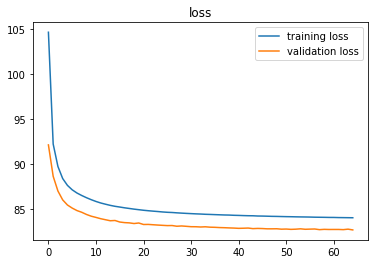

Plotting metrics...


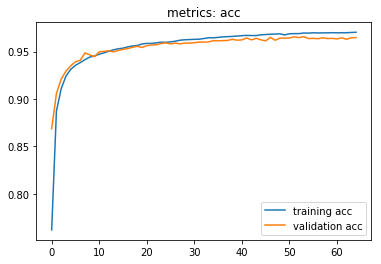

train {'acc': 0.9705818}
test {'acc': 0.9636}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16342623917984678106
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 17084544286145441121
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3305578 , acc = 0.1 
Epoch 1 , step 100 , loss= 0.57508314 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.41464865 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.39679992 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.23558909 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.28246346 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.30977243 val_loss= 0.26112255 , acc = 0.89 val acc = 0.9266 
Epoch 1 finished, loss= 0.5721584 val loss= 0.26112255 ,  acc = 0.8465273 val acc = 0.9266
val_ac

Epoch 17 , step 100 , loss= 0.049464118 , acc = 0.98 
Epoch 17 , step 200 , loss= 0.040990945 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.032167606 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.0804136 , acc = 0.97 
Epoch 17 , step 500 , loss= 0.09516167 , acc = 0.98 
Epoch 17 , step 549 , loss= 0.06871796 val_loss= 0.106372766 , acc = 0.99 val acc = 0.9702 
Epoch 17 finished, loss= 0.059642423 val loss= 0.106372766 ,  acc = 0.984 val acc = 0.9702
val_acc improved. 
Epoch 18 , step 50 , loss= 0.024658237 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.030738955 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.065257534 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.04699504 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.038162556 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.020712 val_loss= 0.10681166 , acc = 1.0 val acc = 0.9686 
Epoch 18 finished, loss= 0.05645925 val loss= 0.10681166 ,  acc = 0.9850727 val acc = 0.9686

Epoch 19 , step 0 , loss= 0.05794021 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.02

Epoch 34 , step 150 , loss= 0.016970087 , acc = 0.99 
Epoch 34 , step 250 , loss= 0.016279358 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.016804632 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0058795484 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.021161286 val_loss= 0.12522498 , acc = 1.0 val acc = 0.9672 
Epoch 34 finished, loss= 0.021989992 val loss= 0.12522498 ,  acc = 0.9958909 val acc = 0.9672

Epoch 35 , step 0 , loss= 0.013446686 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0052701063 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.01034999 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.036382623 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.0122312 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0654953 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.011930162 val_loss= 0.12946145 , acc = 1.0 val acc = 0.968 
Epoch 35 finished, loss= 0.022692664 val loss= 0.12946145 ,  acc = 0.9955272 val acc = 0.968

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 

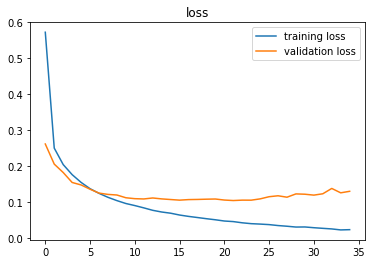

Plotting metrics...


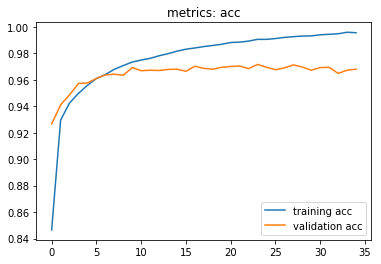

train {'acc': 0.99578184}
test {'acc': 0.9685}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15681670822190423505
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 14889610391105384271
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 59.327686 , acc = 0.08 
Epoch 1 , step 100 , loss= 48.3078 , acc = 0.72 
Epoch 1 , step 200 , loss= 43.945843 , acc = 0.85 
Epoch 1 , step 300 , loss= 44.593193 , acc = 0.84 
Epoch 1 , step 400 , loss= 42.918907 , acc = 0.9 
Epoch 1 , step 500 , loss= 45.3626 , acc = 0.8 
Epoch 1 , step 549 , loss= 43.296257 val_loss= 41.963547 , acc = 0.89 val acc = 0.8886 
Epoch 1 finished, loss= 46.03083 val loss= 41.963547 ,  acc = 0.78918177 val acc = 0.8886
val_acc improved

Epoch 17 , step 300 , loss= 40.43765 , acc = 0.96 
Epoch 17 , step 400 , loss= 37.986103 , acc = 0.97 
Epoch 17 , step 500 , loss= 38.70044 , acc = 0.97 
Epoch 17 , step 549 , loss= 38.50281 val_loss= 39.21748 , acc = 0.98 val acc = 0.955 
Epoch 17 finished, loss= 39.711235 val loss= 39.21748 ,  acc = 0.9590181 val acc = 0.955

Epoch 18 , step 50 , loss= 40.305904 , acc = 0.94 
Epoch 18 , step 150 , loss= 39.524067 , acc = 0.98 
Epoch 18 , step 250 , loss= 39.514374 , acc = 0.98 
Epoch 18 , step 350 , loss= 37.604557 , acc = 0.97 
Epoch 18 , step 450 , loss= 40.35126 , acc = 0.95 
Epoch 18 , step 549 , loss= 40.645386 val_loss= 39.195473 , acc = 0.93 val acc = 0.958 
Epoch 18 finished, loss= 39.679314 val loss= 39.195473 ,  acc = 0.9604545 val acc = 0.958
val_acc improved. 
Epoch 19 , step 0 , loss= 37.635536 , acc = 0.97 
Epoch 19 , step 100 , loss= 39.972816 , acc = 0.96 
Epoch 19 , step 200 , loss= 39.18143 , acc = 0.95 
Epoch 19 , step 300 , loss= 41.01261 , acc = 0.92 
Epoch 19 , 

Epoch 35 , step 100 , loss= 40.158615 , acc = 0.97 
Epoch 35 , step 200 , loss= 39.907143 , acc = 0.97 
Epoch 35 , step 300 , loss= 38.575104 , acc = 0.96 
Epoch 35 , step 400 , loss= 36.36417 , acc = 0.98 
Epoch 35 , step 500 , loss= 38.538525 , acc = 0.97 
Epoch 35 , step 549 , loss= 38.512123 val_loss= 38.990135 , acc = 0.96 val acc = 0.9596 
Epoch 35 finished, loss= 39.406384 val loss= 38.990135 ,  acc = 0.97023636 val acc = 0.9596

Epoch 36 , step 50 , loss= 40.382668 , acc = 0.96 
Epoch 36 , step 150 , loss= 38.58922 , acc = 0.99 
Epoch 36 , step 250 , loss= 39.038475 , acc = 0.96 
Epoch 36 , step 350 , loss= 35.921356 , acc = 0.98 
Epoch 36 , step 450 , loss= 38.755184 , acc = 0.98 
Epoch 36 , step 549 , loss= 40.74931 val_loss= 38.96984 , acc = 0.97 val acc = 0.9608 
Epoch 36 finished, loss= 39.39514 val loss= 38.96984 ,  acc = 0.97136366 val acc = 0.9608
val_acc improved. 
Epoch 37 , step 0 , loss= 41.326702 , acc = 0.98 
Epoch 37 , step 100 , loss= 38.012794 , acc = 0.96 
Epo

Epoch 53 , step 100 , loss= 38.934986 , acc = 0.98 
Epoch 53 , step 200 , loss= 38.6989 , acc = 0.97 
Epoch 53 , step 300 , loss= 40.676865 , acc = 0.97 
Epoch 53 , step 400 , loss= 40.146507 , acc = 0.96 
Epoch 53 , step 500 , loss= 39.571716 , acc = 0.96 
Epoch 53 , step 549 , loss= 40.305195 val_loss= 38.89709 , acc = 0.99 val acc = 0.961 
Epoch 53 finished, loss= 39.289062 val loss= 38.89709 ,  acc = 0.97556376 val acc = 0.961

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 10, 'temperature_effect': 100, 'train_acc': 0.97547275, 'test_acc': 0.9628}
Plotting loss...


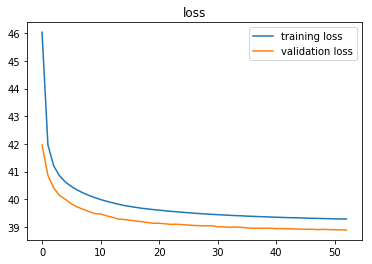

Plotting metrics...


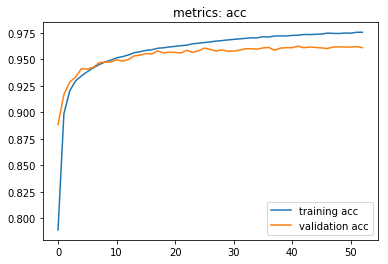

train {'acc': 0.97547275}
test {'acc': 0.9628}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9000674236781759031
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 14371179988851443195
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 116.256584 , acc = 0.19 
Epoch 1 , step 100 , loss= 97.07016 , acc = 0.68 
Epoch 1 , step 200 , loss= 86.909805 , acc = 0.81 
Epoch 1 , step 300 , loss= 89.16758 , acc = 0.84 
Epoch 1 , step 400 , loss= 85.09106 , acc = 0.87 
Epoch 1 , step 500 , loss= 86.39357 , acc = 0.88 
Epoch 1 , step 549 , loss= 88.798546 val_loss= 83.51973 , acc = 0.79 val acc = 0.8692 
Epoch 1 finished, loss= 91.42966 val loss= 83.51973 ,  acc = 0.75594544 val acc = 0.8692
val_acc improved. 

Epoch 17 , step 400 , loss= 74.1244 , acc = 0.96 
Epoch 17 , step 500 , loss= 85.33318 , acc = 0.9 
Epoch 17 , step 549 , loss= 79.83408 val_loss= 78.24644 , acc = 0.97 val acc = 0.9476 
Epoch 17 finished, loss= 79.21507 val loss= 78.24644 ,  acc = 0.9532728 val acc = 0.9476

Epoch 18 , step 50 , loss= 80.43018 , acc = 0.96 
Epoch 18 , step 150 , loss= 79.0106 , acc = 0.96 
Epoch 18 , step 250 , loss= 79.20456 , acc = 0.98 
Epoch 18 , step 350 , loss= 79.65058 , acc = 0.96 
Epoch 18 , step 450 , loss= 79.87192 , acc = 0.95 
Epoch 18 , step 549 , loss= 79.17162 val_loss= 78.15458 , acc = 0.93 val acc = 0.9492 
Epoch 18 finished, loss= 79.16017 val loss= 78.15458 ,  acc = 0.95449084 val acc = 0.9492

Epoch 19 , step 0 , loss= 80.4733 , acc = 0.99 
Epoch 19 , step 100 , loss= 77.30198 , acc = 0.92 
Epoch 19 , step 200 , loss= 76.83033 , acc = 0.96 
Epoch 19 , step 300 , loss= 77.17027 , acc = 0.99 
Epoch 19 , step 400 , loss= 79.68221 , acc = 1.0 
Epoch 19 , step 500 , loss= 82.859146 , a

Epoch 35 , step 100 , loss= 79.03917 , acc = 0.95 
Epoch 35 , step 200 , loss= 84.60942 , acc = 0.94 
Epoch 35 , step 300 , loss= 81.41112 , acc = 0.94 
Epoch 35 , step 400 , loss= 78.42027 , acc = 0.95 
Epoch 35 , step 500 , loss= 81.621475 , acc = 0.94 
Epoch 35 , step 549 , loss= 75.81831 val_loss= 77.753365 , acc = 0.95 val acc = 0.9578 
Epoch 35 finished, loss= 78.62642 val loss= 77.753365 ,  acc = 0.96558183 val acc = 0.9578

Epoch 36 , step 50 , loss= 73.08776 , acc = 0.98 
Epoch 36 , step 150 , loss= 75.99689 , acc = 0.96 
Epoch 36 , step 250 , loss= 76.44821 , acc = 1.0 
Epoch 36 , step 350 , loss= 80.58831 , acc = 0.96 
Epoch 36 , step 450 , loss= 81.59912 , acc = 0.97 
Epoch 36 , step 549 , loss= 77.10051 val_loss= 77.729675 , acc = 0.98 val acc = 0.957 
Epoch 36 finished, loss= 78.61294 val loss= 77.729675 ,  acc = 0.96543634 val acc = 0.957

Epoch 37 , step 0 , loss= 73.592926 , acc = 0.98 
Epoch 37 , step 100 , loss= 79.66701 , acc = 0.97 
Epoch 37 , step 200 , loss= 77.7

Epoch 53 , step 100 , loss= 77.16789 , acc = 0.97 
Epoch 53 , step 200 , loss= 74.09952 , acc = 0.96 
Epoch 53 , step 300 , loss= 82.2953 , acc = 0.96 
Epoch 53 , step 400 , loss= 79.93388 , acc = 0.99 
Epoch 53 , step 500 , loss= 77.3591 , acc = 0.97 
Epoch 53 , step 549 , loss= 74.67637 val_loss= 77.534676 , acc = 0.98 val acc = 0.9628 
Epoch 53 finished, loss= 78.3945 val loss= 77.534676 ,  acc = 0.9698364 val acc = 0.9628

Epoch 54 , step 50 , loss= 77.62811 , acc = 0.99 
Epoch 54 , step 150 , loss= 82.25342 , acc = 0.95 
Epoch 54 , step 250 , loss= 81.21165 , acc = 0.96 
Epoch 54 , step 350 , loss= 78.66469 , acc = 0.94 
Epoch 54 , step 450 , loss= 75.71036 , acc = 0.98 
Epoch 54 , step 549 , loss= 76.24361 val_loss= 77.514786 , acc = 1.0 val acc = 0.965 
Epoch 54 finished, loss= 78.38314 val loss= 77.514786 ,  acc = 0.97059995 val acc = 0.965
val_acc improved. 
Epoch 55 , step 0 , loss= 76.89807 , acc = 0.99 
Epoch 55 , step 100 , loss= 82.89419 , acc = 0.96 
Epoch 55 , step 200 

Student performance with {'coef_softloss': 0.5, 'coef_hardloss': 0.5, 'temperature': 10, 'temperature_effect': 100, 'train_acc': 0.97327274, 'test_acc': 0.963}
Plotting loss...


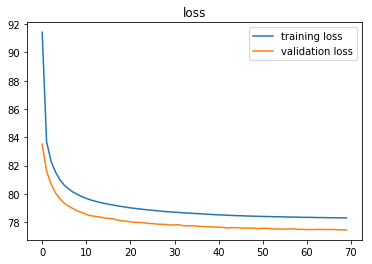

Plotting metrics...


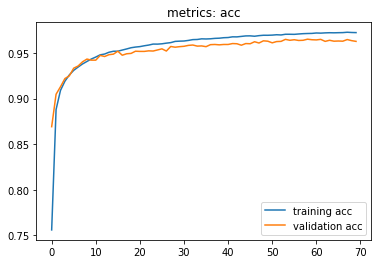

train {'acc': 0.97327274}
test {'acc': 0.963}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9912590717921374496
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13878186920524744208
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 173.3339 , acc = 0.14 
Epoch 1 , step 100 , loss= 142.92253 , acc = 0.68 
Epoch 1 , step 200 , loss= 123.27154 , acc = 0.81 
Epoch 1 , step 300 , loss= 138.53137 , acc = 0.8 
Epoch 1 , step 400 , loss= 128.94002 , acc = 0.8 
Epoch 1 , step 500 , loss= 125.59367 , acc = 0.91 
Epoch 1 , step 549 , loss= 120.81311 val_loss= 124.2761 , acc = 0.84 val acc = 0.8796 
Epoch 1 finished, loss= 136.50333 val loss= 124.2761 ,  acc = 0.7540727 val acc = 0.8796
val_acc improved.

Epoch 17 , step 100 , loss= 120.035675 , acc = 0.95 
Epoch 17 , step 200 , loss= 114.26667 , acc = 0.99 
Epoch 17 , step 300 , loss= 122.57614 , acc = 0.95 
Epoch 17 , step 400 , loss= 124.37882 , acc = 0.96 
Epoch 17 , step 500 , loss= 113.22473 , acc = 0.99 
Epoch 17 , step 549 , loss= 120.54951 val_loss= 116.88428 , acc = 0.96 val acc = 0.953 
Epoch 17 finished, loss= 118.44666 val loss= 116.88428 ,  acc = 0.9529818 val acc = 0.953

Epoch 18 , step 50 , loss= 115.20856 , acc = 0.94 
Epoch 18 , step 150 , loss= 116.54653 , acc = 0.95 
Epoch 18 , step 250 , loss= 121.18118 , acc = 0.98 
Epoch 18 , step 350 , loss= 122.303116 , acc = 0.94 
Epoch 18 , step 450 , loss= 117.97484 , acc = 0.98 
Epoch 18 , step 549 , loss= 122.96806 val_loss= 116.84565 , acc = 0.92 val acc = 0.9524 
Epoch 18 finished, loss= 118.381935 val loss= 116.84565 ,  acc = 0.9539454 val acc = 0.9524

Epoch 19 , step 0 , loss= 113.97042 , acc = 0.97 
Epoch 19 , step 100 , loss= 123.784164 , acc = 0.98 
Epoch 19 , step

Epoch 34 , step 450 , loss= 116.9544 , acc = 0.96 
Epoch 34 , step 549 , loss= 121.301476 val_loss= 116.43993 , acc = 0.97 val acc = 0.9592 
Epoch 34 finished, loss= 117.82453 val loss= 116.43993 ,  acc = 0.9639455 val acc = 0.9592

Epoch 35 , step 0 , loss= 123.767975 , acc = 0.95 
Epoch 35 , step 100 , loss= 114.65313 , acc = 0.96 
Epoch 35 , step 200 , loss= 120.86041 , acc = 0.97 
Epoch 35 , step 300 , loss= 119.84425 , acc = 0.98 
Epoch 35 , step 400 , loss= 119.947624 , acc = 0.96 
Epoch 35 , step 500 , loss= 118.89318 , acc = 0.96 
Epoch 35 , step 549 , loss= 114.936615 val_loss= 116.439476 , acc = 0.97 val acc = 0.9612 
Epoch 35 finished, loss= 117.8087 val loss= 116.439476 ,  acc = 0.9638909 val acc = 0.9612

Epoch 36 , step 50 , loss= 117.682465 , acc = 0.98 
Epoch 36 , step 150 , loss= 112.21756 , acc = 0.97 
Epoch 36 , step 250 , loss= 112.060326 , acc = 1.0 
Epoch 36 , step 350 , loss= 111.05123 , acc = 0.99 
Epoch 36 , step 450 , loss= 115.654976 , acc = 0.98 
Epoch 36 , 

Epoch 52 , step 50 , loss= 119.0873 , acc = 0.98 
Epoch 52 , step 150 , loss= 121.47712 , acc = 0.95 
Epoch 52 , step 250 , loss= 119.27958 , acc = 0.98 
Epoch 52 , step 350 , loss= 119.96824 , acc = 0.97 
Epoch 52 , step 450 , loss= 122.05376 , acc = 1.0 
Epoch 52 , step 549 , loss= 118.3732 val_loss= 116.321205 , acc = 0.99 val acc = 0.9628 
Epoch 52 finished, loss= 117.60948 val loss= 116.321205 ,  acc = 0.9680727 val acc = 0.9628
val_acc improved. 
Epoch 53 , step 0 , loss= 120.7244 , acc = 0.98 
Epoch 53 , step 100 , loss= 117.55879 , acc = 0.99 
Epoch 53 , step 200 , loss= 113.73451 , acc = 0.96 
Epoch 53 , step 300 , loss= 120.57661 , acc = 0.97 
Epoch 53 , step 400 , loss= 113.76569 , acc = 0.93 
Epoch 53 , step 500 , loss= 117.962395 , acc = 0.96 
Epoch 53 , step 549 , loss= 120.42263 val_loss= 116.28489 , acc = 0.96 val acc = 0.9608 
Epoch 53 finished, loss= 117.59951 val loss= 116.28489 ,  acc = 0.9678547 val acc = 0.9608

Epoch 54 , step 50 , loss= 123.75127 , acc = 0.94 
E

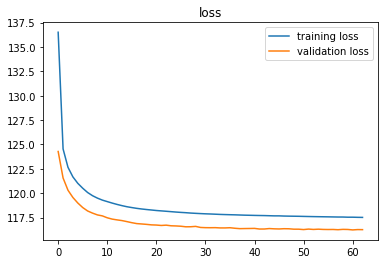

Plotting metrics...


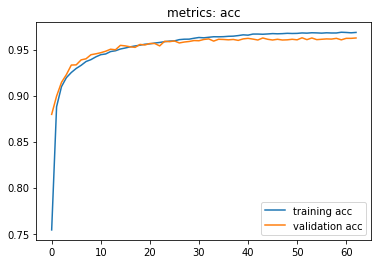

train {'acc': 0.9693273}
test {'acc': 0.9581}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14820026219375066880
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4163287264606666012
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 230.44354 , acc = 0.05 
Epoch 1 , step 100 , loss= 192.63507 , acc = 0.56 
Epoch 1 , step 200 , loss= 181.6317 , acc = 0.66 
Epoch 1 , step 300 , loss= 167.30042 , acc = 0.83 
Epoch 1 , step 400 , loss= 177.85837 , acc = 0.87 
Epoch 1 , step 500 , loss= 168.83664 , acc = 0.86 
Epoch 1 , step 549 , loss= 167.91023 val_loss= 165.85463 , acc = 0.88 val acc = 0.8592 
Epoch 1 finished, loss= 181.50362 val loss= 165.85463 ,  acc = 0.7360546 val acc = 0.8592
val_acc improve

Epoch 17 , step 300 , loss= 150.04114 , acc = 0.99 
Epoch 17 , step 400 , loss= 163.83568 , acc = 0.92 
Epoch 17 , step 500 , loss= 161.49246 , acc = 0.97 
Epoch 17 , step 549 , loss= 158.16707 val_loss= 155.73987 , acc = 0.96 val acc = 0.9558 
Epoch 17 finished, loss= 157.76508 val loss= 155.73987 ,  acc = 0.95229095 val acc = 0.9558
val_acc improved. 
Epoch 18 , step 50 , loss= 152.58435 , acc = 0.95 
Epoch 18 , step 150 , loss= 160.02322 , acc = 0.93 
Epoch 18 , step 250 , loss= 156.24883 , acc = 0.97 
Epoch 18 , step 350 , loss= 157.2905 , acc = 0.96 
Epoch 18 , step 450 , loss= 162.10881 , acc = 0.95 
Epoch 18 , step 549 , loss= 151.32321 val_loss= 155.67877 , acc = 0.96 val acc = 0.9568 
Epoch 18 finished, loss= 157.67836 val loss= 155.67877 ,  acc = 0.9526728 val acc = 0.9568
val_acc improved. 
Epoch 19 , step 0 , loss= 161.68494 , acc = 0.97 
Epoch 19 , step 100 , loss= 159.5893 , acc = 0.91 
Epoch 19 , step 200 , loss= 159.38751 , acc = 0.95 
Epoch 19 , step 300 , loss= 157.58

Epoch 35 , step 100 , loss= 154.45004 , acc = 0.99 
Epoch 35 , step 200 , loss= 149.51054 , acc = 0.96 
Epoch 35 , step 300 , loss= 159.44365 , acc = 0.98 
Epoch 35 , step 400 , loss= 150.38445 , acc = 0.98 
Epoch 35 , step 500 , loss= 157.55574 , acc = 0.95 
Epoch 35 , step 549 , loss= 153.28424 val_loss= 155.0254 , acc = 0.94 val acc = 0.9612 
Epoch 35 finished, loss= 156.90948 val loss= 155.0254 ,  acc = 0.96130913 val acc = 0.9612

Epoch 36 , step 50 , loss= 164.19527 , acc = 0.96 
Epoch 36 , step 150 , loss= 163.08455 , acc = 0.98 
Epoch 36 , step 250 , loss= 149.08224 , acc = 0.97 
Epoch 36 , step 350 , loss= 152.61885 , acc = 0.95 
Epoch 36 , step 450 , loss= 158.23405 , acc = 0.99 
Epoch 36 , step 549 , loss= 160.28337 val_loss= 154.99959 , acc = 0.97 val acc = 0.9608 
Epoch 36 finished, loss= 156.87552 val loss= 154.99959 ,  acc = 0.9623273 val acc = 0.9608

Epoch 37 , step 0 , loss= 151.8411 , acc = 0.93 
Epoch 37 , step 100 , loss= 152.66608 , acc = 0.97 
Epoch 37 , step 200

Epoch 52 , step 549 , loss= 156.83673 val_loss= 154.83525 , acc = 0.95 val acc = 0.9632 
Epoch 52 finished, loss= 156.58131 val loss= 154.83525 ,  acc = 0.9653453 val acc = 0.9632

Epoch 53 , step 0 , loss= 159.8274 , acc = 0.99 
Epoch 53 , step 100 , loss= 154.20453 , acc = 0.98 
Epoch 53 , step 200 , loss= 158.03923 , acc = 0.97 
Epoch 53 , step 300 , loss= 162.95036 , acc = 0.95 
Epoch 53 , step 400 , loss= 157.08594 , acc = 0.95 
Epoch 53 , step 500 , loss= 158.7483 , acc = 0.97 
Epoch 53 , step 549 , loss= 161.1622 val_loss= 154.77113 , acc = 0.95 val acc = 0.965 
Epoch 53 finished, loss= 156.5659 val loss= 154.77113 ,  acc = 0.96519995 val acc = 0.965
val_acc improved. 
Epoch 54 , step 50 , loss= 154.45445 , acc = 0.92 
Epoch 54 , step 150 , loss= 167.72469 , acc = 0.97 
Epoch 54 , step 250 , loss= 159.42659 , acc = 0.96 
Epoch 54 , step 350 , loss= 159.16208 , acc = 0.97 
Epoch 54 , step 450 , loss= 157.25996 , acc = 0.97 
Epoch 54 , step 549 , loss= 155.93788 val_loss= 154.7798

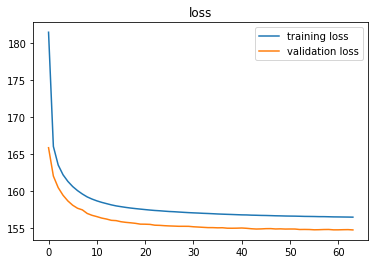

Plotting metrics...


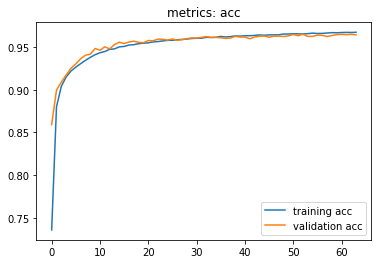

train {'acc': 0.9675273}
test {'acc': 0.9588}

{2: [{'acc': 0.9701}, {'acc': 0.9685}, {'acc': 0.9681}, {'acc': 0.9692}, {'acc': 0.9686}], 4: [{'acc': 0.9694}, {'acc': 0.9677}, {'acc': 0.9696}, {'acc': 0.9658}, {'acc': 0.9634}], 6: [{'acc': 0.9667}, {'acc': 0.9622}, {'acc': 0.9625}, {'acc': 0.9644}, {'acc': 0.9588}], 8: [{'acc': 0.9641}, {'acc': 0.9662}, {'acc': 0.9598}, {'acc': 0.9598}, {'acc': 0.9636}], 10: [{'acc': 0.9685}, {'acc': 0.9628}, {'acc': 0.963}, {'acc': 0.9581}, {'acc': 0.9588}]}


In [17]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp2 = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [18]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   4    0.9701   
1            0.75           0.25            2                   4    0.9685   
2            0.50           0.50            2                   4    0.9681   
3            0.25           0.75            2                   4    0.9692   
4            0.00           1.00            2                   4    0.9686   
5            1.00           0.00            4                  16    0.9694   
6            0.75           0.25            4                  16    0.9677   
7            0.50           0.50            4                  16    0.9696   
8            0.25           0.75            4                  16    0.9658   
9            0.00           1.00            4                  16    0.9634   
10           1.00           0.00            6                  36    0.9667   
11           0.75           0.25            6       

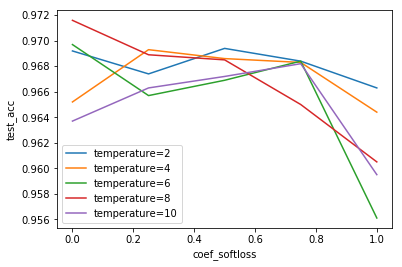

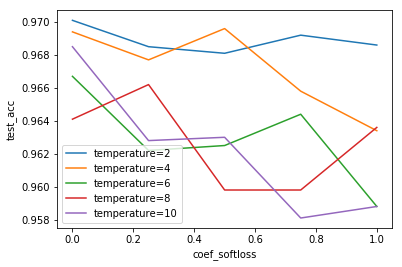

In [19]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')
plot_trend(df_exp2, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

In [20]:

# close_session(session)